In [ ]:
from statsmodels.regression.rolling import RollingOLS
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf   
import datetime as dt

#%pip install pandas_ta --upgrade --quiet
import pandas_ta
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Get the S&P 500 tickers from Wikipedia
# This will fetch the current list of S&P 500 companies
sp500Tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500Tickers = sp500Tickers[0]
sp500Tickers['Symbol'] = sp500Tickers['Symbol'].str.replace('.', '-').unique()
sp500Tickers = sp500Tickers['Symbol'].to_list()

# Set the start and end dates for the data
end_date = '2023-09-27'
start_date = pd.to_datetime(end_date) - pd.DateOffset(days=365*8)  # 8 years of data

In [41]:
end_date = '2023-09-27'
start_date = pd.to_datetime(end_date) - pd.DateOffset(days=365*8)  # 8 years of data
start_date

Timestamp('2015-09-29 00:00:00')

In [42]:
# download the data
data = yf.download(sp500Tickers, start=start_date, end=end_date)
data

[*********************100%***********************]  503 of 503 completed

3 Failed downloads:
['GEV', 'SOLV', 'VLTO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2015-09-29 00:00:00 -> 2023-09-27) (Yahoo error = "Data doesn\'t exist for startDate = 1443499200, endDate = 1695787200")')


Price      Adj Close                 Close                          \
Ticker           GEV SOLV VLTO           A        AAPL        ABBV   
Date                                                                 
2015-09-29       NaN  NaN  NaN   31.185333   24.536388   34.760990   
2015-09-30       NaN  NaN  NaN   31.730652   24.815355   35.827721   
2015-10-01       NaN  NaN  NaN   31.185333   24.653381   36.301811   
2015-10-02       NaN  NaN  NaN   32.044922   24.833353   36.756161   
2015-10-05       NaN  NaN  NaN   32.664185   24.923353   37.322468   
...              ...  ...  ...         ...         ...         ...   
2023-09-20       NaN  NaN  NaN  110.812737  173.985001  142.789200   
2023-09-21       NaN  NaN  NaN  108.113106  172.438385  142.621841   
2023-09-22       NaN  NaN  NaN  109.768364  173.290970  141.980484   
2023-09-25       NaN  NaN  NaN  110.290558  174.569916  143.755920   
2023-09-26       NaN  NaN  NaN  109.098366  170.485275  143.068069   

Price                                                     ...  Volume  \
Ticker            ABNB        ABT       ACGL         ACN  ...     WTW   
Date                                                      ...           
2015-09-29         NaN  32.674068  23.217773   82.010086  ...  345752   
2015-09-30         NaN  33.269657  23.287504   83.419373  ...  649262   
2015-10-01         NaN  33.716335  23.262148   83.572182  ...  527632   
2015-10-02         NaN  34.229210  23.563267   84.378693  ...  367458   
2015-10-05         NaN  34.237469  23.766125   86.271873  ...  179275   
...                ...        ...        ...         ...  ...     ...   
2023-09-20  138.009995  96.385139  77.327065  307.660461  ...  670700   
2023-09-21  132.750000  95.087585  76.347641  302.998993  ...  620600   
2023-09-22  132.199997  94.337875  76.984741  306.970978  ...  651100   
2023-09-25  134.139999  93.684296  77.165421  307.844971  ...  477500   
2023-09-26  132.279999  92.492439  77.270020  301.649048  ...  993600   

Price                                                                        \
Ticker           WY      WYNN      XEL       XOM      XYL      YUM      ZBH   
Date                                                                          
2015-09-29  3053000   6223400  3361700  13754400  1344100  6018857  2358906   
2015-09-30  2837500   4265300  2722000  18176500  1708500  7378142  2012723   
2015-10-01  3270800   4745600  2875200  14397800  1498600  4426718  1604019   
2015-10-02  2846400  15153700  3299500  18811300  1451100  7719772  1353626   
2015-10-05  3286600  12699700  5369400  18486700  2376800  5737736  1352081   
...             ...       ...      ...       ...      ...      ...      ...   
2023-09-20  2374200   1061300  7670600  11879900  1752100  1437200  1055900   
2023-09-21  3494500   2358400  4904800  14400600  2044800  1492700  1489200   
2023-09-22  3476300   2611300  4904300  13197300  1699800  1534100  1267300   
2023-09-25  2269600   1387800  3617800  11316000  1702000  1048500   886700   
2023-09-26  3324700   1454000  6275500  11805400  1322400  1500600  3610500   

Price                        
Ticker        ZBRA      ZTS  
Date                         
2015-09-29  895000  7328400  
2015-09-30  618800  4954100  
2015-10-01  464900  4131800  
2015-10-02  341500  4036800  
2015-10-05  460600  5467700  
...            ...      ...  
2023-09-20  824900  1485500  
2023-09-21  676200  1691800  
2023-09-22  482200  1281800  
2023-09-25  314500  1551100  
2023-09-26  355400  1463200  

[2012 rows x 2518 columns]

In [43]:
df = data.copy()
df = df.stack()
# make Date', 'Ticker' the indexes
df.index.names = ['Date', 'Ticker']
df = df.drop(['Adj Close'], axis=1)
df.columns = df.columns.str.lower()
df

Price                   close        high         low        open       volume
Date       Ticker                                                             
2015-09-29 A        31.185333   31.481104   30.723191   30.834104    2252400.0
           AAPL     24.536388   25.537553   24.266412   25.384566  293461600.0
           ABBV     34.760990   35.682856   34.161776   34.965116   12842800.0
           ABT      32.674068   33.211744   32.285287   32.475541   12287500.0
           ACGL     23.217773   23.255808   22.916655   22.983217    1888800.0
...                       ...         ...         ...         ...          ...
2023-09-26 XYL      87.701065   89.004043   87.681475   88.543592    1322400.0
           YUM     119.860710  120.566281  119.319442  120.083010    1500600.0
           ZBH     110.513580  115.083101  110.474272  114.748982    3610500.0
           ZBRA    223.960007  226.649994  222.580002  225.970001     355400.0
           ZTS     173.604706  175.155538  173.015792  173.320066    1463200.0

[981183 rows x 5 columns]

### Technical indicators:

- Garman-Klaus:
$$ GKV = \frac{(\ln(High)-\ln(Low))^2}{2}- (2\ln(2)-1)(\ln(AQdj Close)-\ln(Open))^2$$

In [44]:
# Geman-Klass volatility calculation
df['garman_klass_vol'] = 0.5*(np.log(df['high'])-np.log(df['low']))**2 -\
      (2*np.log(2)-1)*(np.log(df['close']-np.log(df['open'])))**2

# RSI calculation using pandas_ta
df['rsi'] = df.groupby(level=1)['close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

# Bolinger Bands calculation using pandas_ta
df['bb_lower'] = \
    df.groupby(level=1)['close'].transform(lambda x: pandas_ta.bbands(close=x, length=20, std=2).iloc[:, 0].T.values)
df['bb_middle']= \
    df.groupby(level=1)['close'].transform(lambda x: pandas_ta.bbands(close=x, length=20, std=2).iloc[:, 1].T.values)
df['bb_upper'] = \
    df.groupby(level=1)['close'].transform(lambda x: pandas_ta.bbands(close=x, length=20, std=2).iloc[:, 2].T.values)
# Normalised ATR calculation using pandas_ta
def compute_ATR(stock_df):
    atr = pandas_ta.atr(high=stock_df['high'], 
                        low=stock_df['low'], 
                        close=stock_df['close'], 
                        length=20)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_ATR)

#Compute Normalised MACD using pandas_ta
def calc_MACD(stock_df):
    macd = pandas_ta.macd(close=stock_df, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['close'].apply(calc_MACD)

# Compute dollar-volume
df['dollar_vol'] = df['close'] * df['volume']/1e6 # in millions

df

Price                   close        high         low        open  \
Date       Ticker                                                   
2015-09-29 A        31.185333   31.481104   30.723191   30.834104   
           AAPL     24.536388   25.537553   24.266412   25.384566   
           ABBV     34.760990   35.682856   34.161776   34.965116   
           ABT      32.674068   33.211744   32.285287   32.475541   
           ACGL     23.217773   23.255808   22.916655   22.983217   
...                       ...         ...         ...         ...   
2023-09-26 XYL      87.701065   89.004043   87.681475   88.543592   
           YUM     119.860710  120.566281  119.319442  120.083010   
           ZBH     110.513580  115.083101  110.474272  114.748982   
           ZBRA    223.960007  226.649994  222.580002  225.970001   
           ZTS     173.604706  175.155538  173.015792  173.320066   

Price                   volume  garman_klass_vol        rsi    bb_lower  \
Date       Ticker                                                         
2015-09-29 A         2252400.0         -4.266519        NaN         NaN   
           AAPL    293461600.0         -3.612996        NaN         NaN   
           ABBV     12842800.0         -4.571981        NaN         NaN   
           ABT      12287500.0         -4.396994        NaN         NaN   
           ACGL      1888800.0         -3.476250        NaN         NaN   
...                        ...               ...        ...         ...   
2023-09-26 XYL       1322400.0         -7.551670  26.146763   86.436283   
           YUM       1500600.0         -8.699436  36.057139  119.553890   
           ZBH       3610500.0         -8.392369  31.893207  113.062128   
           ZBRA       355400.0        -11.209873  29.494977  219.286148   
           ZTS       1463200.0        -10.152668  42.623487  170.338383   

Price               bb_middle    bb_upper       atr      macd   dollar_vol  
Date       Ticker                                                           
2015-09-29 A              NaN         NaN       NaN       NaN    70.241845  
           AAPL           NaN         NaN       NaN       NaN  7200.487797  
           ABBV           NaN         NaN       NaN       NaN   446.428444  
           ABT            NaN         NaN       NaN       NaN   401.482616  
           ACGL           NaN         NaN       NaN       NaN    43.853730  
...                       ...         ...       ...       ...          ...  
2023-09-26 XYL      94.288939  102.141594  0.167477 -2.159189   115.975888  
           YUM     123.277923  127.001956  0.290548 -1.363696   179.862982  
           ZBH     117.702955  122.343783 -0.322850 -0.881067   399.009282  
           ZBRA    254.068498  288.850848  0.029524 -1.600791    79.595386  
           ZTS     181.050640  191.762897  0.759248 -1.188278   254.018406  

[981183 rows x 13 columns]

### Aggregate Indicators and Filter top 150 most liquid stocks (monthly)

- Convert daily data to monthly data

In [56]:
#Create list of columns we will take last monthly value
monthly_cols = [col for col in df.columns.unique() if col not in ['open', 'high', 'low', 
                                                                  'adj close', 'volume', 'dollar_vol']]
# Resample dollar-vol monthly
temp1 = df.unstack('Ticker')['dollar_vol'].resample('M').mean().stack('Ticker').to_frame('dollar_vol.M')
temp2 = df.unstack('Ticker')[monthly_cols].resample('M').last().stack('Ticker')

df2 = pd.concat([temp1, temp2], axis=1)
df2 = df2.dropna()
df2


dollar_vol.M       close  garman_klass_vol        rsi  \
Date       Ticker                                                          
2015-11-30 A         134.704654   38.653545         -4.882532  73.421590   
           AAPL     4005.252634   26.729132         -3.844354  55.537341   
           ABBV      322.941653   38.643806         -4.878991  49.376882   
           ABT       206.572087   37.373230         -4.782731  56.962520   
           ACGL       28.174423   22.970539         -3.447025  35.682522   
...                         ...         ...               ...        ...   
2023-09-30 EXE       116.692166   79.277855         -7.196944  44.326484   
           COIN      506.942443   70.519997         -6.791678  39.839731   
           CEG       195.364203  107.145660         -8.277868  55.245452   
           GEHC      211.931949   66.022316         -6.571042  40.922339   
           KVUE      646.497236   19.281164         -3.012540  35.706309   

                     bb_lower   bb_middle    bb_upper       atr      macd  
Date       Ticker                                                          
2015-11-30 A        33.244583   35.960179   38.675774 -1.074541  0.567157  
           AAPL     25.488323   26.680454   27.872584 -0.978158 -0.142790  
           ABBV     38.745916   40.762067   42.778218 -0.695664  0.145677  
           ABT      36.799647   37.639054   38.478462 -1.097077  0.335558  
           ACGL     22.996342   23.415718   23.835093 -1.172959 -0.550166  
...                       ...         ...         ...       ...       ...  
2023-09-30 EXE      77.936989   82.372909   86.808829 -0.861222 -0.831787  
           COIN     70.618194   78.849999   87.081804 -1.175292  0.049978  
           CEG     103.071582  107.409857  111.748132 -0.603375  0.366876  
           GEHC     62.551589   66.476530   70.401470 -1.004731 -1.116463  
           KVUE     18.613768   20.215332   21.816895 -0.668586 -1.435621  

[46328 rows x 9 columns]

#### Step 3: 5-year rolling dollar-vol average

In [57]:
# 5-year average rolling dollar-vol average
df2['dollar_vol.M'] =  (df2.loc[:, 'dollar_vol.M'].unstack('Ticker').rolling(5*12, min_periods=12).mean().stack())

df2['dollar_vol_rank'] = (df2.groupby('Date')['dollar_vol.M'].rank(ascending=False))
# Filter top 150 most liquid stocks
df2 = df2[df2['dollar_vol_rank']<150].drop(['dollar_vol.M', 'dollar_vol_rank'], axis=1)

df2



close  garman_klass_vol        rsi    bb_lower  \
Date       Ticker                                                        
2016-10-31 AAPL     26.090456         -3.779573  49.891077   25.829830   
           ABBV     38.501823         -4.869074  27.477639   39.877734   
           ABT      33.469265         -4.464627  38.008867   33.110985   
           ACN     101.760162         -8.089517  53.823684  100.477469   
           ADBE    107.510002         -8.291816  53.668389  106.702189   
...                       ...               ...        ...         ...   
2023-09-30 DDOG     86.570000         -7.504988  37.040091   86.807674   
           PLTR     13.960000         -2.275131  41.544692   13.885000   
           DASH     74.580002         -6.984407  36.955365   74.822447   
           ABNB    132.279999         -9.076140  44.494127  127.318676   
           COIN     70.519997         -6.791678  39.839731   70.618194   

                    bb_middle    bb_upper       atr      macd  
Date       Ticker                                              
2016-10-31 AAPL     26.625066   27.420302 -1.048111 -0.195979  
           ABBV     42.150385   44.423035 -1.128184 -0.760594  
           ABT      34.937004   36.763024 -1.078447 -0.650889  
           ACN     101.672199  102.866928 -0.992516 -0.135456  
           ADBE    108.362500  110.022810 -1.256260 -0.109039  
...                       ...         ...       ...       ...  
2023-09-30 DDOG     94.692501  102.577328 -0.788445 -0.699392  
           PLTR     15.127000   16.369000 -0.373053 -0.433581  
           DASH     80.826000   86.829553 -1.163013 -0.117919  
           ABNB    139.022250  150.725825 -1.017127 -0.037854  
           COIN     78.849999   87.081804 -1.175292  0.049978  

[12516 rows x 8 columns]

#### Step 4: Calculate monthly returns for different time horizons

- Captures time series dynamics like Momentum patterns

In [58]:
# subset one ticker: AAPL
def calculate_returns(tmp1):

    outlier_cut_off = 0.005

    lags = [1, 2, 3, 6, 9, 12] #Months
    for lag in lags:
        tmp1[f'returns.{lag}M'] = (tmp1['close']
                                    .pct_change(lag)
                                    .pipe(lambda x: x.clip(lower=x.quantile(outlier_cut_off),
                                                        upper=x.quantile(1-outlier_cut_off)))
                                    .add(1)
                                    .pow(1/lag)
                                    .sub(1)
        )
    tmp1 = tmp1.dropna()
    return tmp1


df2 = df2.groupby(level=1, group_keys=False).apply(calculate_returns).dropna().sort_index()
df2


close  garman_klass_vol        rsi    bb_lower  \
Date       Ticker                                                        
2017-10-31 AAPL     39.529026         -4.949633  69.196713   35.178033   
           ABBV     64.567627         -6.496181  55.247816   62.540146   
           ABT      47.327892         -5.496098  53.844840   46.869772   
           ACN     127.138962         -8.923860  69.365018  118.637556   
           ADBE    175.160004        -10.188719  70.089317  139.171863   
...                       ...               ...        ...         ...   
2023-09-30 VZ       28.819036         -4.047971  42.222500   28.620479   
           WDAY    229.240005        -11.309051  43.976804  228.670016   
           WFC      38.847343         -4.896620  40.920279   38.377267   
           WMT      53.052742         -5.855720  54.722587   52.242842   
           XOM     109.552094         -8.362140  59.440185  103.879267   

                    bb_middle    bb_upper       atr      macd  returns.1M  \
Date       Ticker                                                           
2017-10-31 AAPL     36.990541   38.803048 -0.927207 -0.039275    0.096807   
           ABBV     65.666362   68.792579 -0.153182  0.473814    0.022728   
           ABT      48.026940   49.184109 -1.078293  0.276133    0.021276   
           ACN     123.594724  128.551892 -0.998458  0.352341    0.064180   
           ADBE    161.660500  184.149136 -0.943513  0.612102    0.174152   
...                       ...         ...       ...       ...         ...   
2023-09-30 VZ       29.606557   30.592634 -0.557357 -0.350385   -0.056890   
           WDAY    242.632002  256.593988 -0.052423 -0.306858   -0.062413   
           WFC      40.035696   41.694125 -0.251420 -0.282324   -0.015500   
           WMT      53.187734   54.132625 -0.001412  0.399459   -0.000676   
           XOM     108.226099  112.572931  0.956923  1.400622    0.046947   

                   returns.2M  returns.3M  returns.6M  returns.9M  returns.12M  
Date       Ticker                                                               
2017-10-31 AAPL      0.015249    0.044955    0.028875    0.038941     0.035228  
           ABBV      0.098590    0.091379    0.056495    0.047273     0.044026  
           ABT       0.034308    0.034801    0.038672    0.031320     0.029294  
           ACN       0.048454    0.037202    0.028692    0.027398     0.018728  
           ADBE      0.062497    0.061392    0.045993    0.049515     0.041515  
...                       ...         ...         ...         ...          ...  
2023-09-30 VZ       -0.016122   -0.033458   -0.021495   -0.014100    -0.006158  
           WDAY     -0.016777    0.004919    0.017531    0.035597     0.034709  
           WFC      -0.057917   -0.013554    0.016712    0.000702     0.003255  
           WMT       0.010014    0.012354    0.017574    0.016553     0.020256  
           XOM       0.046139    0.030496    0.012838    0.008747     0.027037  

[10317 rows x 14 columns]

#### Step 5: Download Fama-French Factors and Calc Rolling Factor beta

- Calculate exposure of assets to common risk factors
- Five Fama-French Factors:
    - Market risk
    - Size
    - Value
    - Operating Profitability
    - Investment
- Used to assess risk/return profiles of portfolios
- Access using `pandas-datareader`

In [48]:
import pandas_datareader.data as web

In [49]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
               'famafrench',
               start = 2010)[0].drop(columns=['RF'])
factor_data.index = factor_data.index.to_timestamp()

factor_data = factor_data.resample('M').last().div(100)
factor_data = factor_data.rename(columns={'Mkt-RF': 'mkt_rf', 'SMB': 'smb', 'HML': 'hml', 'RMW': 'rmw', 'CMA': 'cma'})

factor_data.index.name = 'Date'
factor_data.head()


mkt_rf     smb     hml     rmw     cma
Date                                              
2010-01-31 -0.0335  0.0040  0.0033 -0.0108  0.0051
2010-02-28  0.0339  0.0149  0.0318 -0.0029  0.0142
2010-03-31  0.0630  0.0183  0.0219 -0.0061  0.0174
2010-04-30  0.0200  0.0496  0.0296  0.0061  0.0175
2010-05-31 -0.0790  0.0008 -0.0248  0.0130 -0.0024

In [50]:
temp1 = df2.copy()
temp1 = temp1.reset_index()
factors = factor_data.copy().reset_index()
factors = pd.merge(factors,
                 temp1[['Date', 'Ticker','returns.1M']], 
                 on ='Date')
factors.set_index(['Date', 'Ticker'], 
                inplace=True)
factor_data = factors.sort_index()
factor_data.head()
factor_data


mkt_rf     smb     hml     rmw     cma  returns.1M
Date       Ticker                                                    
2017-10-31 AAPL    0.0225 -0.0191  0.0013  0.0092 -0.0314    0.096807
           ABBV    0.0225 -0.0191  0.0013  0.0092 -0.0314    0.022728
           ABT     0.0225 -0.0191  0.0013  0.0092 -0.0314    0.021276
           ACN     0.0225 -0.0191  0.0013  0.0092 -0.0314    0.064180
           ADBE    0.0225 -0.0191  0.0013  0.0092 -0.0314    0.174152
...                   ...     ...     ...     ...     ...         ...
2023-09-30 VZ     -0.0523 -0.0178  0.0149  0.0187 -0.0077   -0.056890
           WDAY   -0.0523 -0.0178  0.0149  0.0187 -0.0077   -0.062413
           WFC    -0.0523 -0.0178  0.0149  0.0187 -0.0077   -0.015500
           WMT    -0.0523 -0.0178  0.0149  0.0187 -0.0077   -0.000676
           XOM    -0.0523 -0.0178  0.0149  0.0187 -0.0077    0.046947

[10317 rows x 6 columns]

In [ ]:
factor_data.xs('MSFT', level=1)

In [51]:
observations = factor_data.groupby(level=1).size()

valid_stocks = observations[observations > 10]
factor_data = factor_data[factor_data.index.get_level_values('Ticker').isin(valid_stocks.index)]
factor_data

mkt_rf     smb     hml     rmw     cma  returns.1M
Date       Ticker                                                    
2017-10-31 AAPL    0.0225 -0.0191  0.0013  0.0092 -0.0314    0.096807
           ABBV    0.0225 -0.0191  0.0013  0.0092 -0.0314    0.022728
           ABT     0.0225 -0.0191  0.0013  0.0092 -0.0314    0.021276
           ACN     0.0225 -0.0191  0.0013  0.0092 -0.0314    0.064180
           ADBE    0.0225 -0.0191  0.0013  0.0092 -0.0314    0.174152
...                   ...     ...     ...     ...     ...         ...
2023-09-30 VZ     -0.0523 -0.0178  0.0149  0.0187 -0.0077   -0.056890
           WDAY   -0.0523 -0.0178  0.0149  0.0187 -0.0077   -0.062413
           WFC    -0.0523 -0.0178  0.0149  0.0187 -0.0077   -0.015500
           WMT    -0.0523 -0.0178  0.0149  0.0187 -0.0077   -0.000676
           XOM    -0.0523 -0.0178  0.0149  0.0187 -0.0077    0.046947

[10265 rows x 6 columns]

- Calculate rolling Factor Betas

In [52]:
def rolling_ols_beta(x):
    exog = sm.add_constant(x.drop('returns.1M', axis=1))
    n_regressors = exog.shape[1]
    window = min(24, x.shape[0])
    min_nobs = min(window, n_regressors + 1)
    if window > n_regressors + 1:
        res = RollingOLS(endog=x['returns.1M'], 
                         exog=exog,
                         window=window,
                         min_nobs=min_nobs
                        ).fit(params_only=True).params
        return res.drop('const', axis=1)
    else:
        return pd.DataFrame(index=x.index, columns=exog.columns.drop('const'))

betas = (factor_data.groupby(level=1, group_keys=False)
         .apply(rolling_ols_beta))

betas

mkt_rf       smb       hml       rmw       cma
Date       Ticker                                                  
2017-10-31 AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
           ADBE         NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-09-30 VZ      0.333162 -0.166526  0.273912  0.318195  0.101401
           WDAY    1.081035 -0.943882 -0.563416 -0.904316 -0.246007
           WFC     1.122204  0.240842  2.053156 -0.498784 -1.545134
           WMT     0.703896 -0.314914 -0.404367 -0.145375  0.500024
           XOM     0.983345 -1.133447  1.727458 -0.688266 -0.355860

[10265 rows x 5 columns]

In [ ]:
df2 = df2.join(betas.groupby('Ticker').shift())

# Fix missing values in factors:
factors = list(betas.columns)

df2.loc[:,factors] = df2.groupby(level=1, group_keys=False).apply(lambda x: x[factors].fillna(x.mean()))
df2 = df2.drop('close', axis = 1)

df2 

garman_klass_vol        rsi    bb_lower   bb_middle  \
Date       Ticker                                                        
2017-10-31 AAPL           -4.949633  69.196713   35.178033   36.990541   
           ABBV           -6.496181  55.247816   62.540146   65.666362   
           ABT            -5.496098  53.844840   46.869772   48.026940   
           ACN            -8.923860  69.365018  118.637556  123.594724   
           ADBE          -10.188719  70.089317  139.171863  161.660500   
...                             ...        ...         ...         ...   
2023-09-30 VZ             -4.047971  42.222500   28.620479   29.606557   
           WDAY          -11.309051  43.976804  228.670016  242.632002   
           WFC            -4.896620  40.920279   38.377267   40.035696   
           WMT            -5.855720  54.722587   52.242842   53.187734   
           XOM            -8.362140  59.440185  103.879267  108.226099   

                     bb_upper       atr      macd  returns.1M  returns.2M  \
Date       Ticker                                                           
2017-10-31 AAPL     38.803048 -0.927207 -0.039275    0.096807    0.015249   
           ABBV     68.792579 -0.153182  0.473814    0.022728    0.098590   
           ABT      49.184109 -1.078293  0.276133    0.021276    0.034308   
           ACN     128.551892 -0.998458  0.352341    0.064180    0.048454   
           ADBE    184.149136 -0.943513  0.612102    0.174152    0.062497   
...                       ...       ...       ...         ...         ...   
2023-09-30 VZ       30.592634 -0.557357 -0.350385   -0.056890   -0.016122   
           WDAY    256.593988 -0.052423 -0.306858   -0.062413   -0.016777   
           WFC      41.694125 -0.251420 -0.282324   -0.015500   -0.057917   
           WMT      54.132625 -0.001412  0.399459   -0.000676    0.010014   
           XOM     112.572931  0.956923  1.400622    0.046947    0.046139   

                   returns.3M  returns.6M  returns.9M  returns.12M    mkt_rf  \
Date       Ticker                                                              
2017-10-31 AAPL      0.044955    0.028875    0.038941     0.035228  1.276570   
           ABBV      0.091379    0.056495    0.047273     0.044026  0.505509   
           ABT       0.034801    0.038672    0.031320     0.029294  0.833423   
           ACN       0.037202    0.028692    0.027398     0.018728  1.203860   
           ADBE      0.061392    0.045993    0.049515     0.041515  1.109895   
...                       ...         ...         ...          ...       ...   
2023-09-30 VZ       -0.033458   -0.021495   -0.014100    -0.006158  0.302366   
           WDAY      0.004919    0.017531    0.035597     0.034709  1.079166   
           WFC      -0.013554    0.016712    0.000702     0.003255  1.139848   
           WMT       0.012354    0.017574    0.016553     0.020256  0.743667   
           XOM       0.030496    0.012838    0.008747     0.027037  1.007048   

                        smb       hml       rmw       cma  
Date       Ticker                                          
2017-10-31 AAPL   -0.251219 -0.610436  0.680516  0.488645  
           ABBV    0.360908 -0.030494  0.179028  0.188179  
           ABT    -0.194760 -0.528532  0.255644  0.985730  
           ACN    -0.154543 -0.339615  0.270194  0.196710  
           ADBE   -0.318342 -0.184494 -0.218155 -0.687631  
...                     ...       ...       ...       ...  
2023-09-30 VZ     -0.214861  0.348533  0.325004 -0.003136  
           WDAY   -0.958610 -0.574342 -0.858160 -0.258081  
           WFC     0.257588  1.996064 -0.460237 -1.490563  
           WMT    -0.258976 -0.509229 -0.129026  0.631876  
           XOM    -1.088837  1.679732 -0.722241 -0.271802  

[10317 rows x 18 columns]

## Step6: Portfolio construction using K-Means

- For each month construct a portfolio
- We will use K-Means to determine which stocks should be included
- Also, we will decide the weightings

### K-Means
- One may need to prespecify centroids

In [64]:
from sklearn.cluster import KMeans

def get_Clusters(df, n_clusters=5):
    """
    Perform K-Means clustering on the DataFrame.
    """
    df['cluster'] = KMeans(n_clusters=n_clusters, 
                           random_state=0,
                           init = 'random').fit(df).labels_
    return df

df2 = df2.dropna().groupby('Date', group_keys=False).apply(get_Clusters, n_clusters=4)
# -4.949633 1
df2


garman_klass_vol        rsi    bb_lower   bb_middle  \
Date       Ticker                                                        
2017-10-31 AAPL           -4.949633  69.196713   35.178033   36.990541   
           ABBV           -6.496181  55.247816   62.540146   65.666362   
           ABT            -5.496098  53.844840   46.869772   48.026940   
           ACN            -8.923860  69.365018  118.637556  123.594724   
           ADBE          -10.188719  70.089317  139.171863  161.660500   
...                             ...        ...         ...         ...   
2023-09-30 VZ             -4.047971  42.222500   28.620479   29.606557   
           WDAY          -11.309051  43.976804  228.670016  242.632002   
           WFC            -4.896620  40.920279   38.377267   40.035696   
           WMT            -5.855720  54.722587   52.242842   53.187734   
           XOM            -8.362140  59.440185  103.879267  108.226099   

                     bb_upper       atr      macd  returns.1M  returns.2M  \
Date       Ticker                                                           
2017-10-31 AAPL     38.803048 -0.927207 -0.039275    0.096807    0.015249   
           ABBV     68.792579 -0.153182  0.473814    0.022728    0.098590   
           ABT      49.184109 -1.078293  0.276133    0.021276    0.034308   
           ACN     128.551892 -0.998458  0.352341    0.064180    0.048454   
           ADBE    184.149136 -0.943513  0.612102    0.174152    0.062497   
...                       ...       ...       ...         ...         ...   
2023-09-30 VZ       30.592634 -0.557357 -0.350385   -0.056890   -0.016122   
           WDAY    256.593988 -0.052423 -0.306858   -0.062413   -0.016777   
           WFC      41.694125 -0.251420 -0.282324   -0.015500   -0.057917   
           WMT      54.132625 -0.001412  0.399459   -0.000676    0.010014   
           XOM     112.572931  0.956923  1.400622    0.046947    0.046139   

                   returns.3M  returns.6M  returns.9M  returns.12M    mkt_rf  \
Date       Ticker                                                              
2017-10-31 AAPL      0.044955    0.028875    0.038941     0.035228  1.276570   
           ABBV      0.091379    0.056495    0.047273     0.044026  0.505509   
           ABT       0.034801    0.038672    0.031320     0.029294  0.833423   
           ACN       0.037202    0.028692    0.027398     0.018728  1.203860   
           ADBE      0.061392    0.045993    0.049515     0.041515  1.109895   
...                       ...         ...         ...          ...       ...   
2023-09-30 VZ       -0.033458   -0.021495   -0.014100    -0.006158  0.302366   
           WDAY      0.004919    0.017531    0.035597     0.034709  1.079166   
           WFC      -0.013554    0.016712    0.000702     0.003255  1.139848   
           WMT       0.012354    0.017574    0.016553     0.020256  0.743667   
           XOM       0.030496    0.012838    0.008747     0.027037  1.007048   

                        smb       hml       rmw       cma  cluster  
Date       Ticker                                                   
2017-10-31 AAPL   -0.251219 -0.610436  0.680516  0.488645        1  
           ABBV    0.360908 -0.030494  0.179028  0.188179        1  
           ABT    -0.194760 -0.528532  0.255644  0.985730        1  
           ACN    -0.154543 -0.339615  0.270194  0.196710        2  
           ADBE   -0.318342 -0.184494 -0.218155 -0.687631        2  
...                     ...       ...       ...       ...      ...  
2023-09-30 VZ     -0.214861  0.348533  0.325004 -0.003136        3  
           WDAY   -0.958610 -0.574342 -0.858160 -0.258081        2  
           WFC     0.257588  1.996064 -0.460237 -1.490563        3  
           WMT    -0.258976 -0.509229 -0.129026  0.631876        3  
           XOM    -1.088837  1.679732 -0.722241 -0.271802        3  

[10063 rows x 19 columns]

In [65]:
# Cluster visualisation
# List of 10 possible colours in the plot:
colours = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']
def plot_clusters(df,mth,  col1, col2, n_clusters=4):
    """
    Plot the clusters for each month.
    """
    plt.figure(figsize=(12, 6))     
    cluster_data = None
    for clust in range(n_clusters):
        cluster_data = df[df['cluster'] == clust]
        plt.scatter(cluster_data[col1], 
                    cluster_data[col2], 
                    color=colours[clust],
                    label=f'Cluster {clust}', 
                    alpha=0.5)
    plt.title(f'{mth} Clusters of Stocks based on {col1} and {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.grid()
    plt.show()


In [66]:
#plt.style.use('ggplot')
# Plot clusters for each month
# We will use 'atr' and 'rsi' as the features for clustering
def plot_all_clusters(df, col1 = 'atr', col2 = 'rsi', n_clusters=4):
    """
    Plot the clusters for each month.
    """
    for mth in df.index.get_level_values('Date').unique().tolist():
        temp = df.xs(mth, level=0)
        plot_clusters(temp, mth, col1, col2, n_clusters=4)        

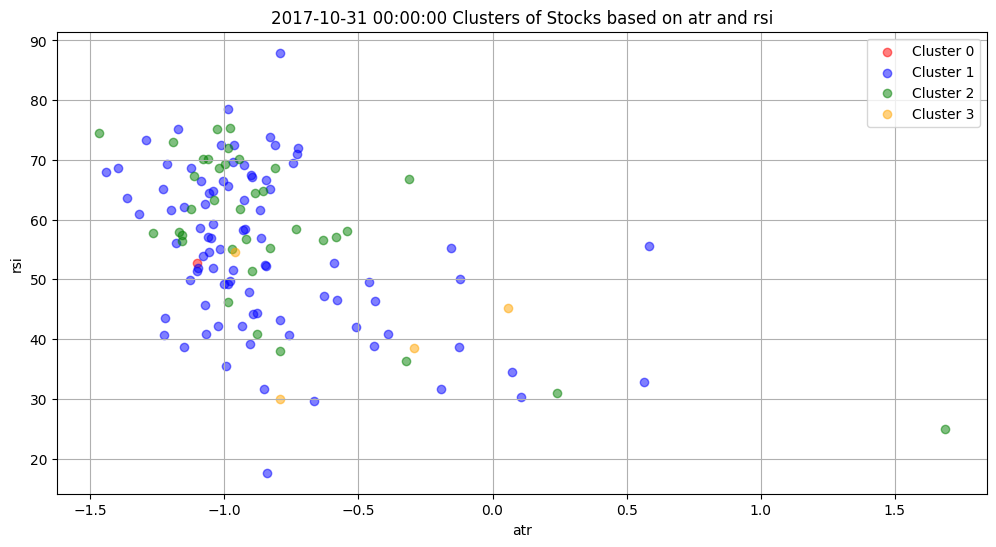

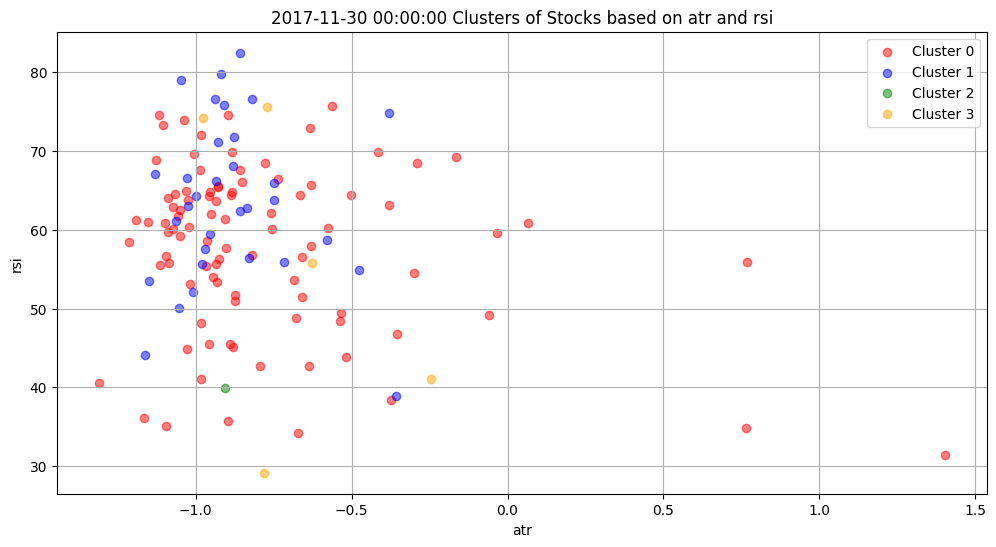

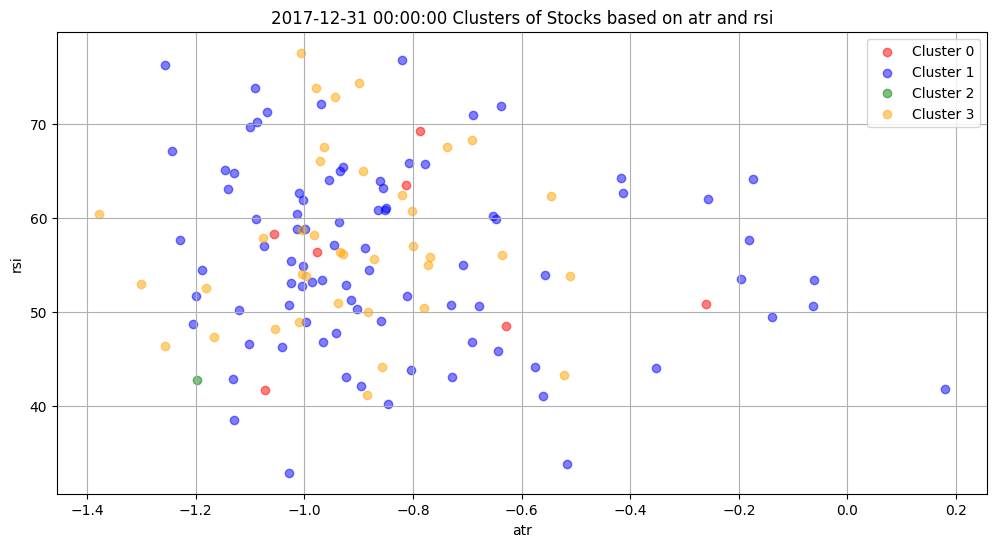

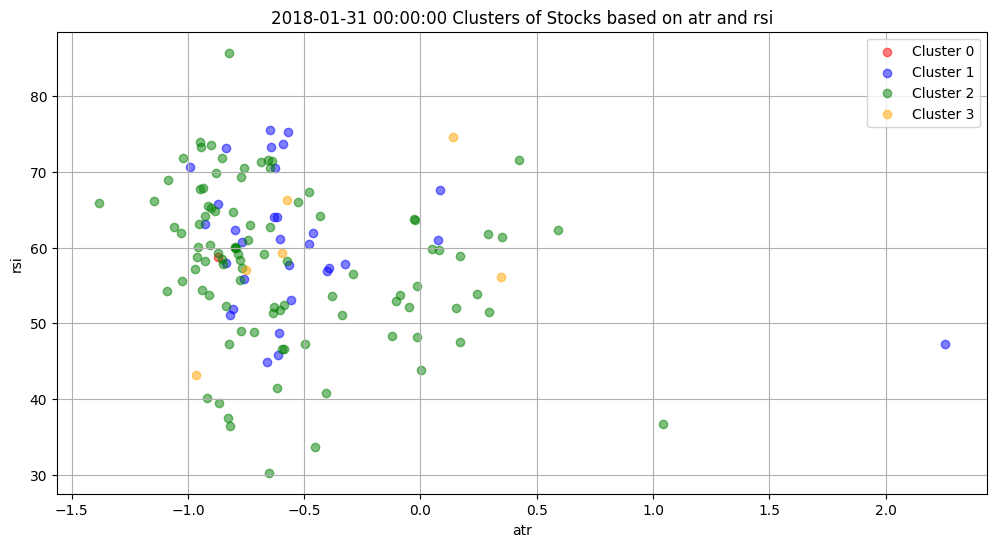

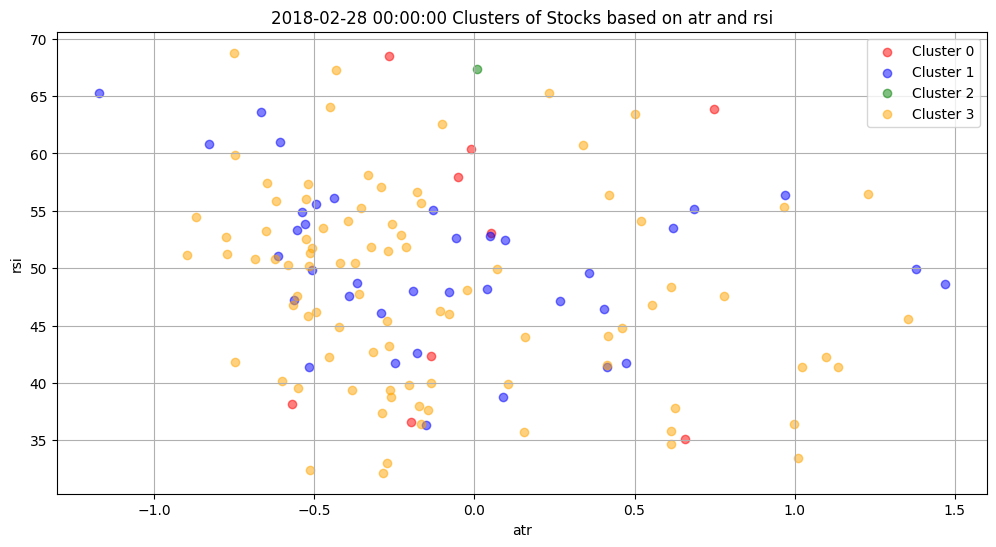

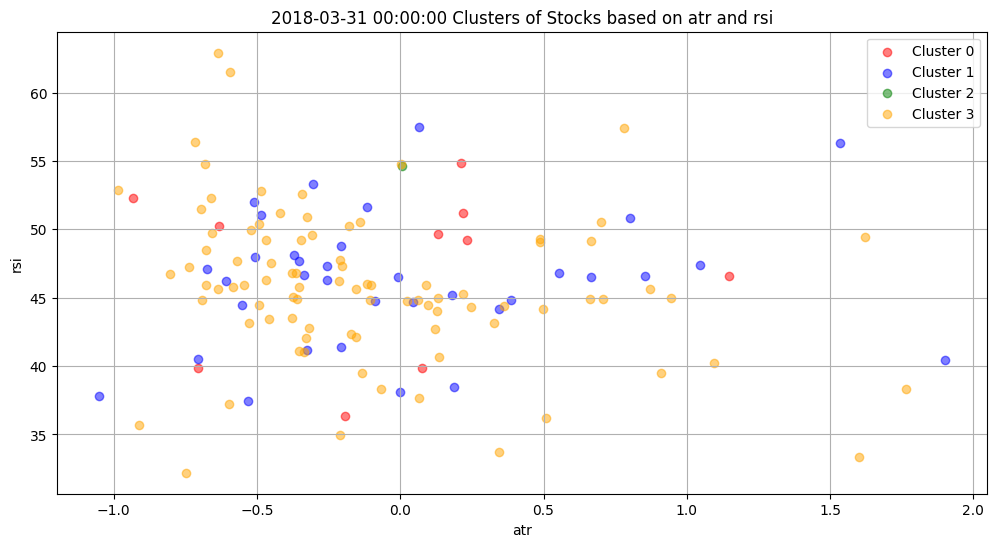

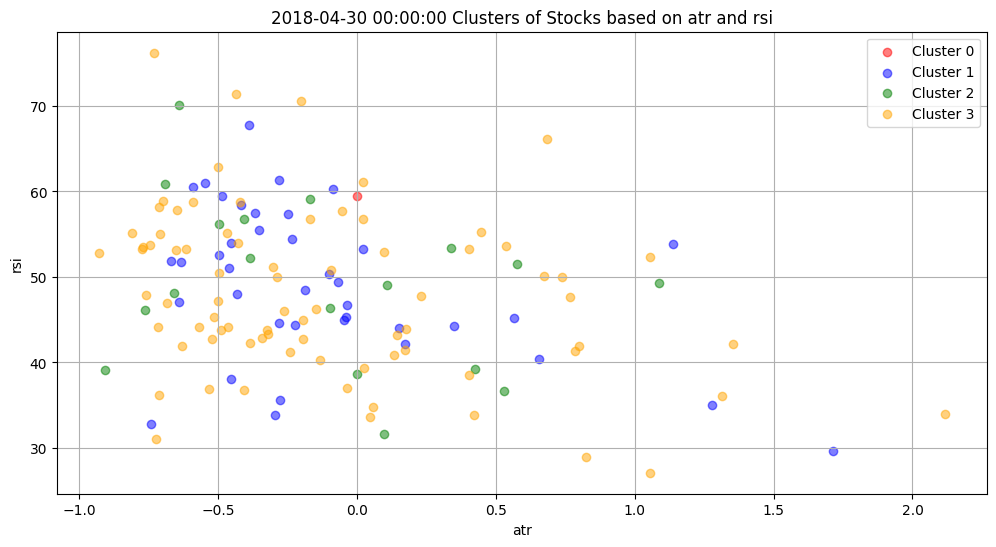

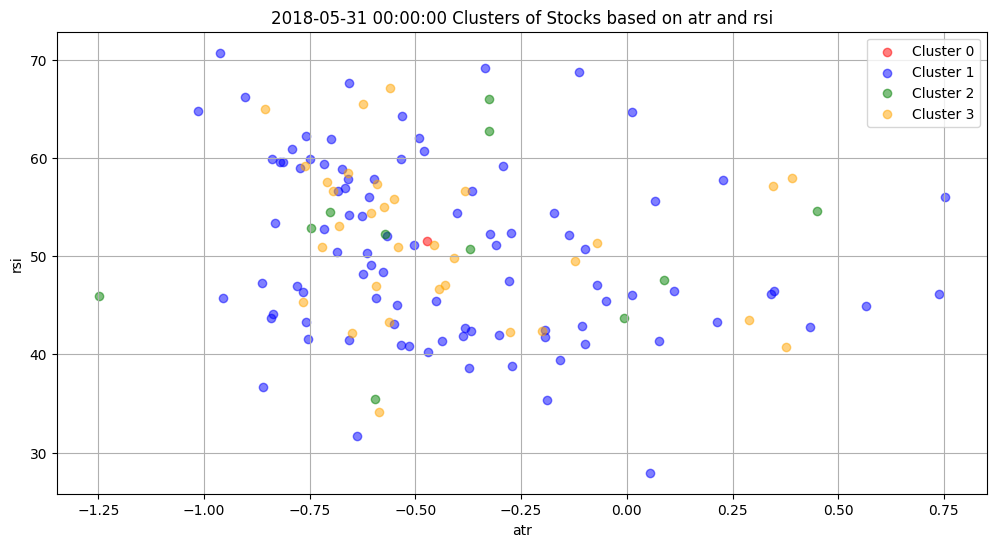

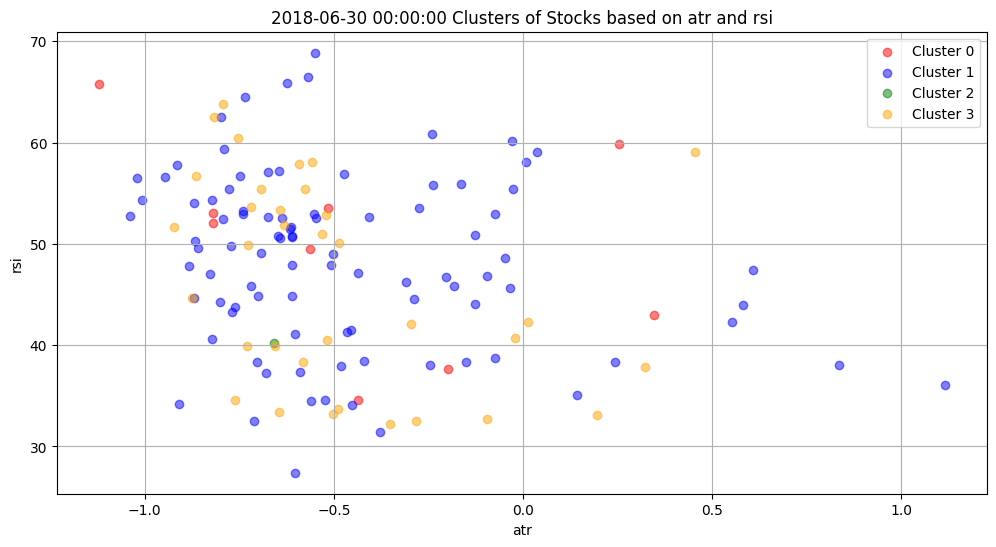

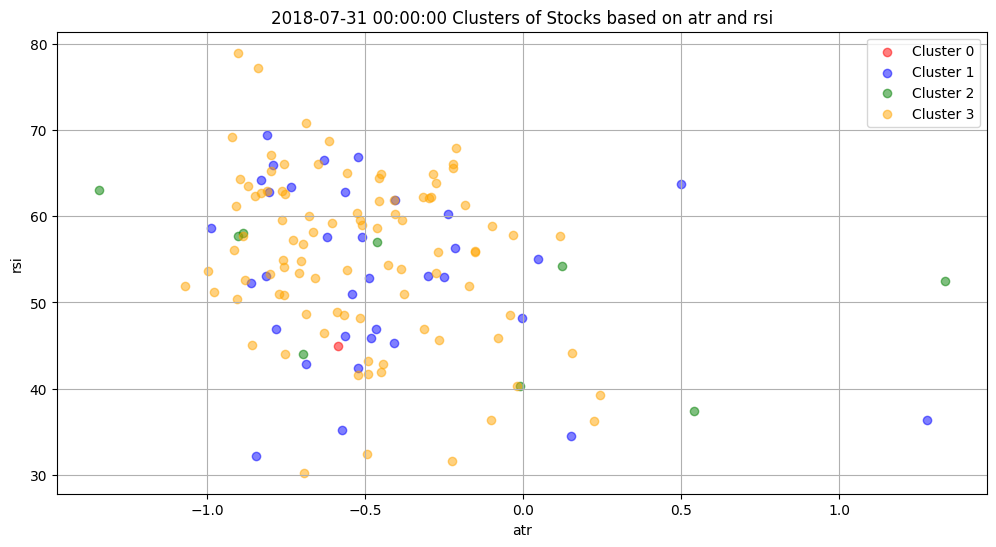

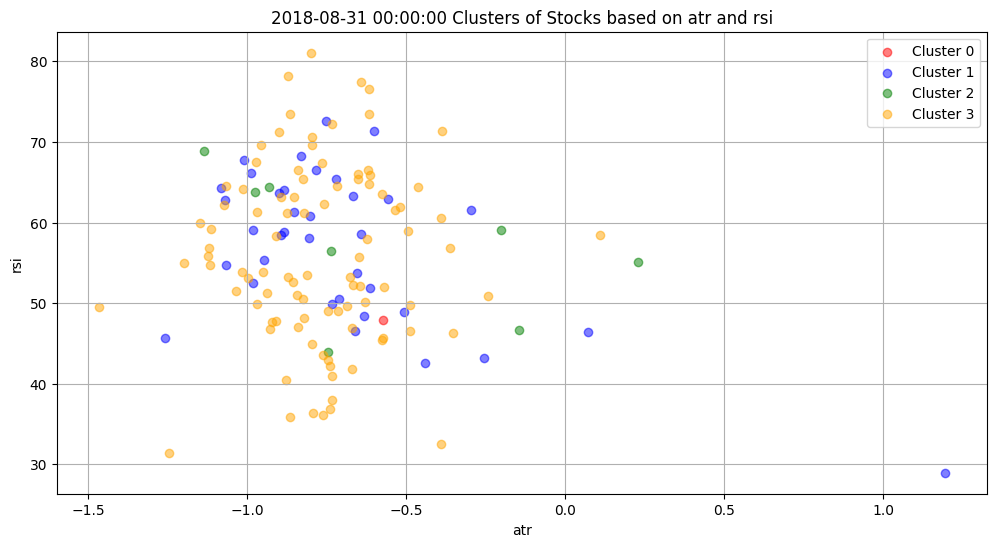

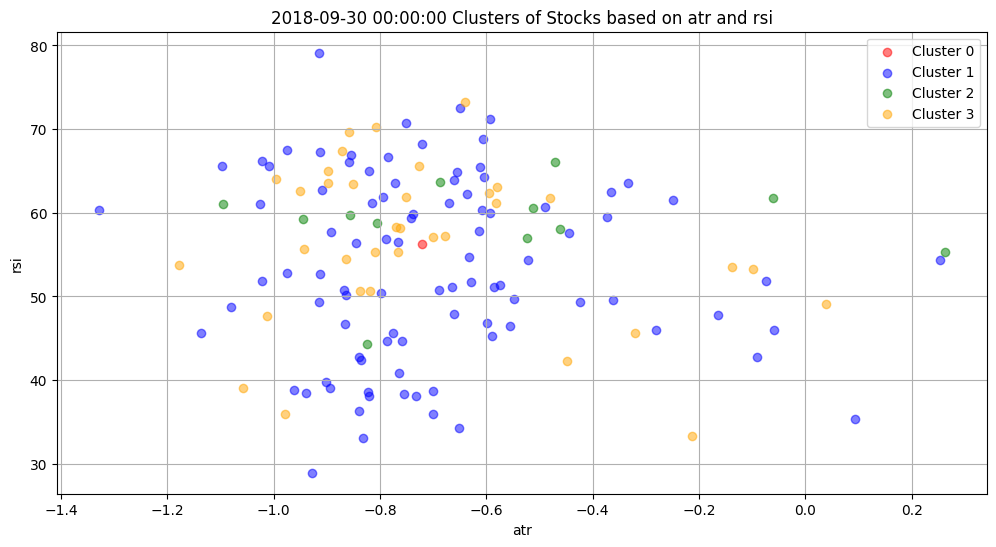

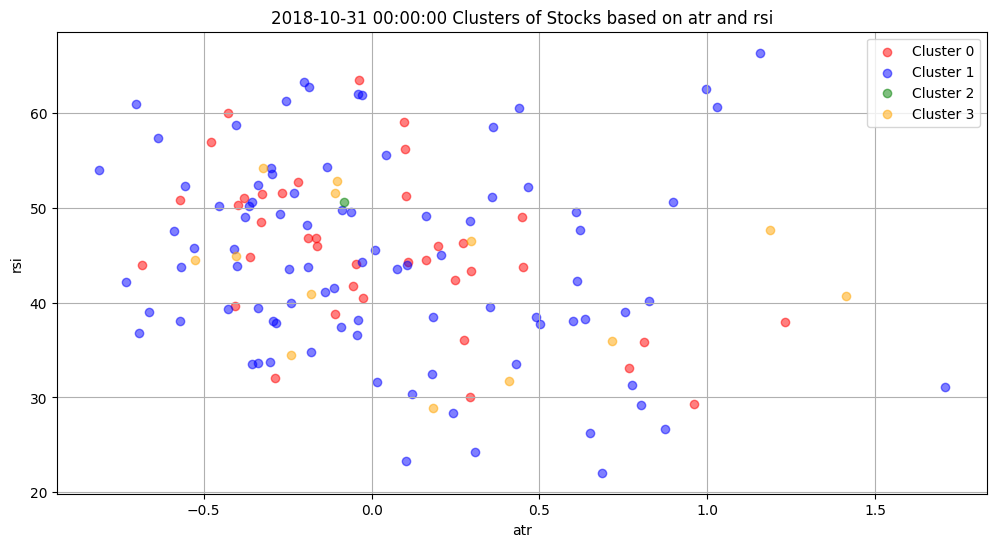

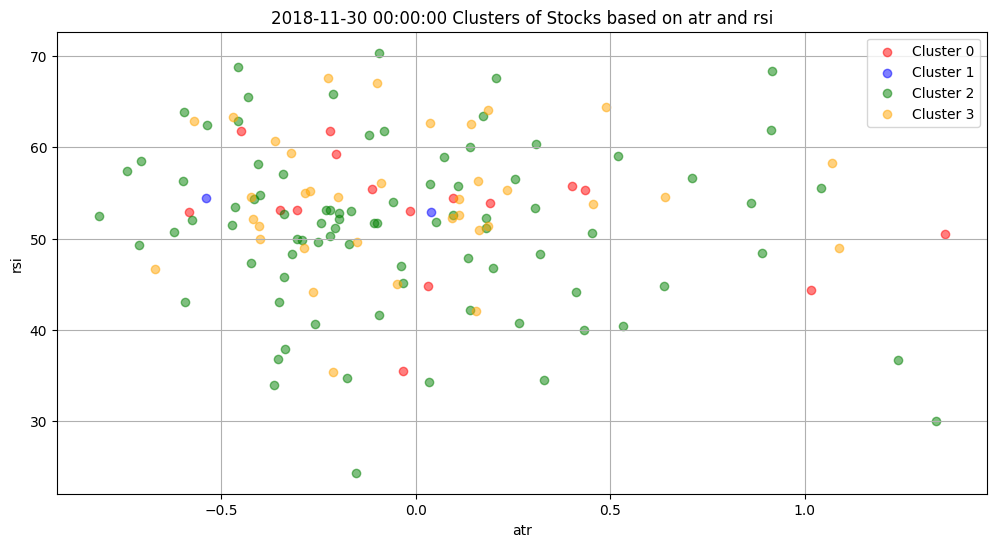

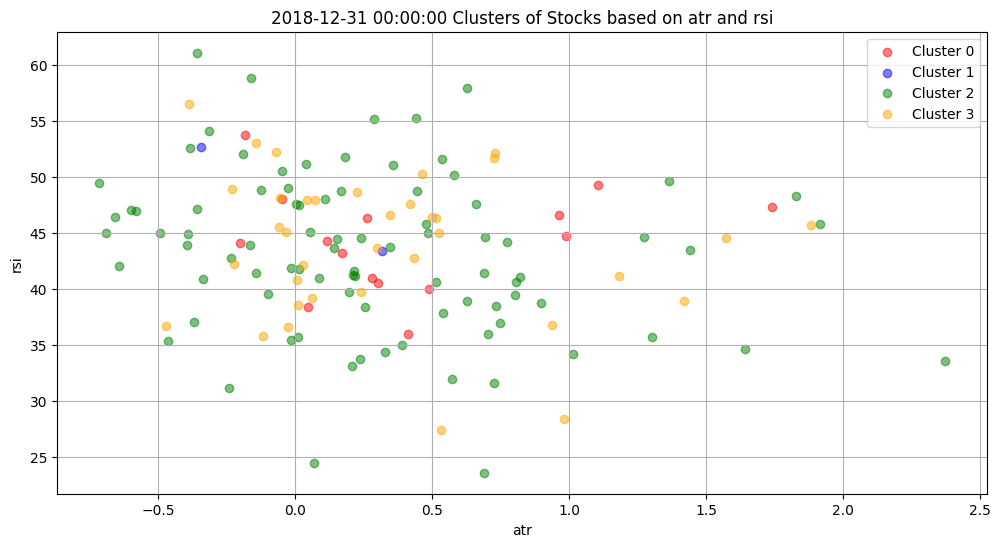

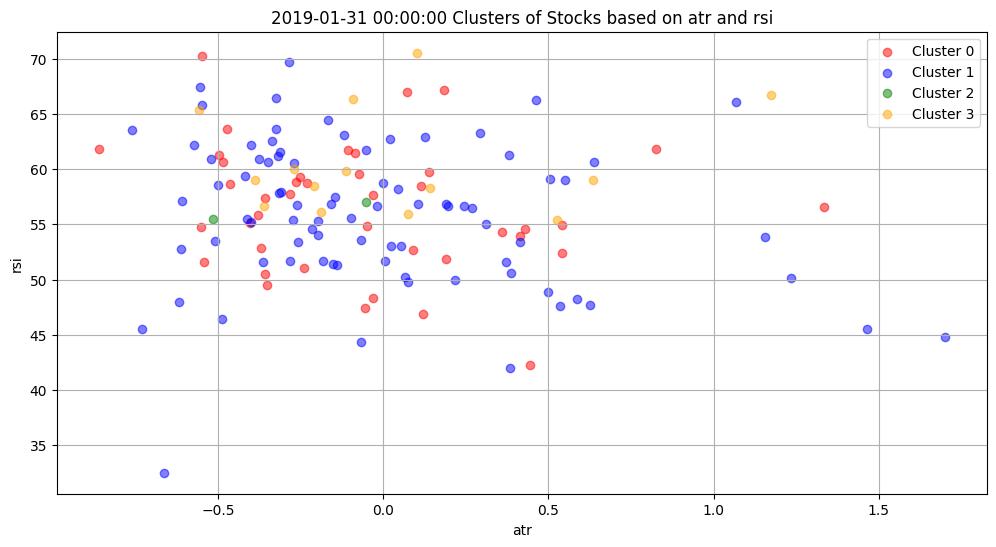

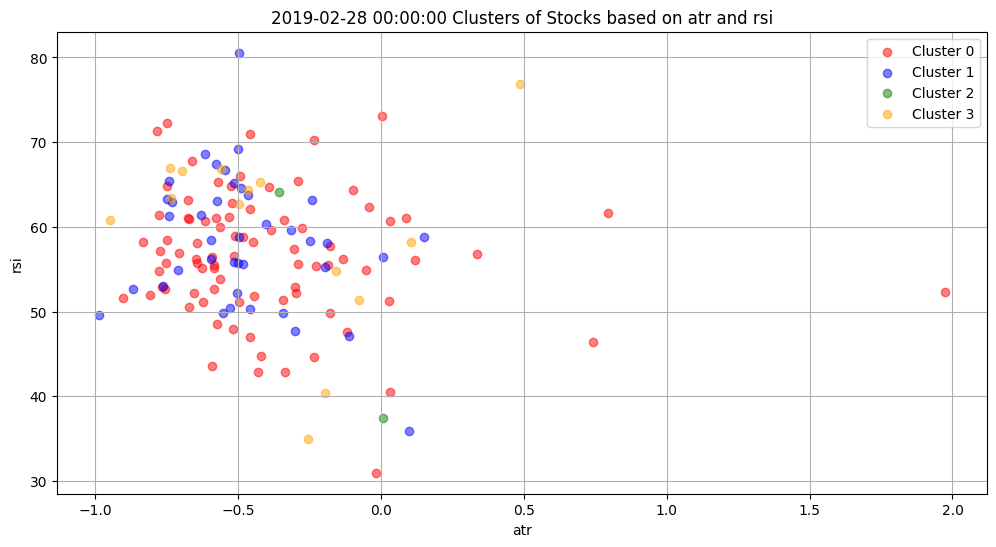

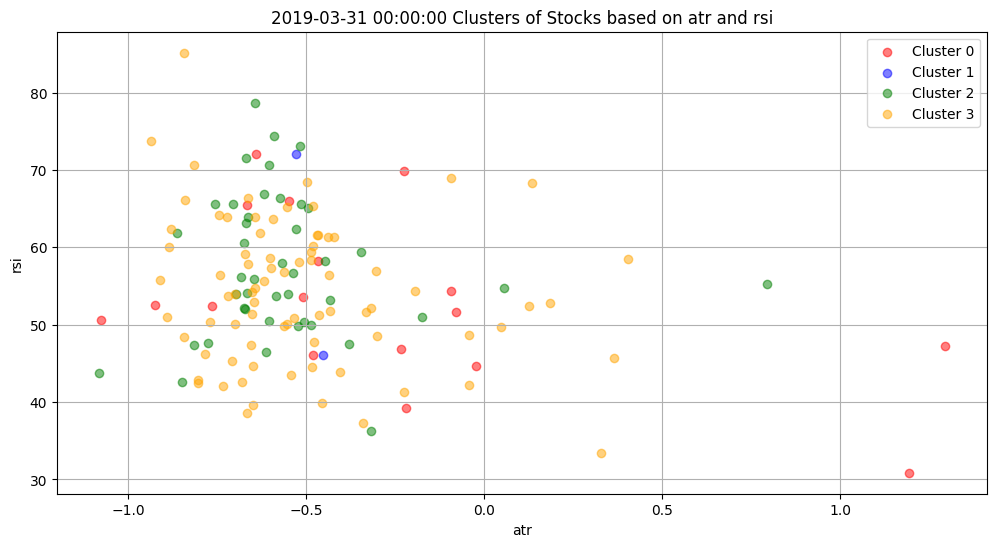

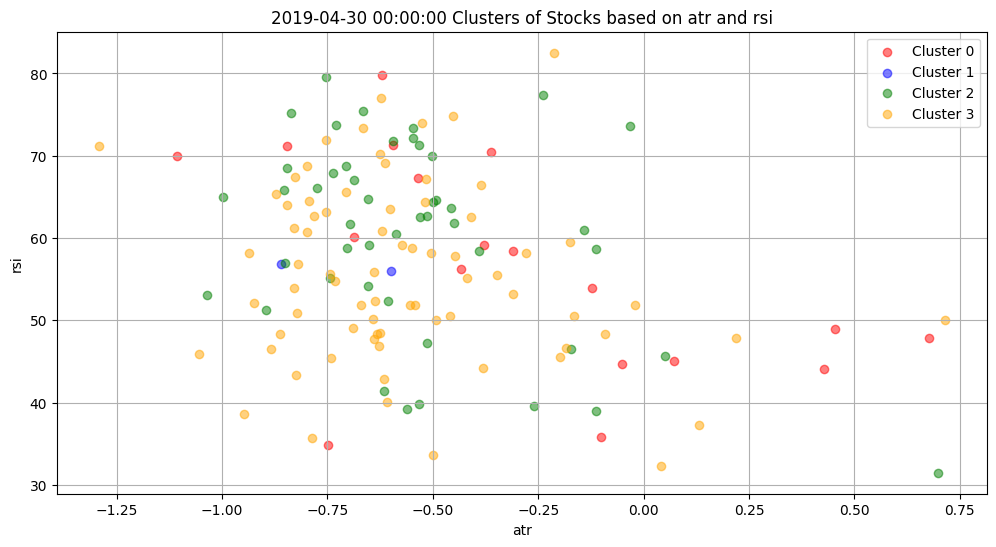

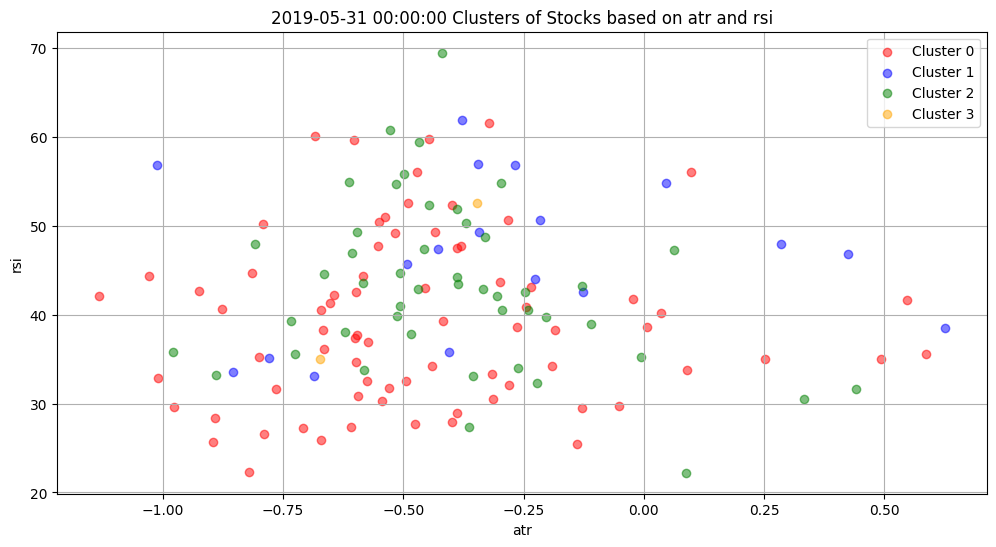

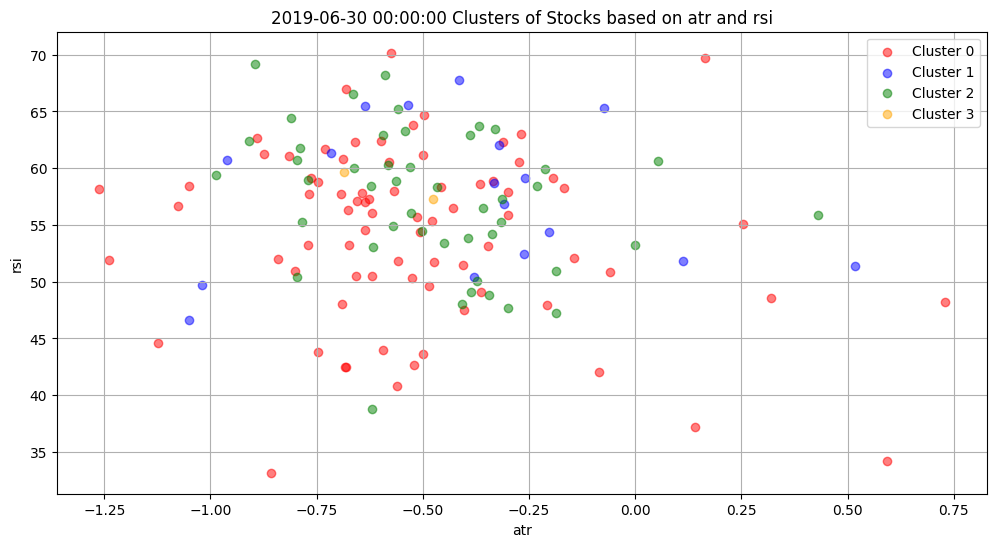

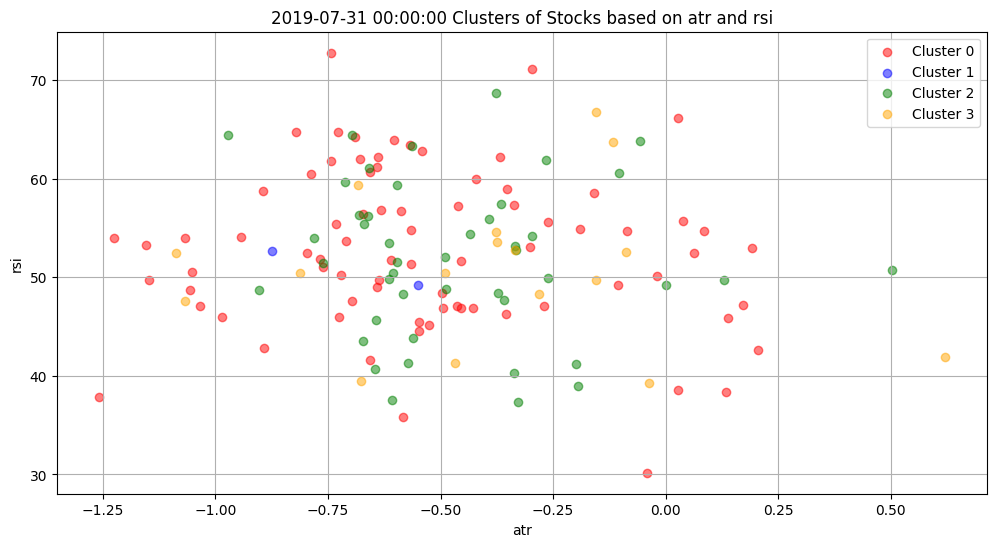

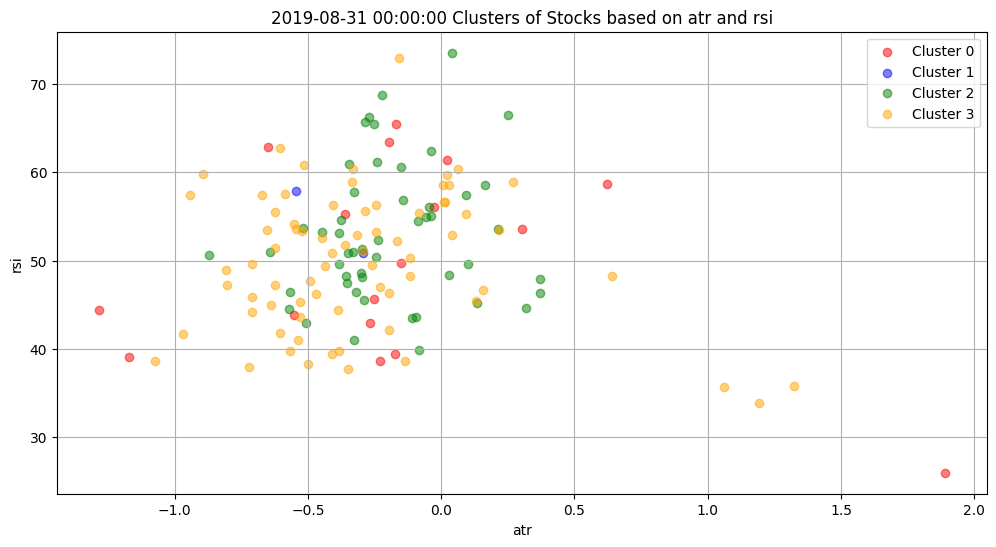

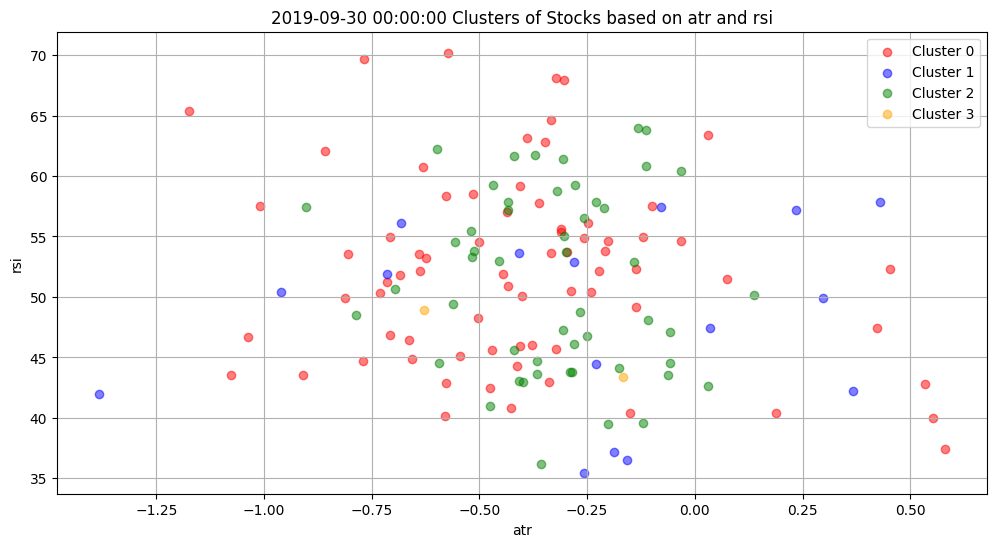

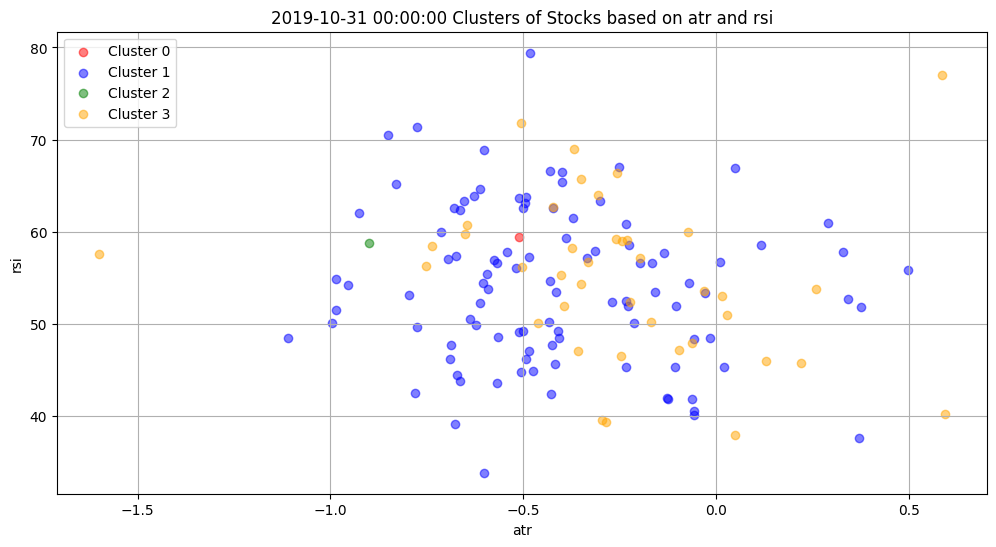

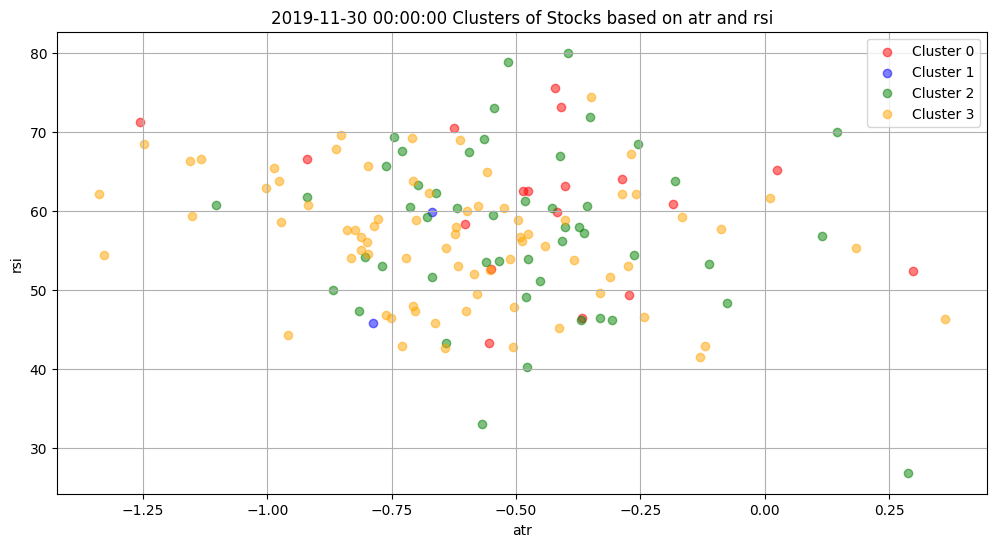

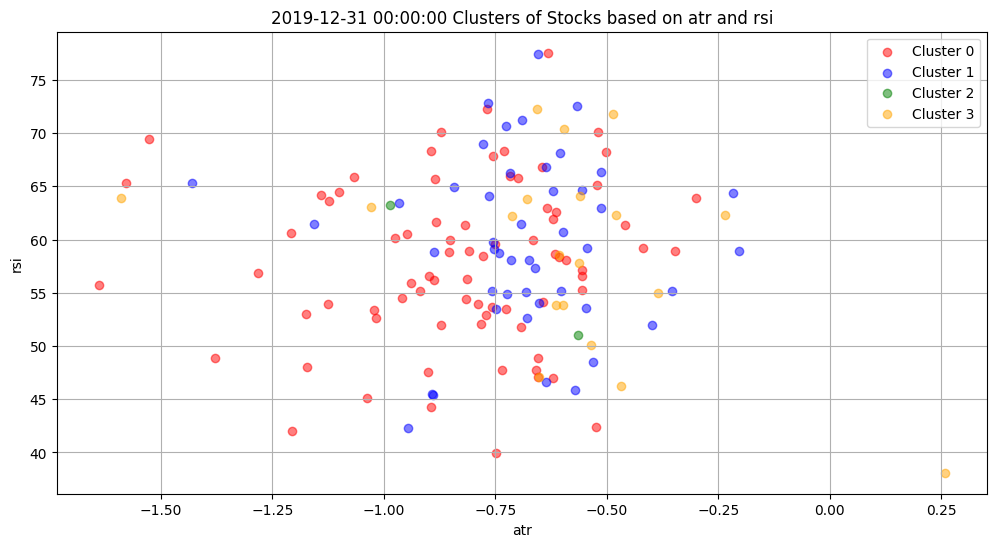

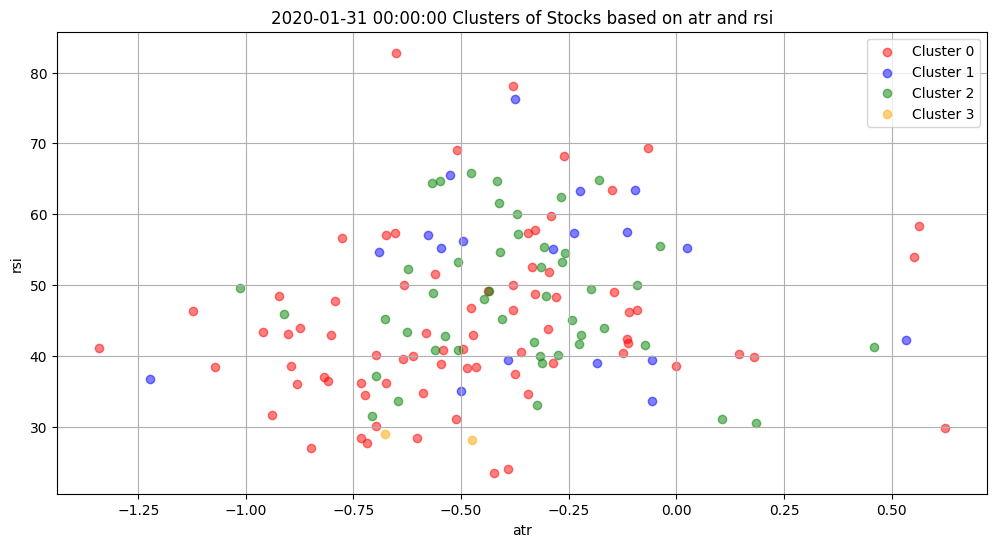

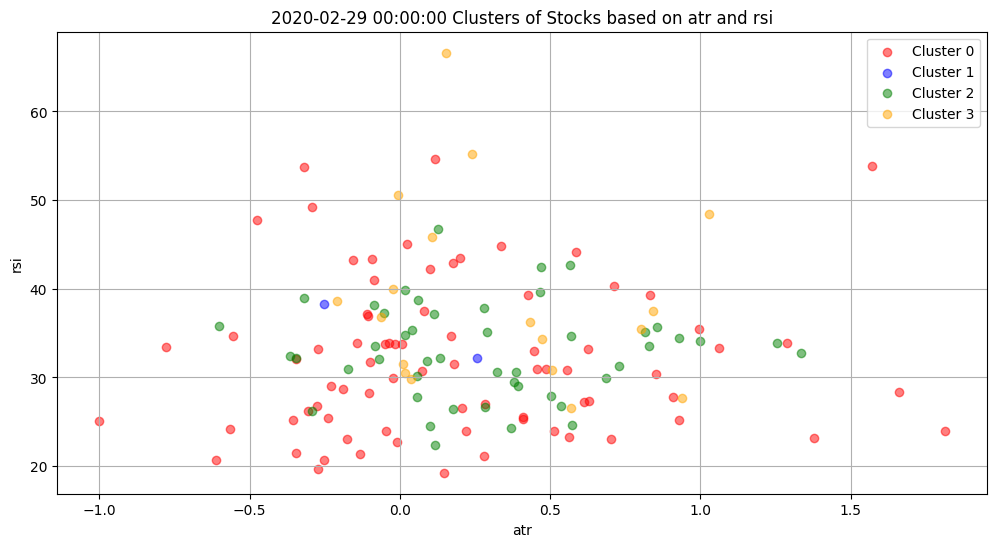

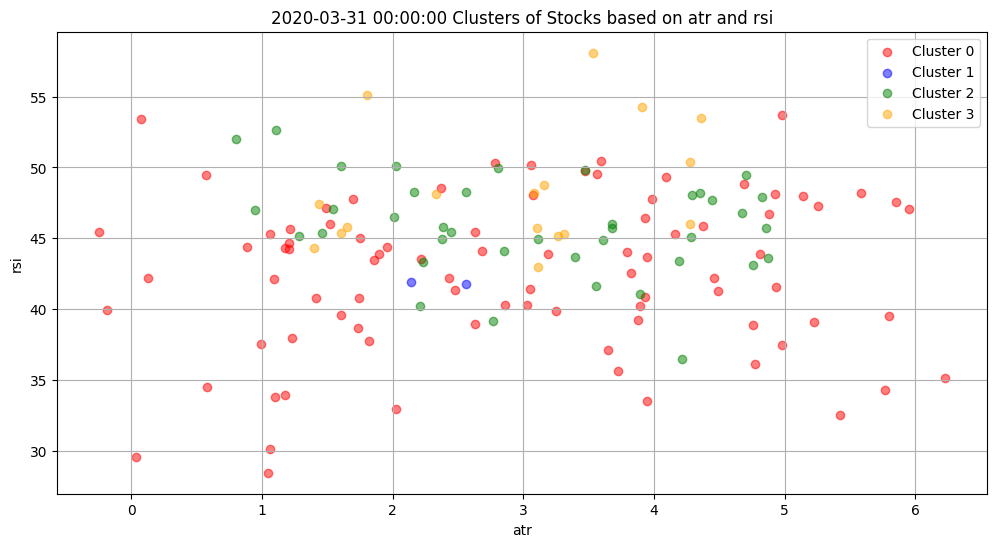

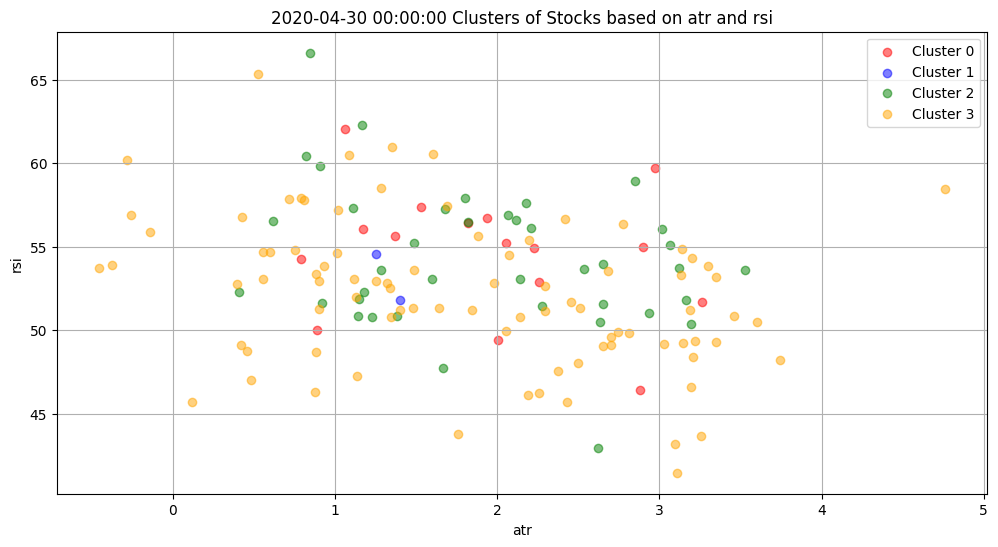

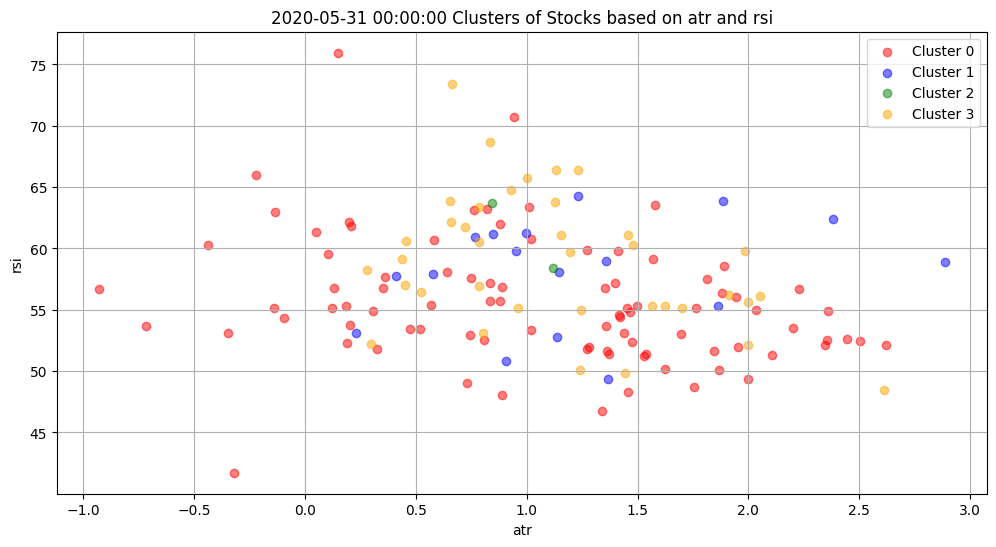

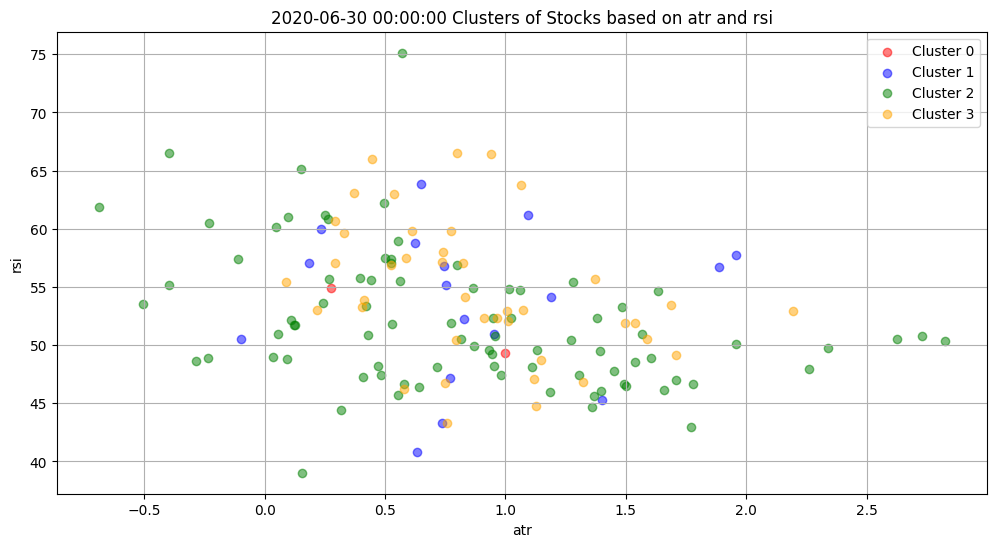

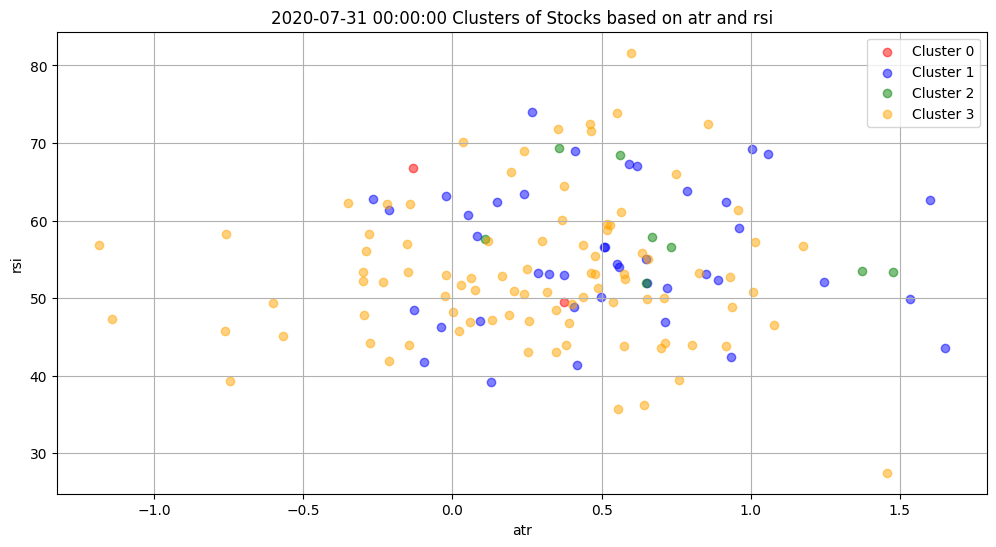

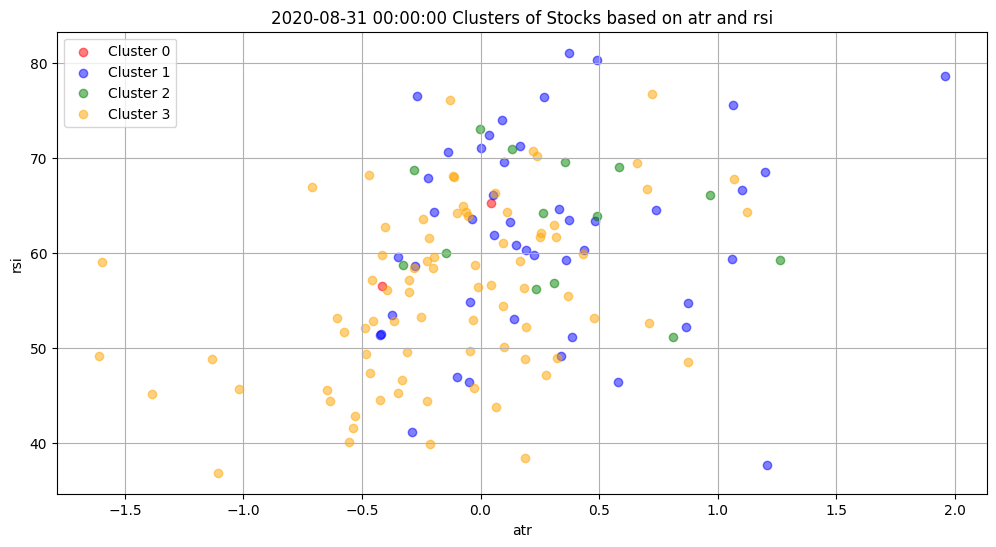

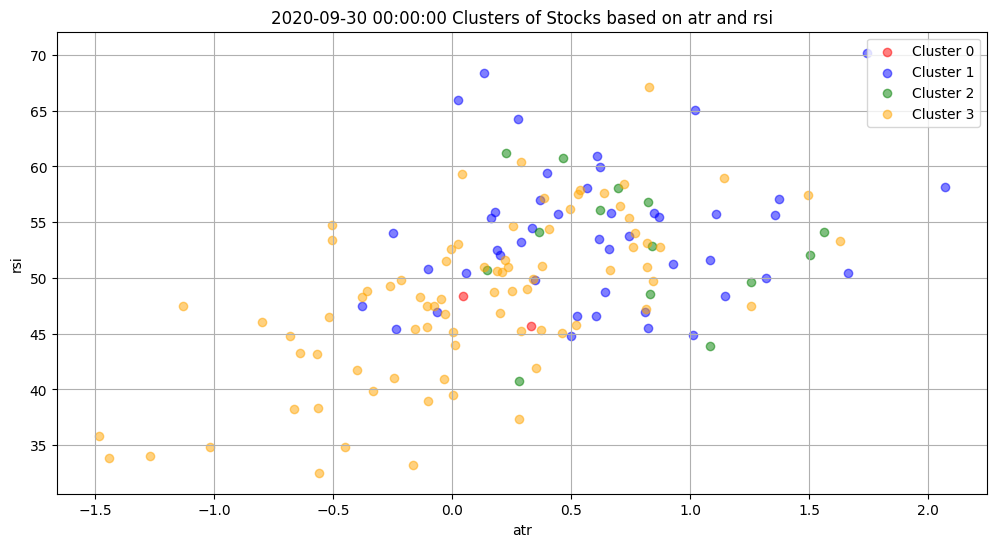

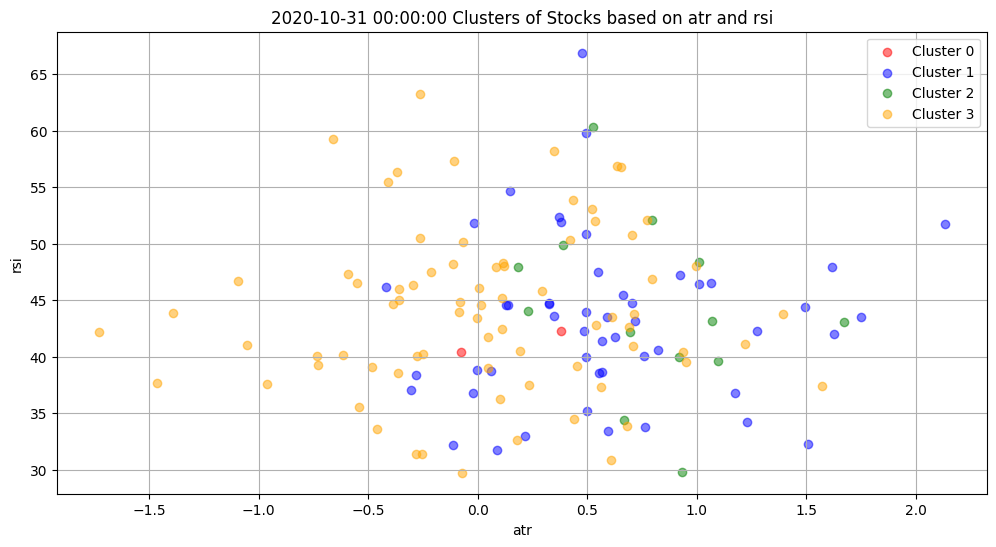

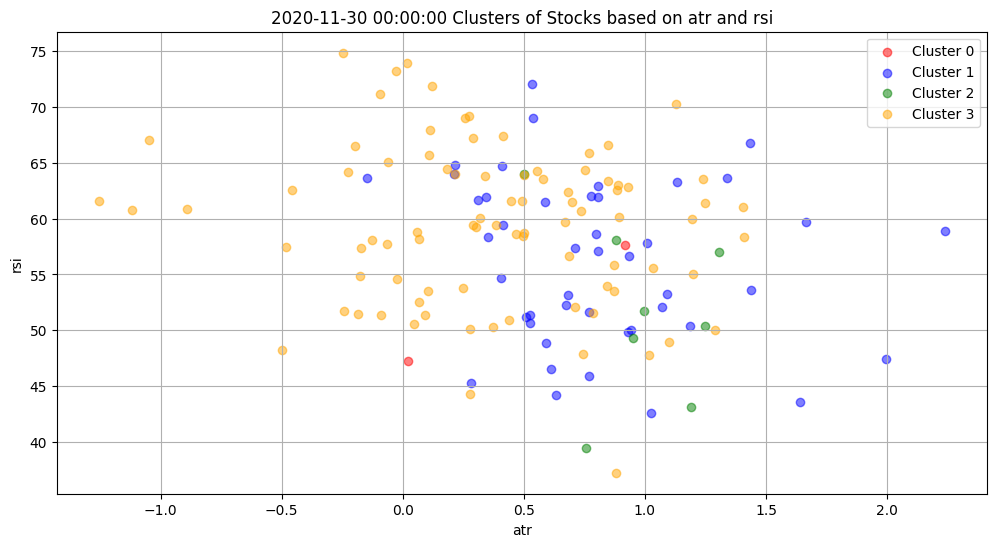

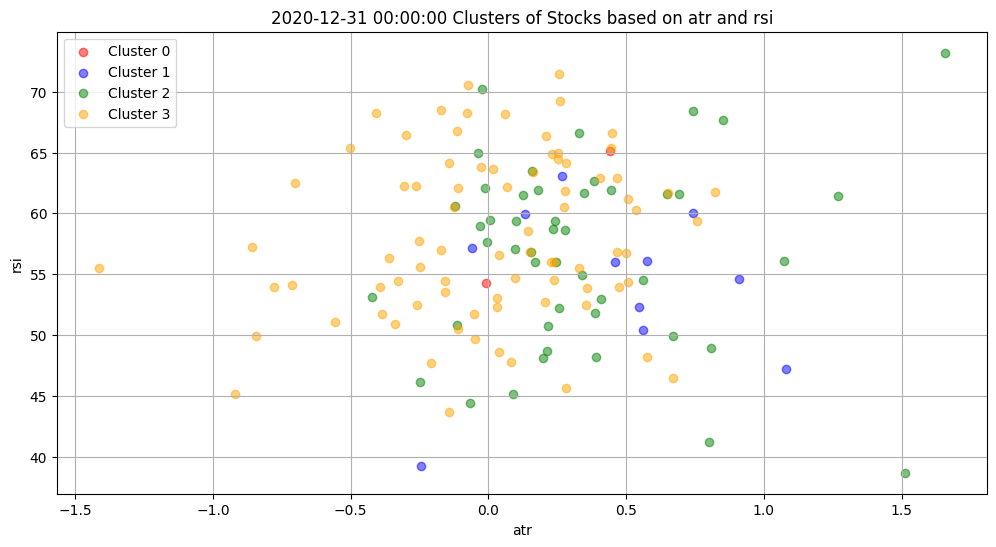

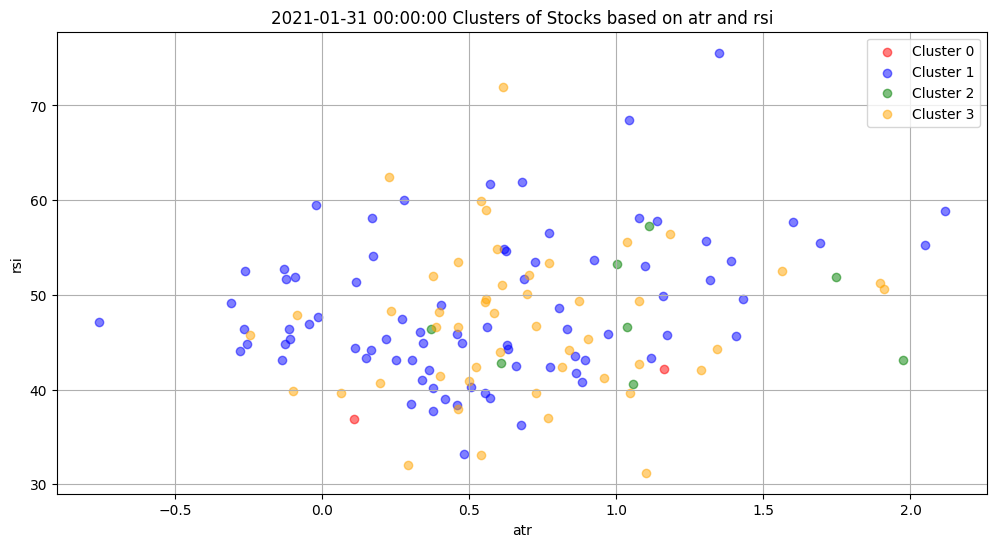

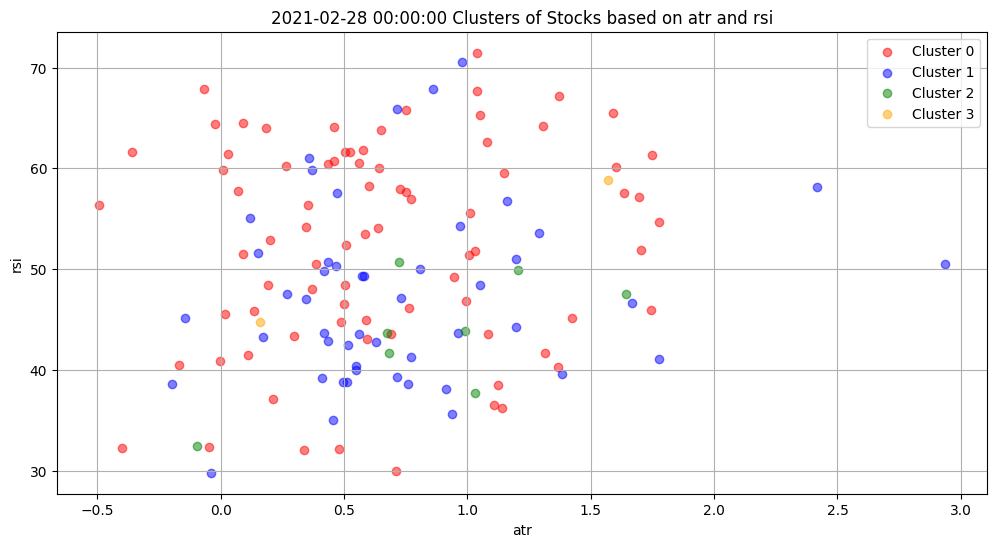

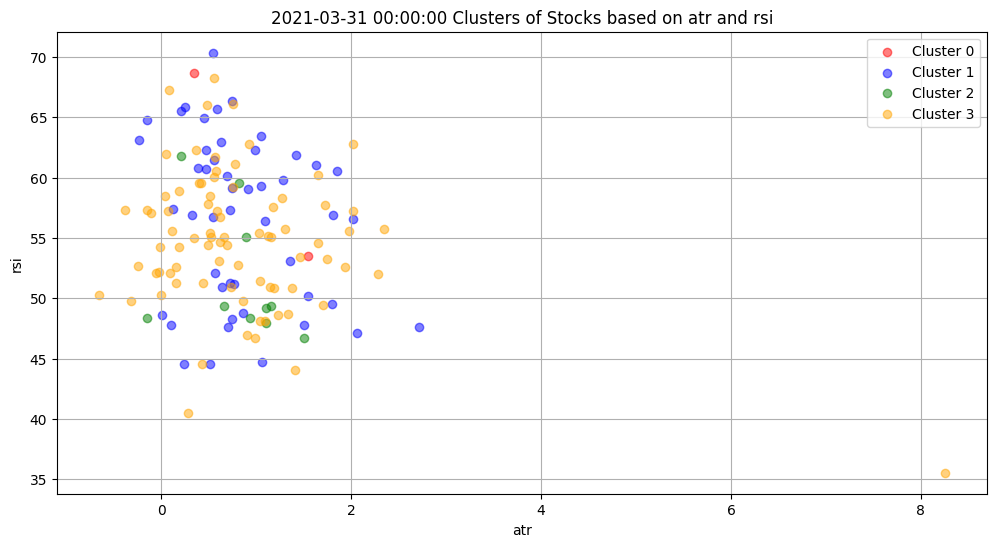

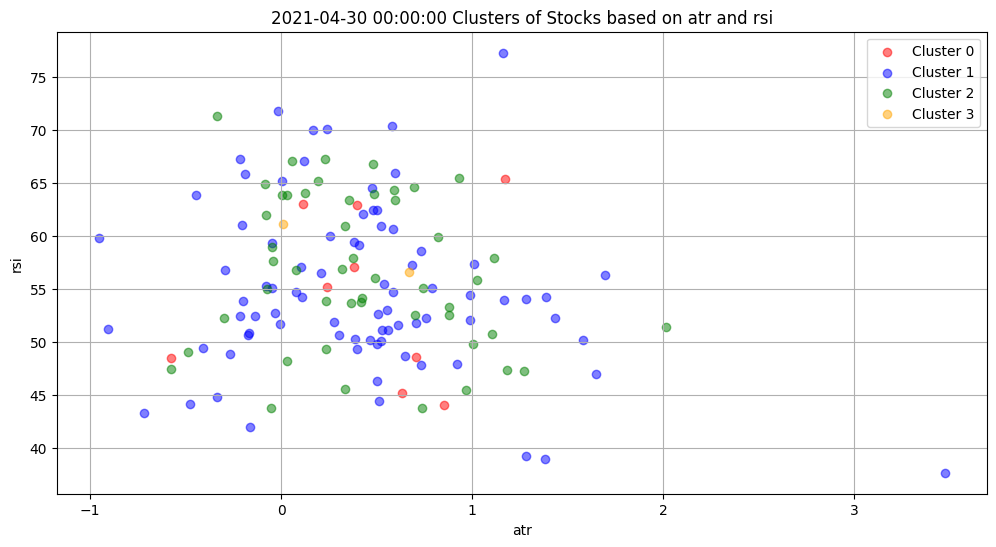

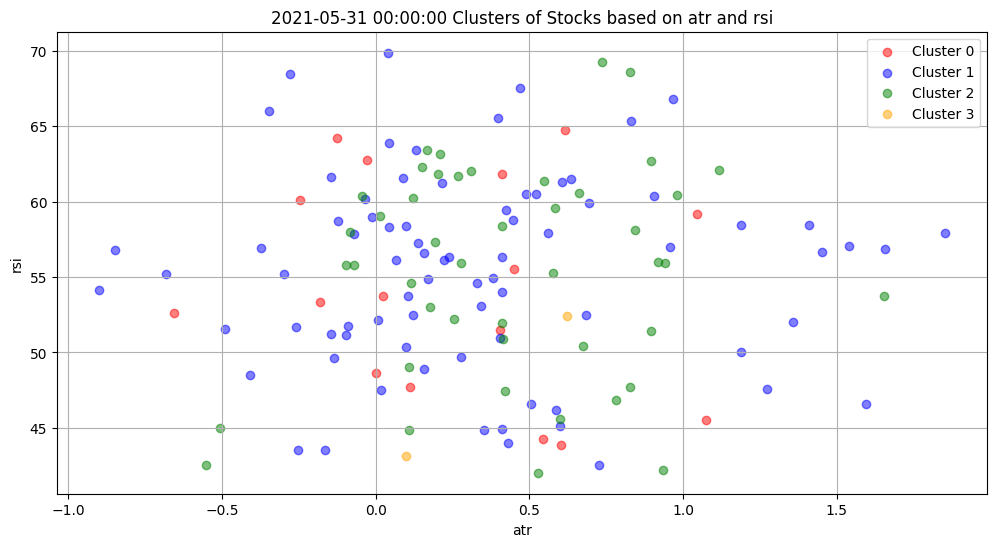

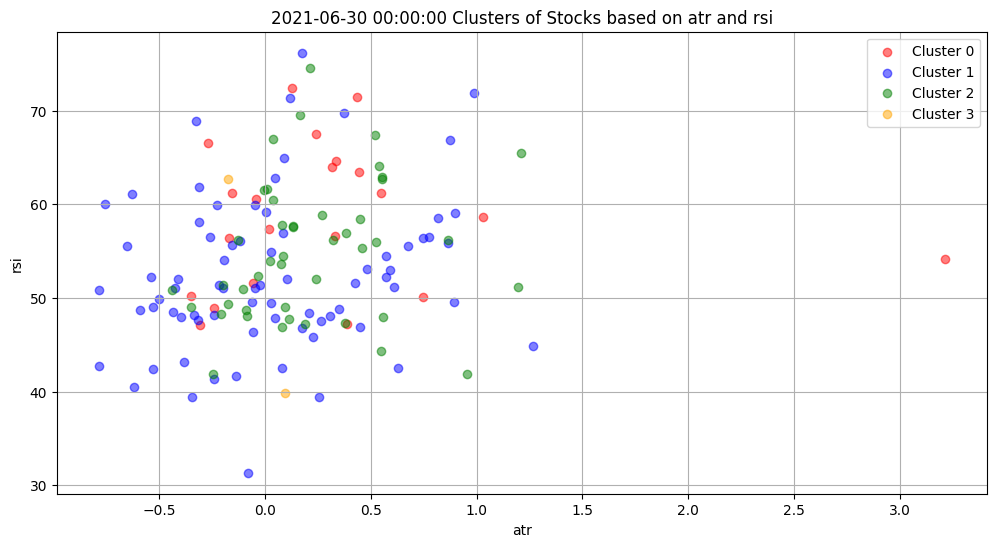

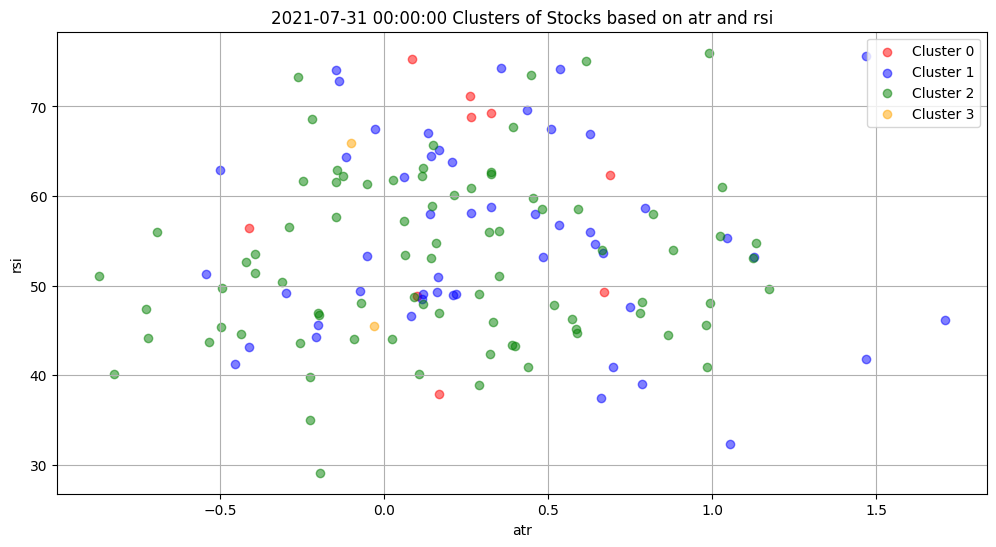

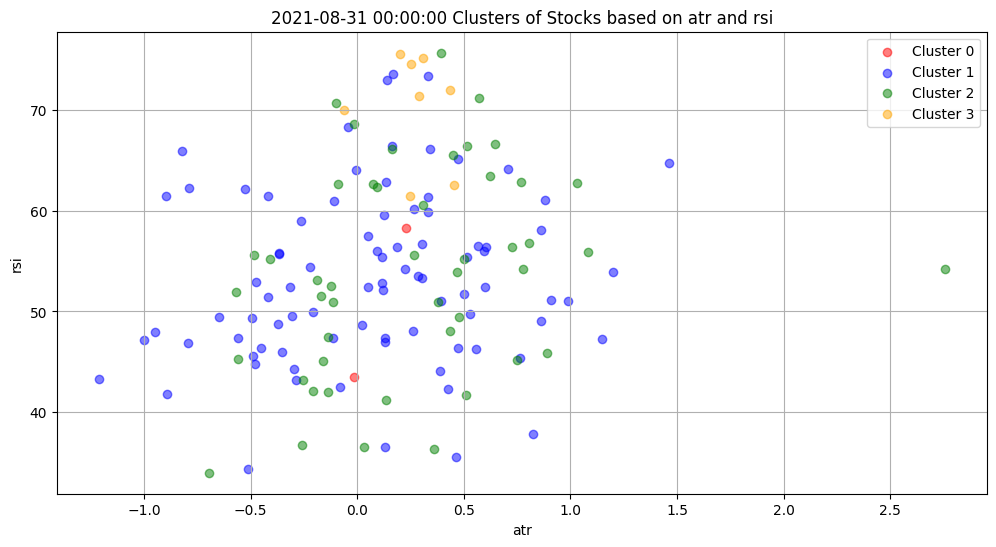

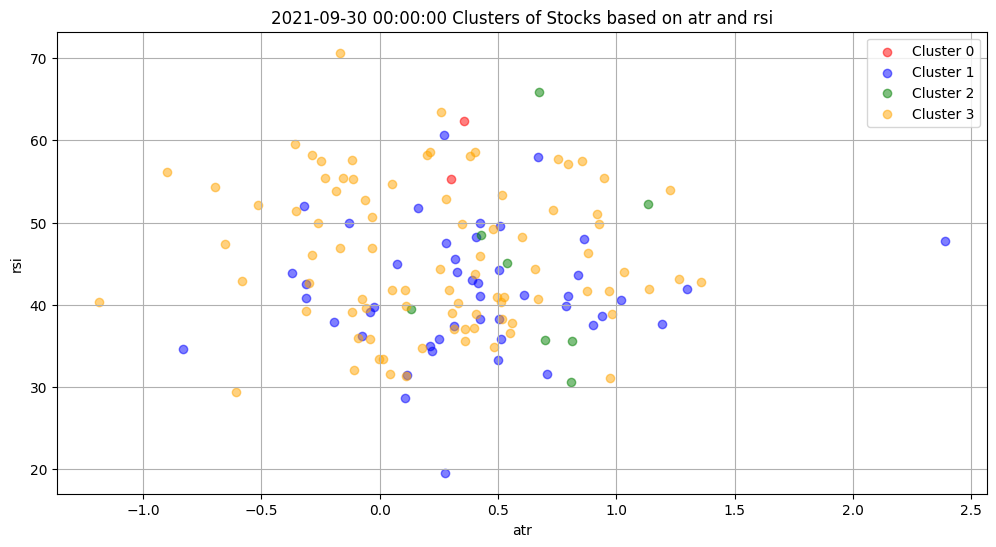

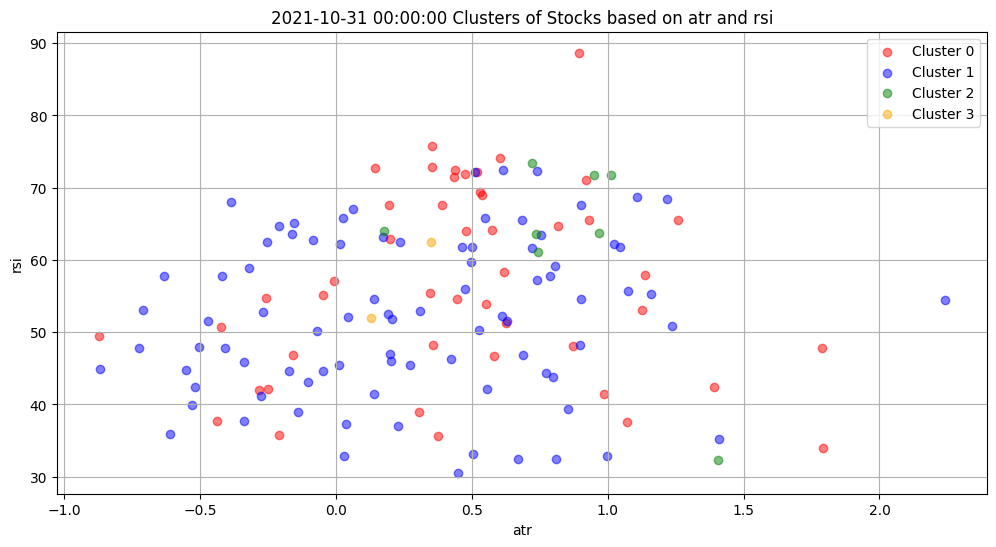

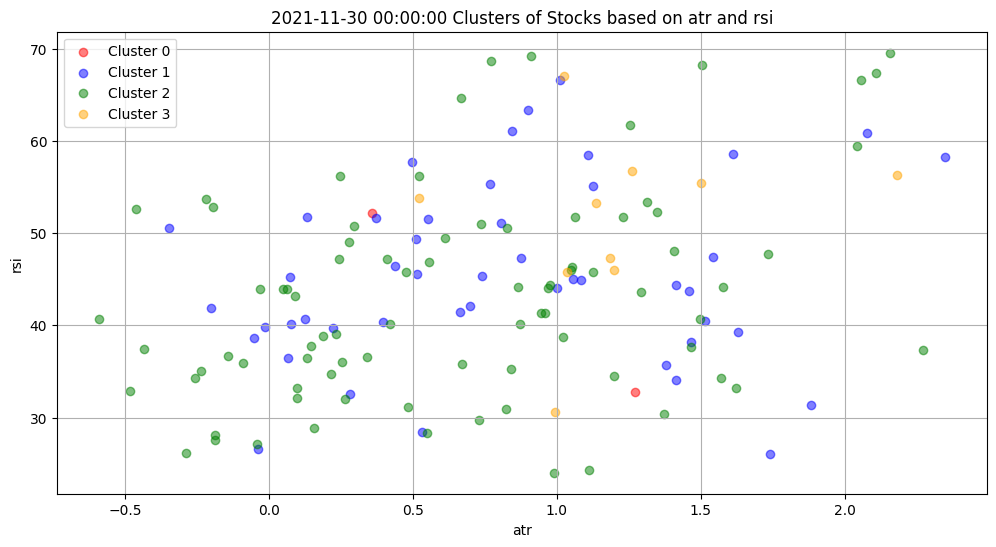

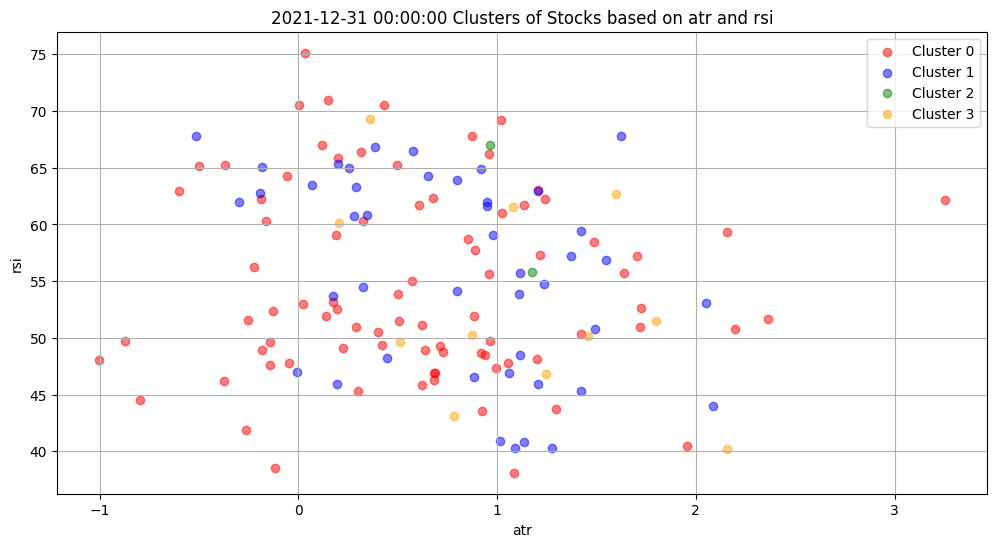

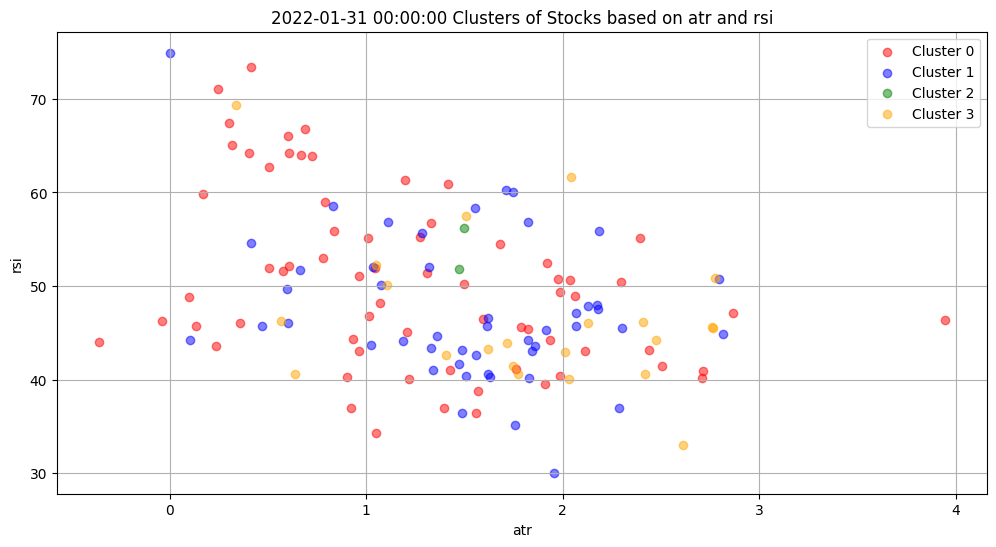

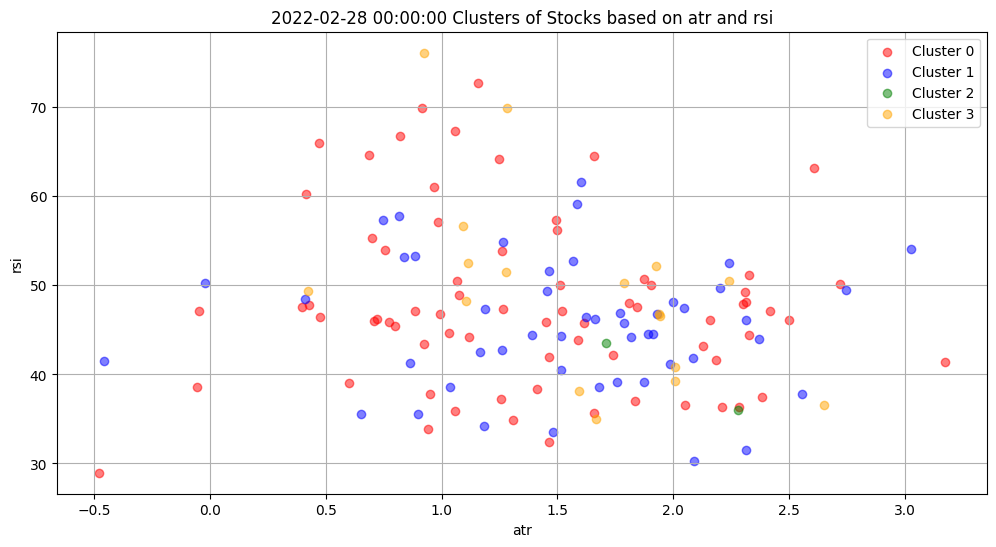

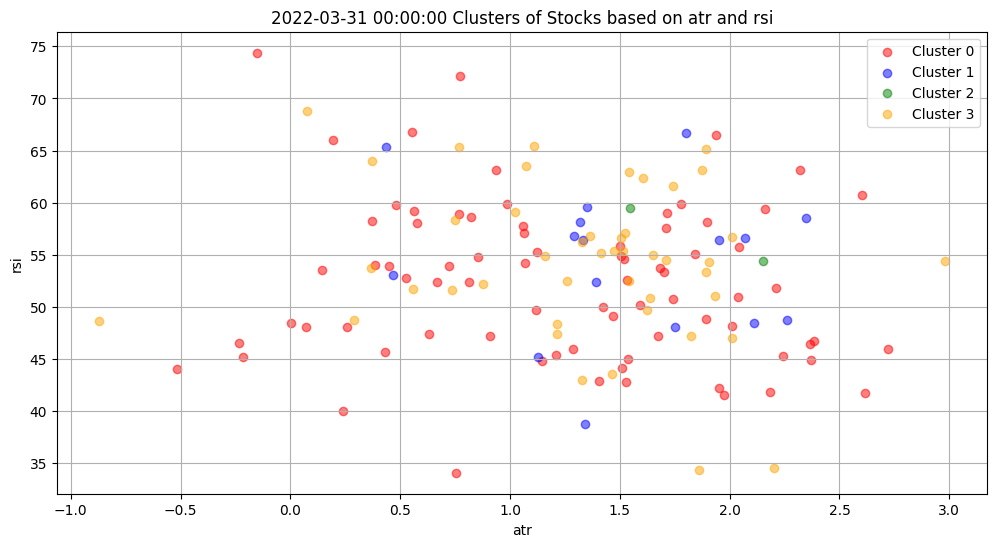

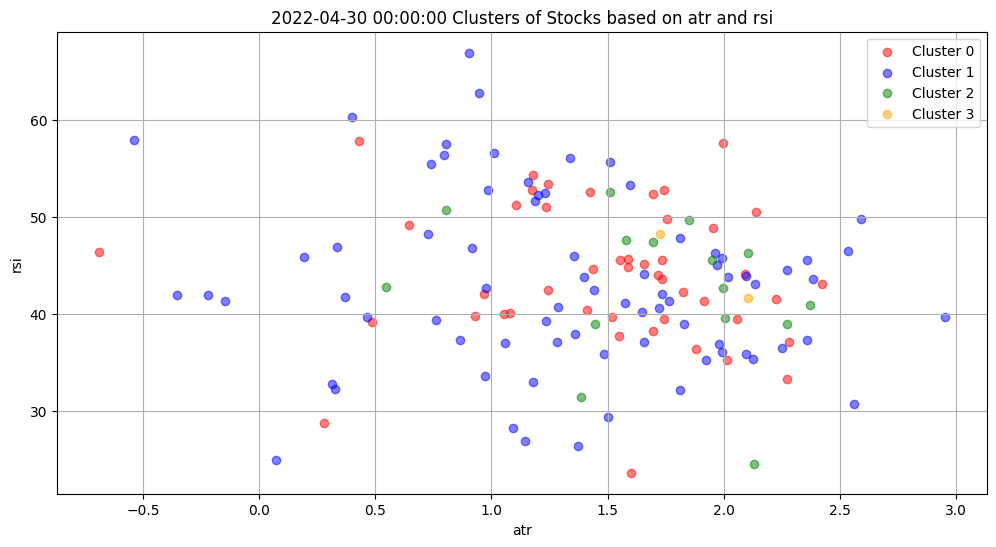

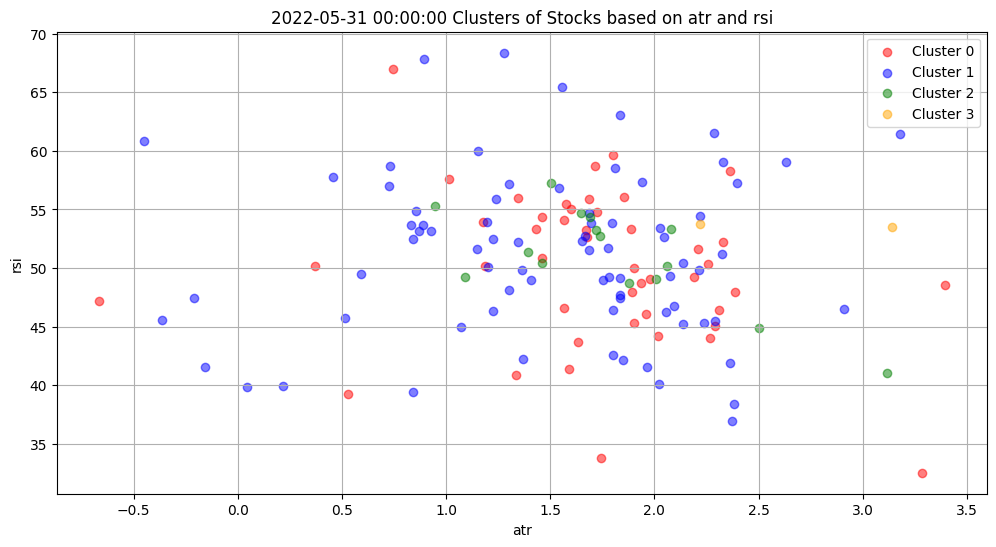

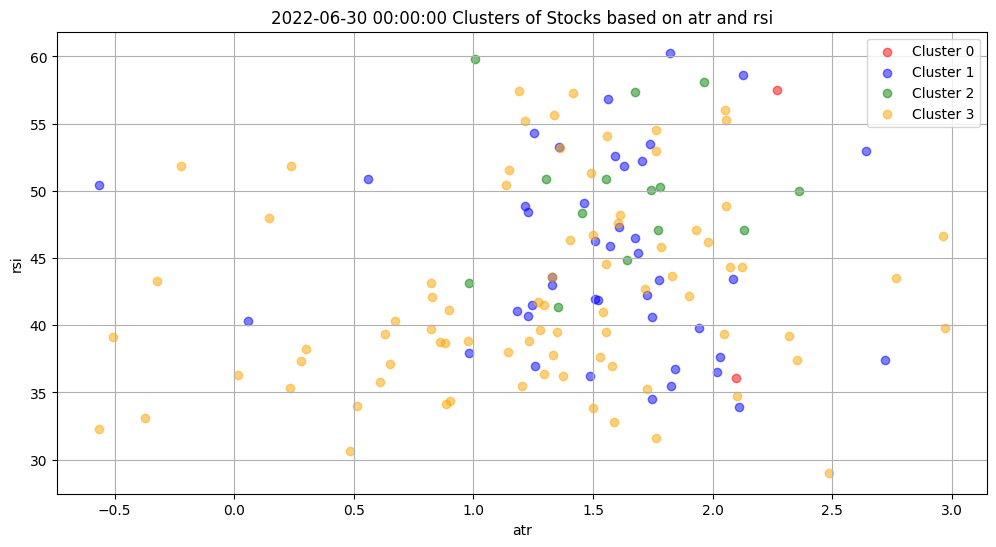

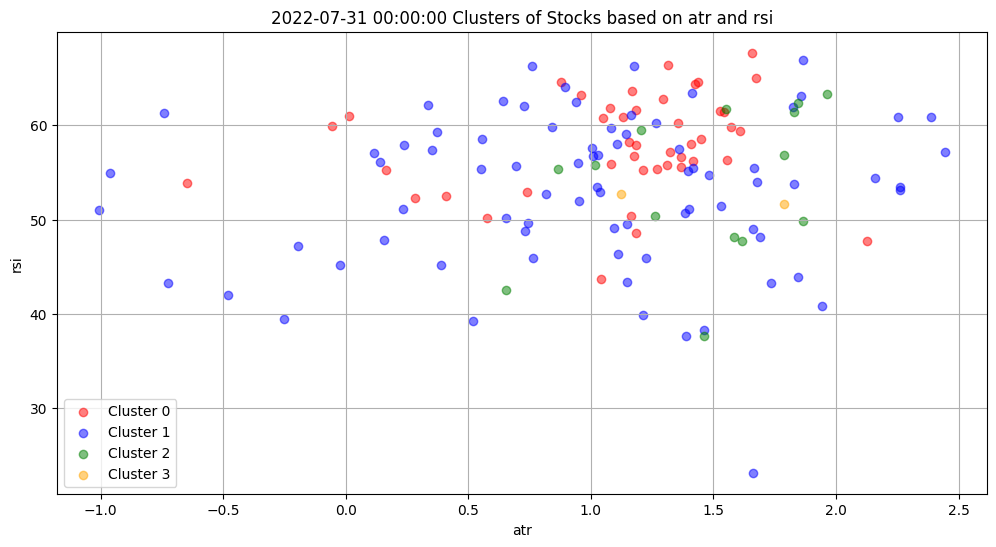

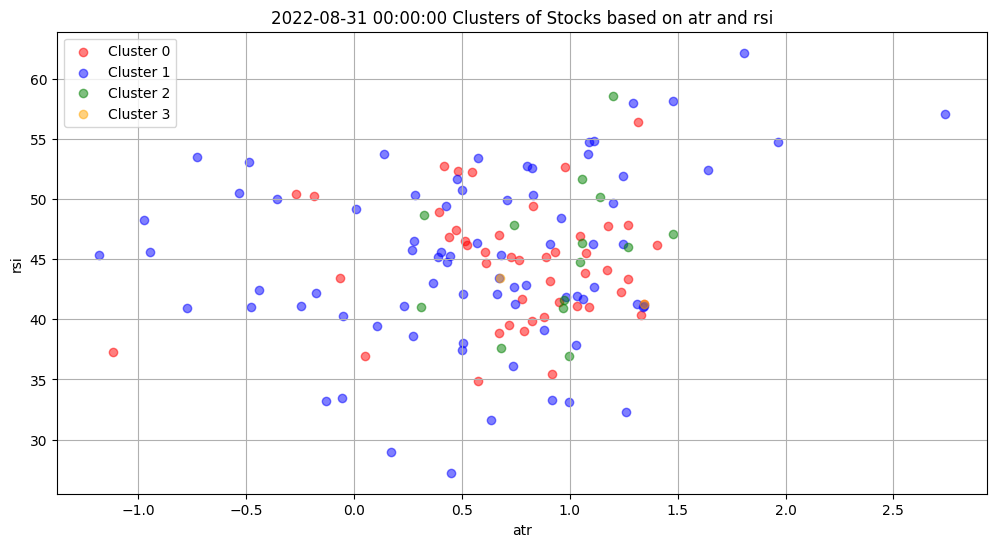

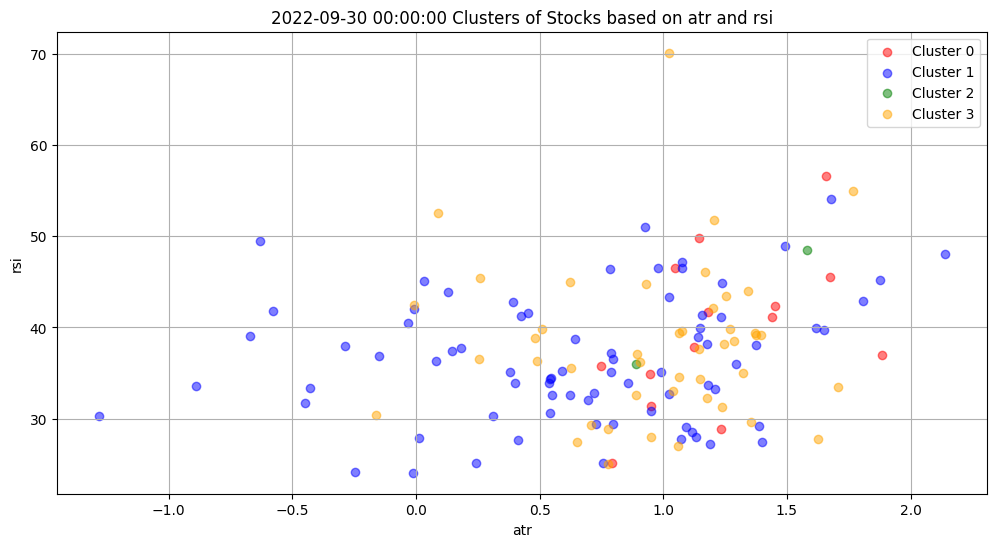

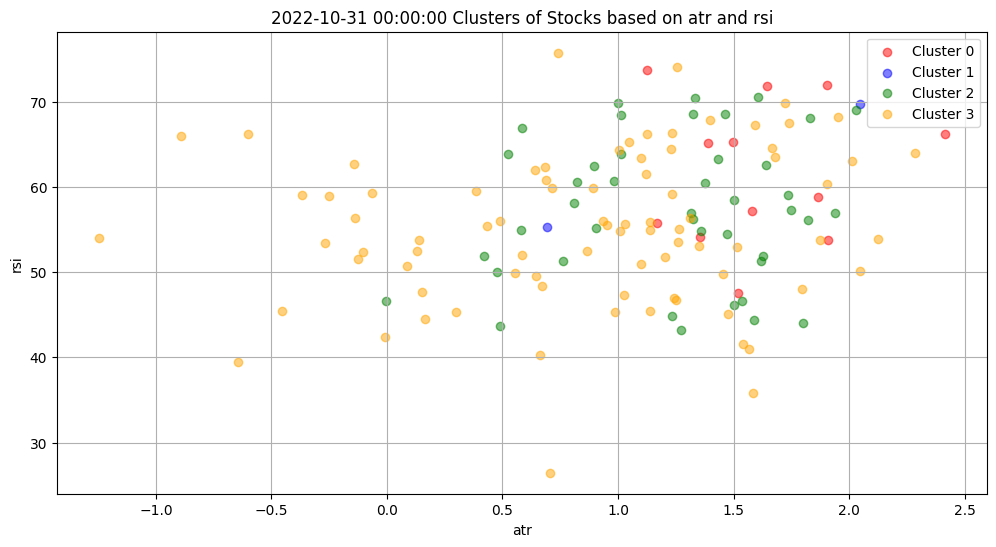

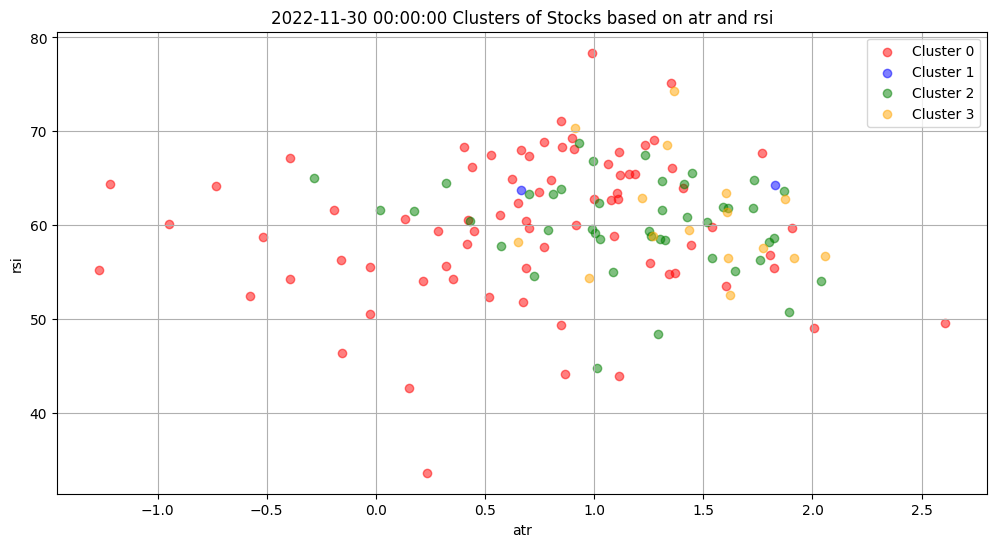

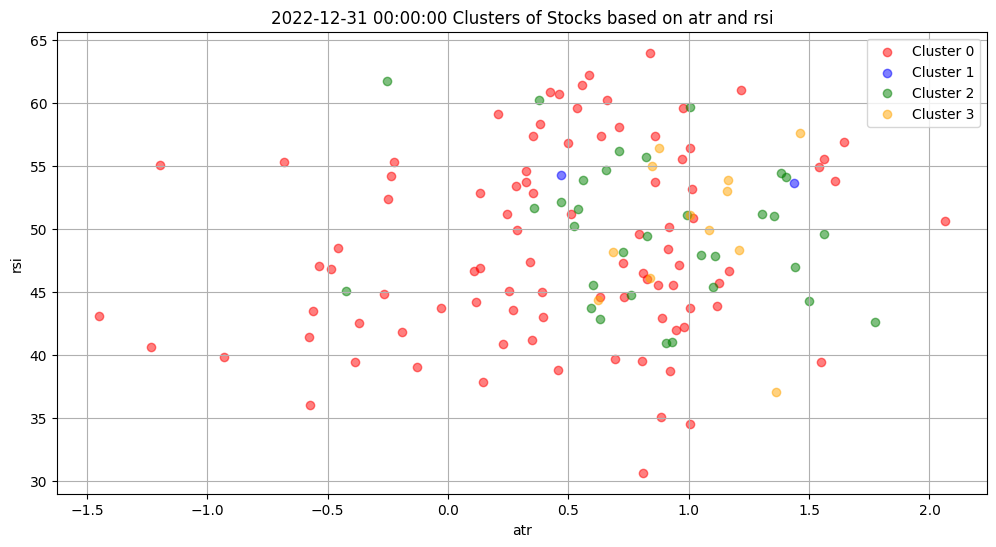

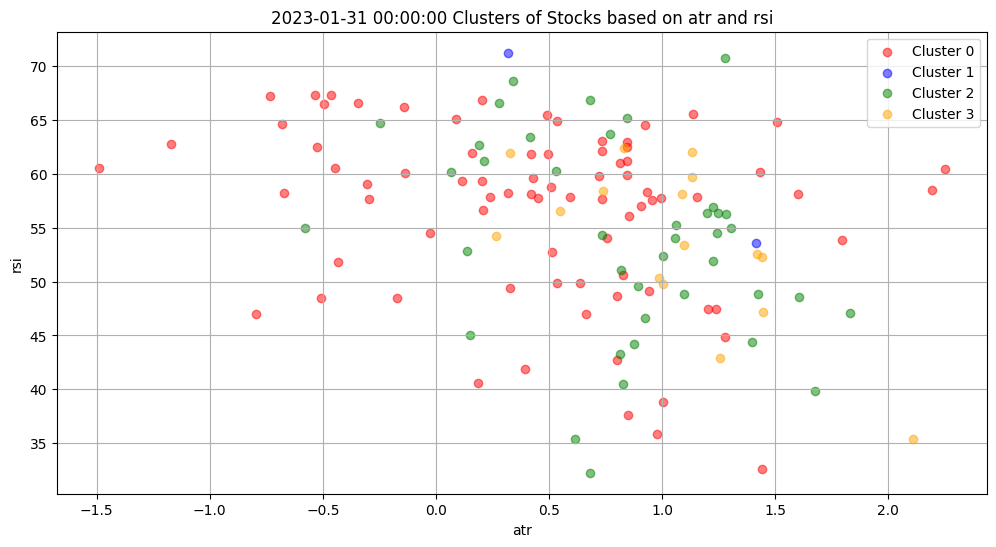

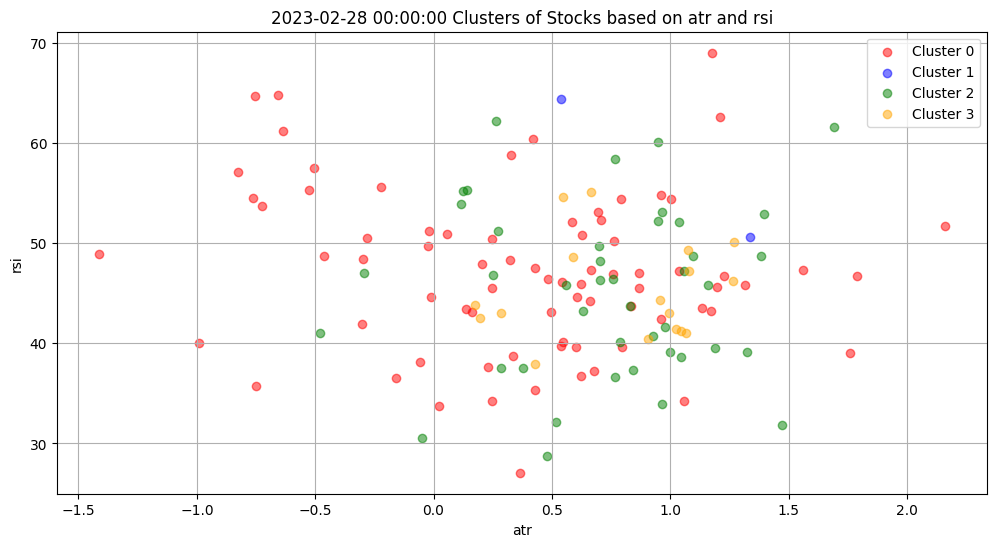

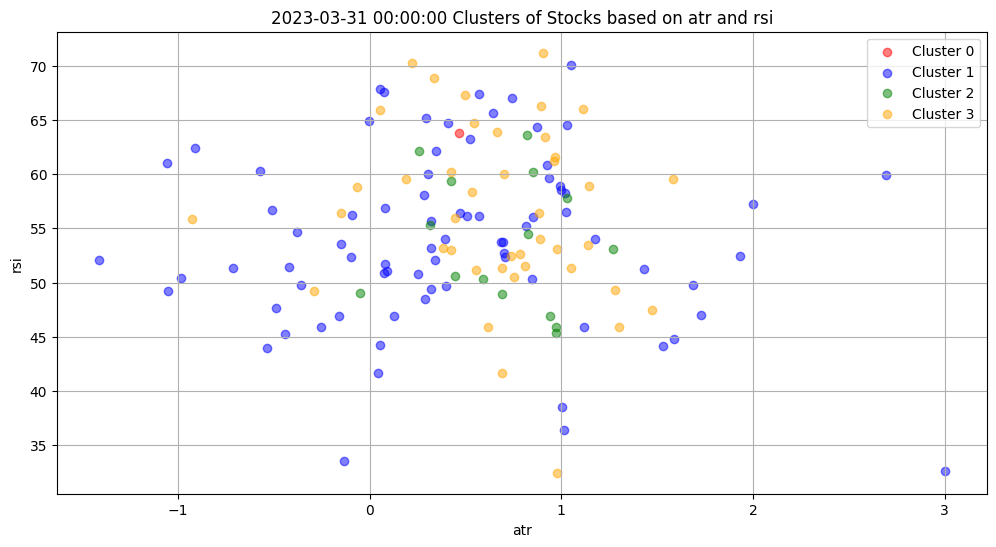

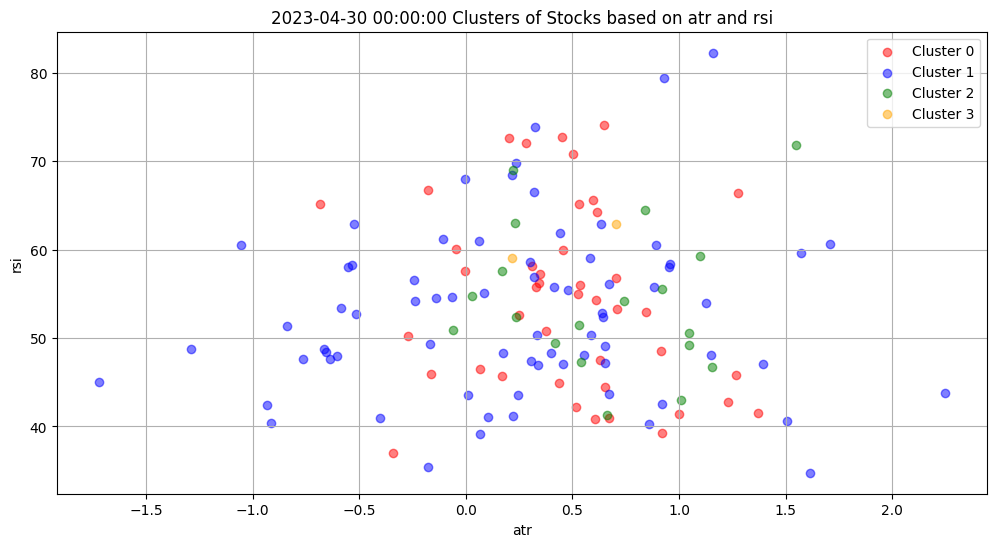

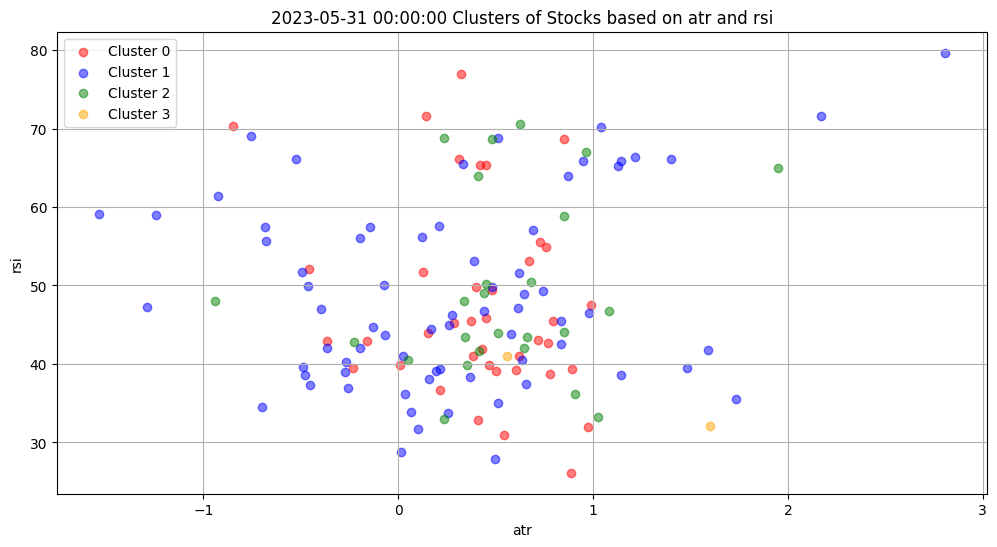

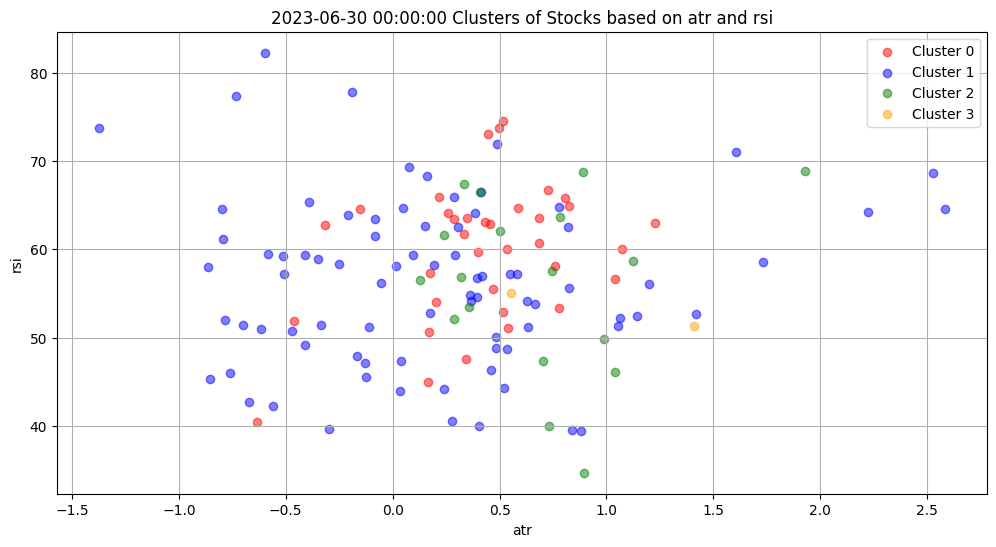

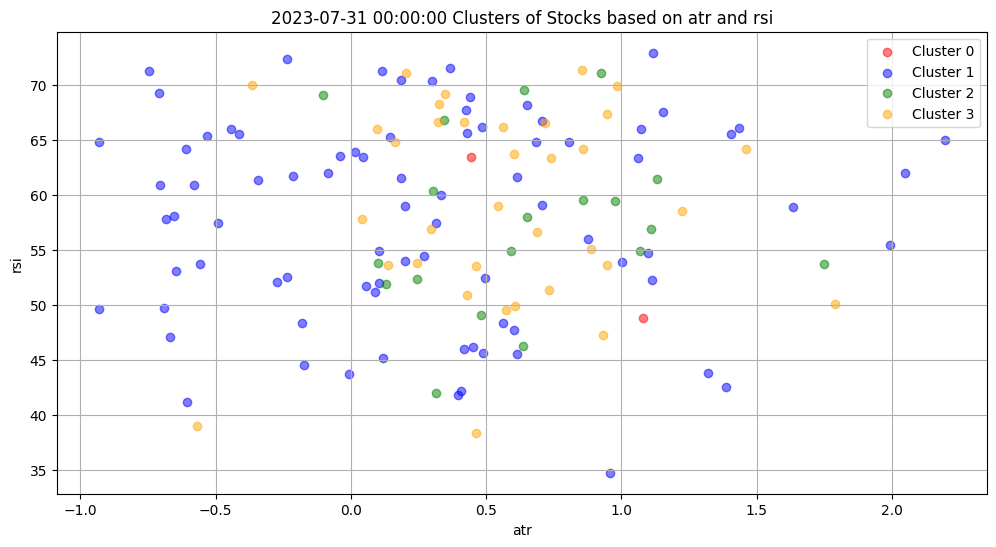

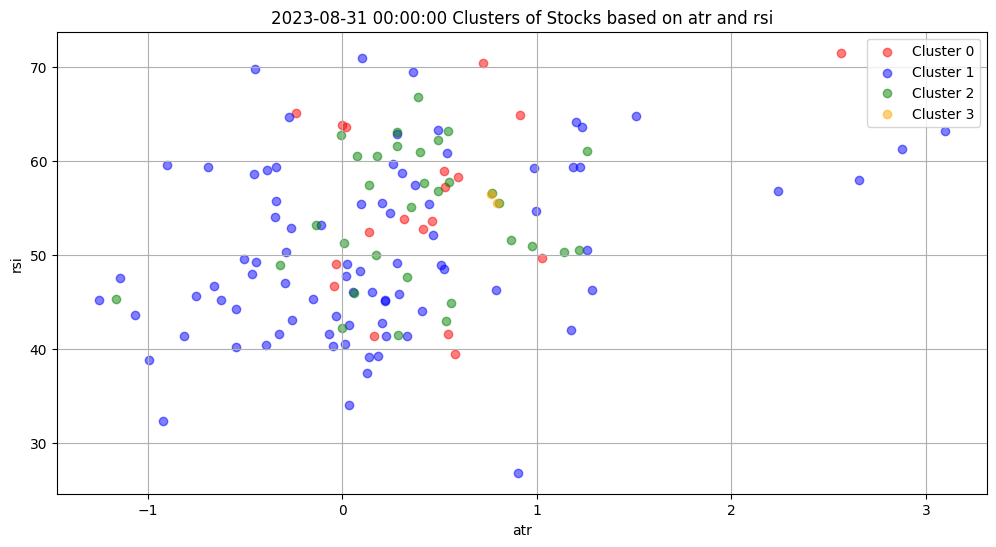

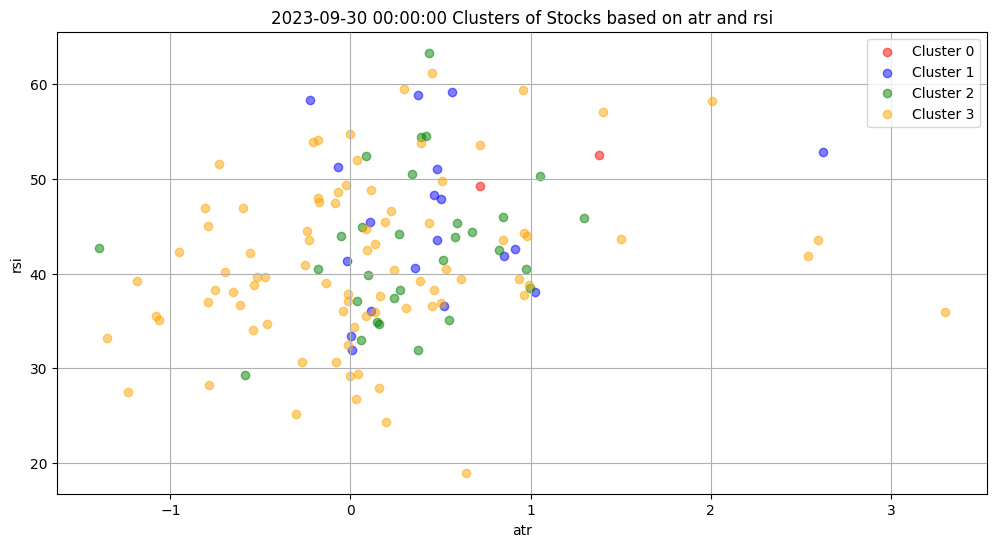

In [67]:
#plt.style.use('ggplot')
# Plot clusters for each month
# We will use 'atr' and 'rsi' as the features for clustering
plot_all_clusters(df2, col1 = 'atr', col2 = 'rsi', n_clusters=4)      

### K-Means with cluster initialisation
- Initial clusters are based on the `rsi` indicator as follows:
    - Cluster 1: `rsi>70`
    - Cluster 2: `rsi>55`
    - Cluster 3: `rsi>45`
    - cluster 4: `rsi>30`

In [68]:
# Pre-defined Centroids for K-Means
target_rsi_values = [30, 45, 55, 70]  # RSI thresholds for clusters

centroids = np.zeros((len(target_rsi_values), 18))
centroids[:,2] = target_rsi_values  # Set RSI values for centroids
# PS: we use 2 coz 'rsi is the 3rd column in the DataFrame

centroids


array([[ 0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [69]:
df2.drop(columns=['cluster'], inplace=True, errors='ignore')

def get_Clusters(df, n_clusters=5):
    """
    Perform K-Means clustering on the DataFrame.
    """
    df['cluster'] = KMeans(n_clusters=n_clusters, 
                           random_state=0,
                           init = centroids).fit(df).labels_
    return df

df2 = df2.dropna().groupby('Date', group_keys=False).apply(get_Clusters, n_clusters=4)
df2


garman_klass_vol        rsi    bb_lower   bb_middle  \
Date       Ticker                                                        
2017-10-31 AAPL           -4.949633  69.196713   35.178033   36.990541   
           ABBV           -6.496181  55.247816   62.540146   65.666362   
           ABT            -5.496098  53.844840   46.869772   48.026940   
           ACN            -8.923860  69.365018  118.637556  123.594724   
           ADBE          -10.188719  70.089317  139.171863  161.660500   
...                             ...        ...         ...         ...   
2023-09-30 VZ             -4.047971  42.222500   28.620479   29.606557   
           WDAY          -11.309051  43.976804  228.670016  242.632002   
           WFC            -4.896620  40.920279   38.377267   40.035696   
           WMT            -5.855720  54.722587   52.242842   53.187734   
           XOM            -8.362140  59.440185  103.879267  108.226099   

                     bb_upper       atr      macd  returns.1M  returns.2M  \
Date       Ticker                                                           
2017-10-31 AAPL     38.803048 -0.927207 -0.039275    0.096807    0.015249   
           ABBV     68.792579 -0.153182  0.473814    0.022728    0.098590   
           ABT      49.184109 -1.078293  0.276133    0.021276    0.034308   
           ACN     128.551892 -0.998458  0.352341    0.064180    0.048454   
           ADBE    184.149136 -0.943513  0.612102    0.174152    0.062497   
...                       ...       ...       ...         ...         ...   
2023-09-30 VZ       30.592634 -0.557357 -0.350385   -0.056890   -0.016122   
           WDAY    256.593988 -0.052423 -0.306858   -0.062413   -0.016777   
           WFC      41.694125 -0.251420 -0.282324   -0.015500   -0.057917   
           WMT      54.132625 -0.001412  0.399459   -0.000676    0.010014   
           XOM     112.572931  0.956923  1.400622    0.046947    0.046139   

                   returns.3M  returns.6M  returns.9M  returns.12M    mkt_rf  \
Date       Ticker                                                              
2017-10-31 AAPL      0.044955    0.028875    0.038941     0.035228  1.276570   
           ABBV      0.091379    0.056495    0.047273     0.044026  0.505509   
           ABT       0.034801    0.038672    0.031320     0.029294  0.833423   
           ACN       0.037202    0.028692    0.027398     0.018728  1.203860   
           ADBE      0.061392    0.045993    0.049515     0.041515  1.109895   
...                       ...         ...         ...          ...       ...   
2023-09-30 VZ       -0.033458   -0.021495   -0.014100    -0.006158  0.302366   
           WDAY      0.004919    0.017531    0.035597     0.034709  1.079166   
           WFC      -0.013554    0.016712    0.000702     0.003255  1.139848   
           WMT       0.012354    0.017574    0.016553     0.020256  0.743667   
           XOM       0.030496    0.012838    0.008747     0.027037  1.007048   

                        smb       hml       rmw       cma  cluster  
Date       Ticker                                                   
2017-10-31 AAPL   -0.251219 -0.610436  0.680516  0.488645        0  
           ABBV    0.360908 -0.030494  0.179028  0.188179        0  
           ABT    -0.194760 -0.528532  0.255644  0.985730        0  
           ACN    -0.154543 -0.339615  0.270194  0.196710        1  
           ADBE   -0.318342 -0.184494 -0.218155 -0.687631        1  
...                     ...       ...       ...       ...      ...  
2023-09-30 VZ     -0.214861  0.348533  0.325004 -0.003136        0  
           WDAY   -0.958610 -0.574342 -0.858160 -0.258081        1  
           WFC     0.257588  1.996064 -0.460237 -1.490563        0  
           WMT    -0.258976 -0.509229 -0.129026  0.631876        0  
           XOM    -1.088837  1.679732 -0.722241 -0.271802        0  

[10063 rows x 19 columns]

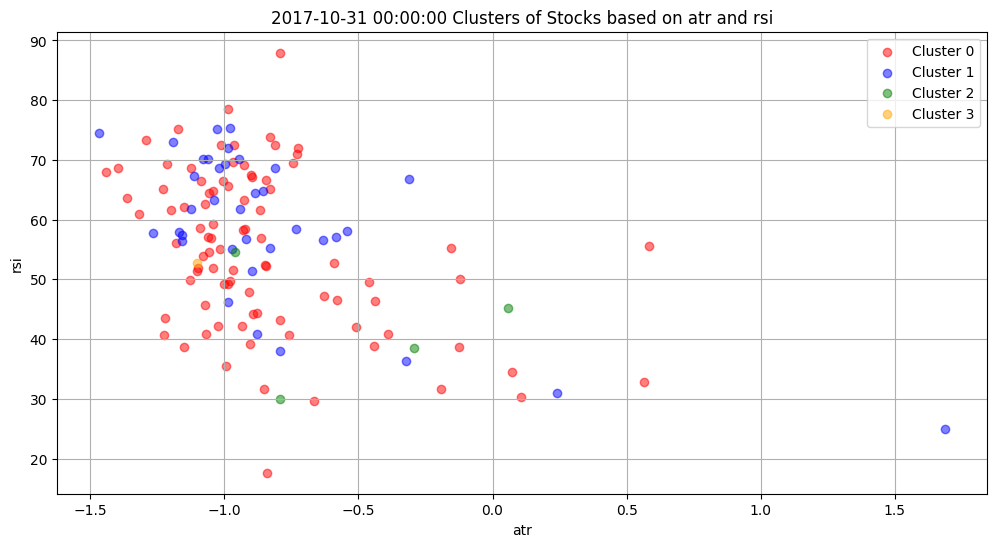

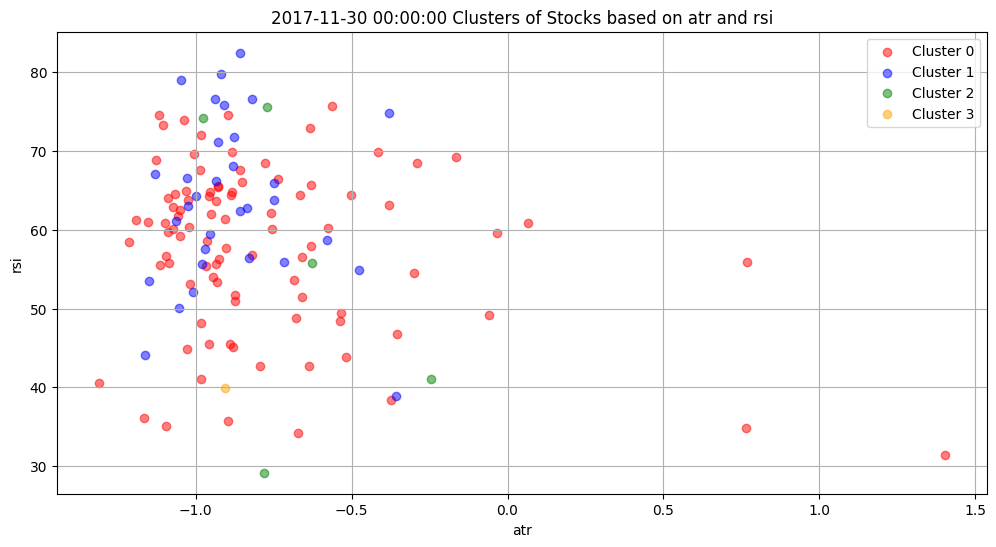

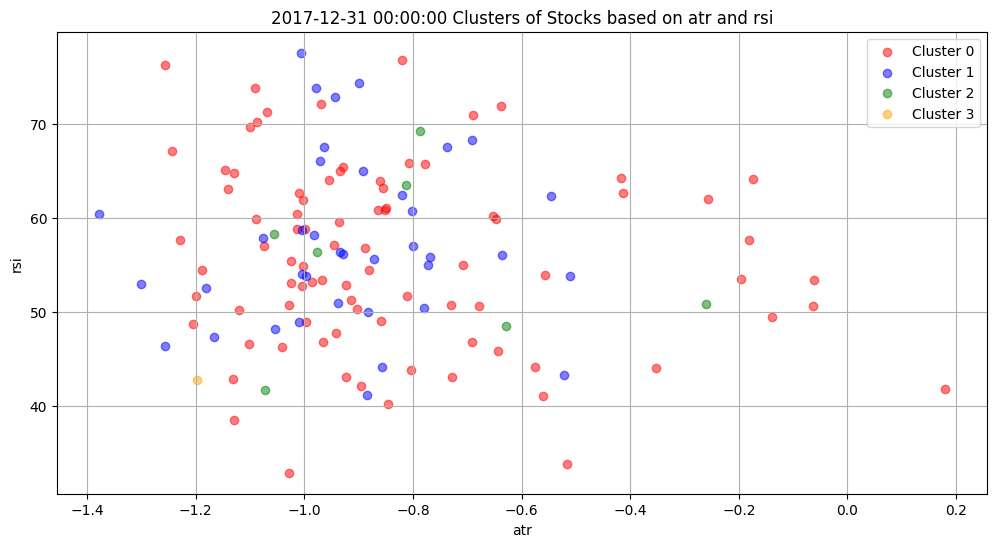

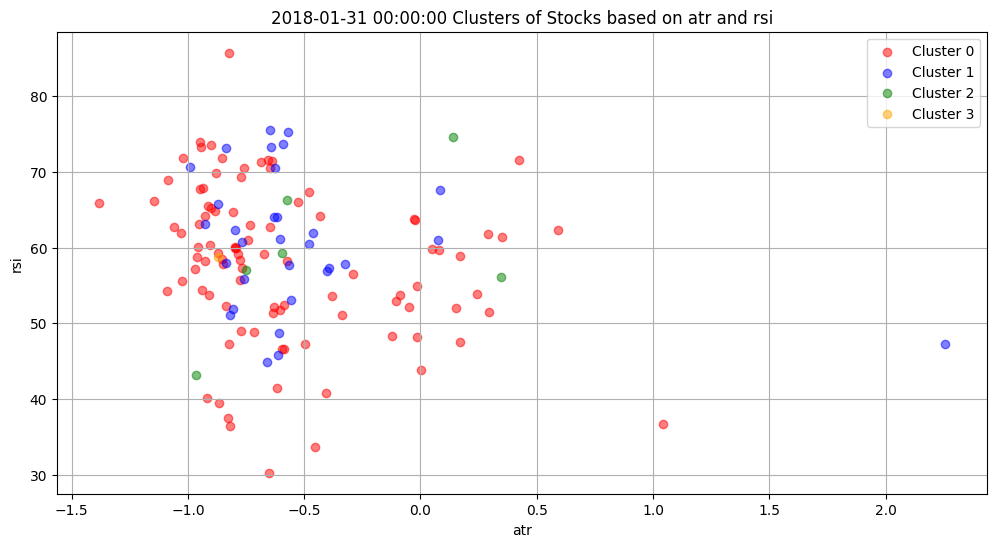

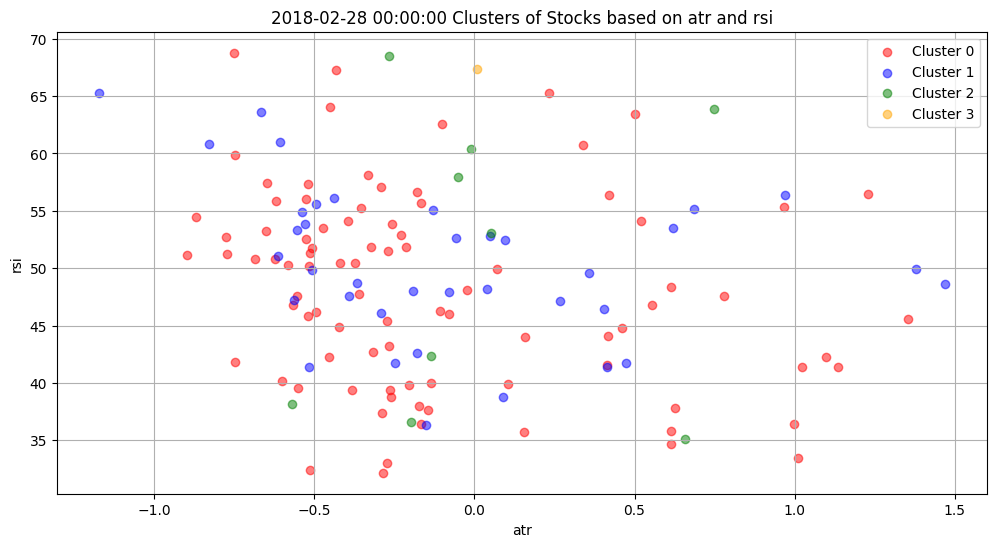

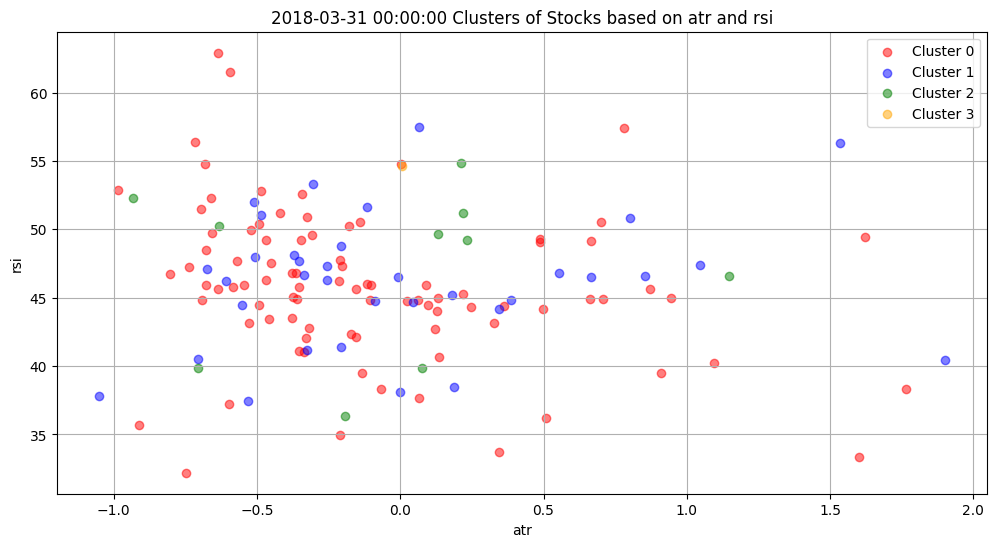

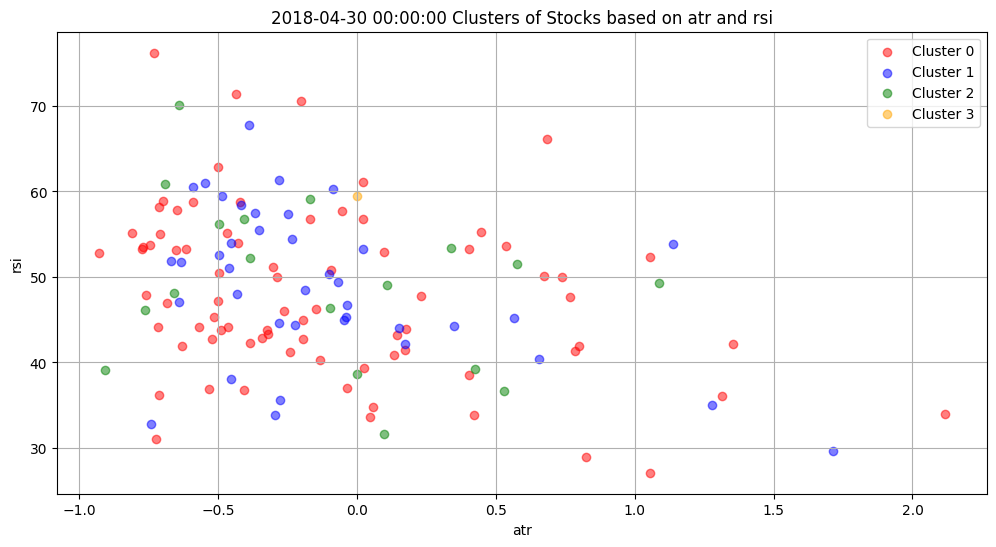

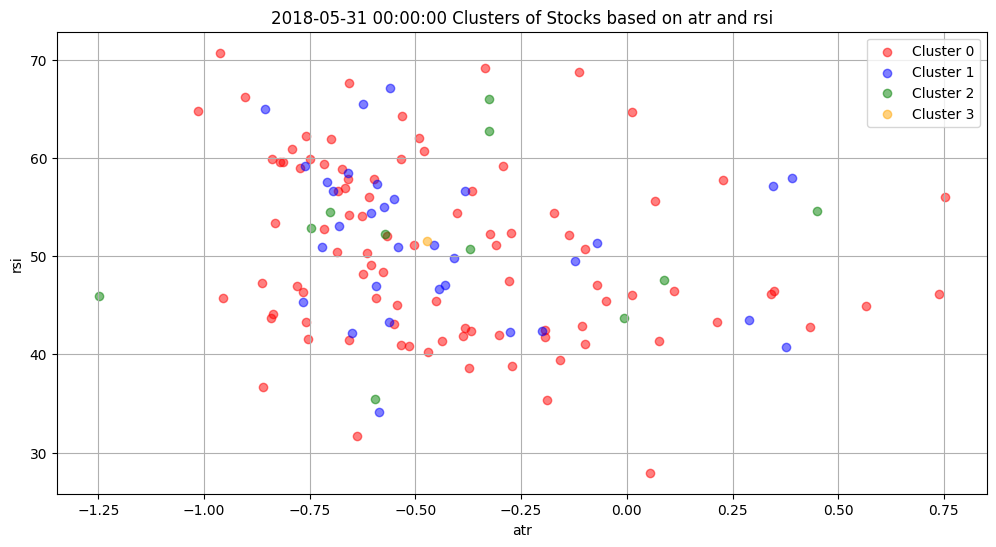

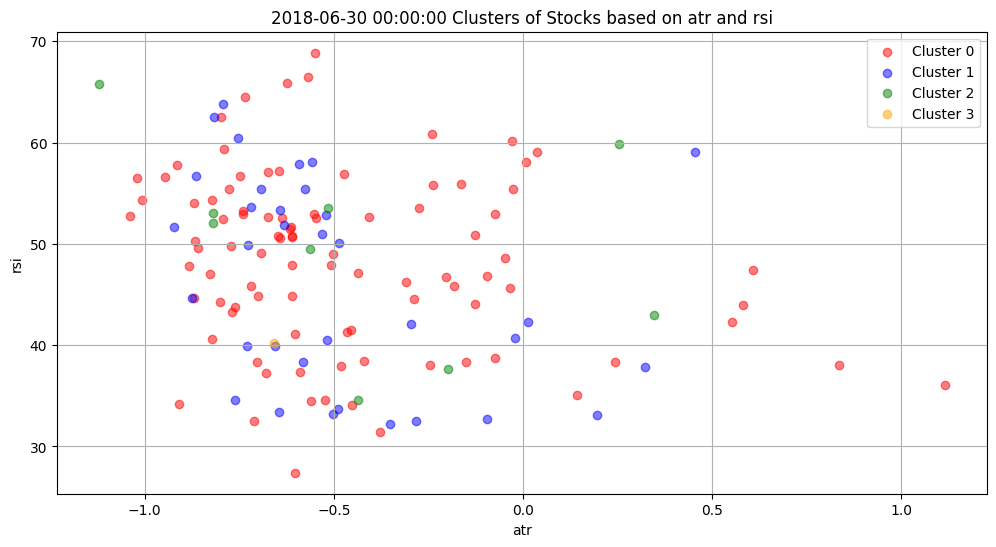

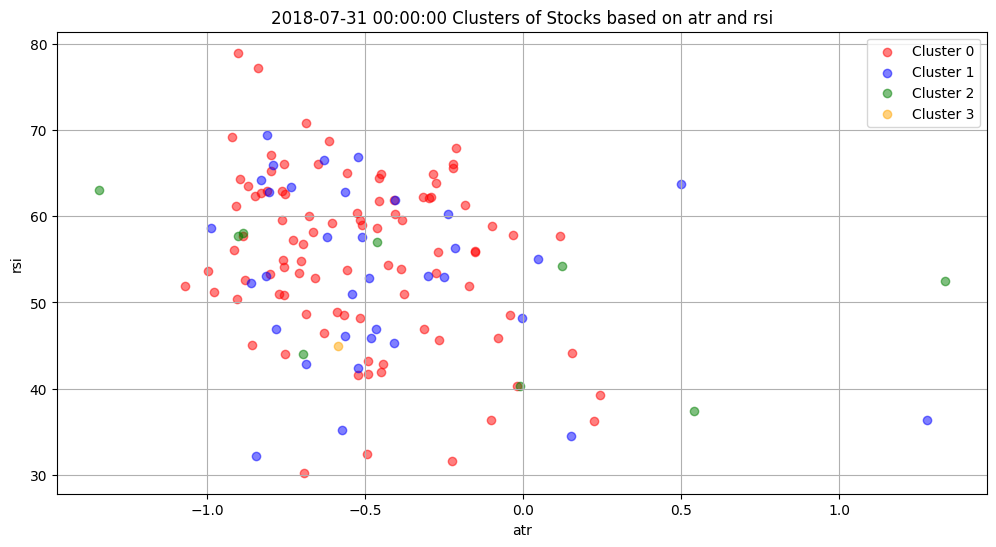

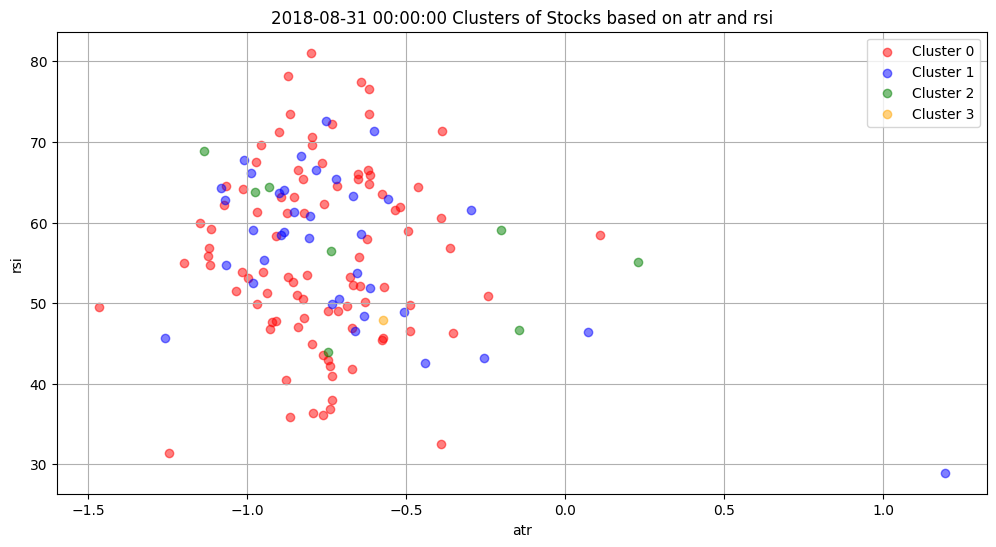

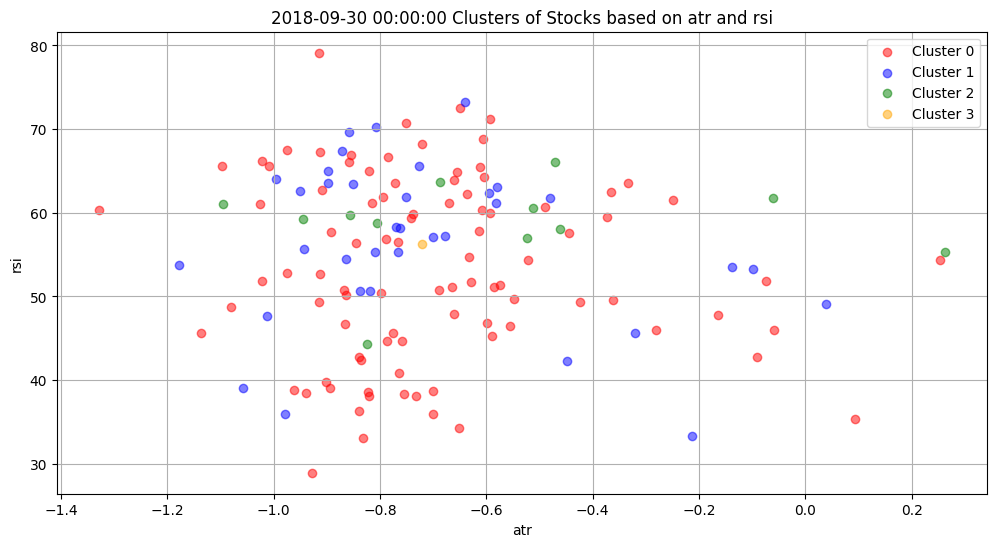

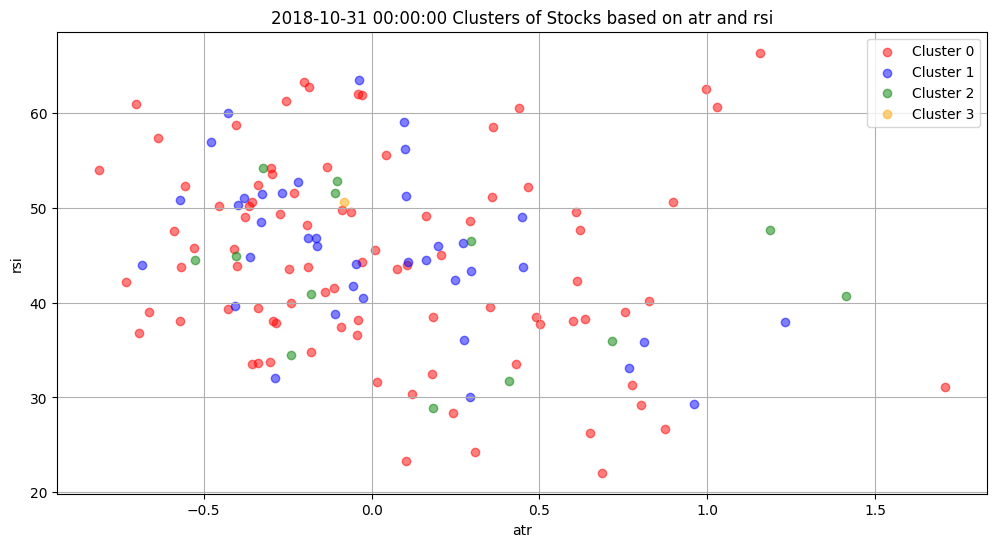

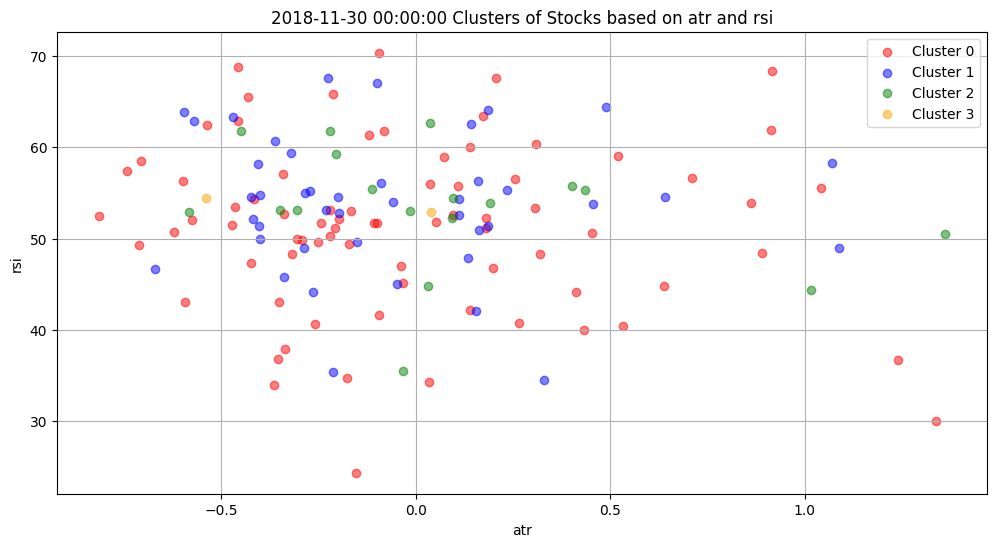

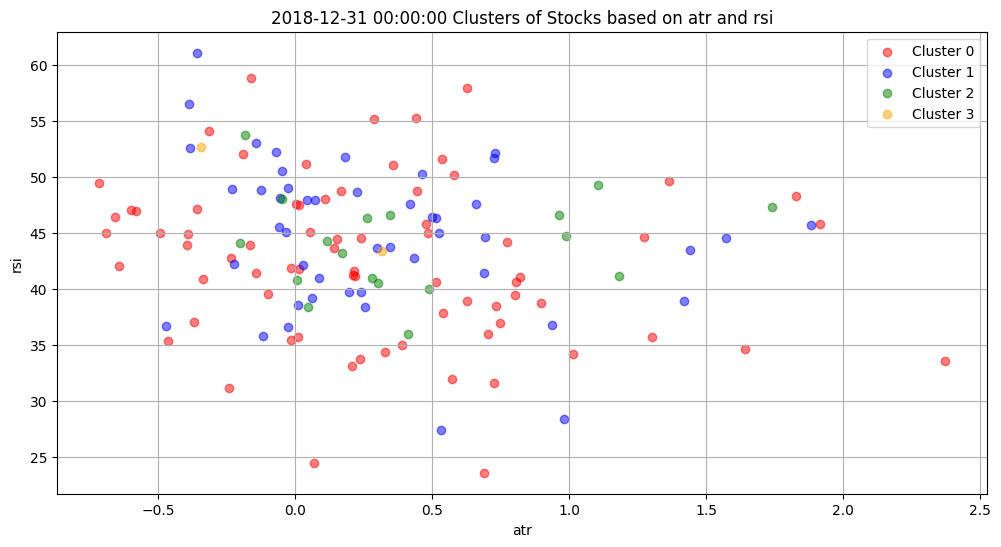

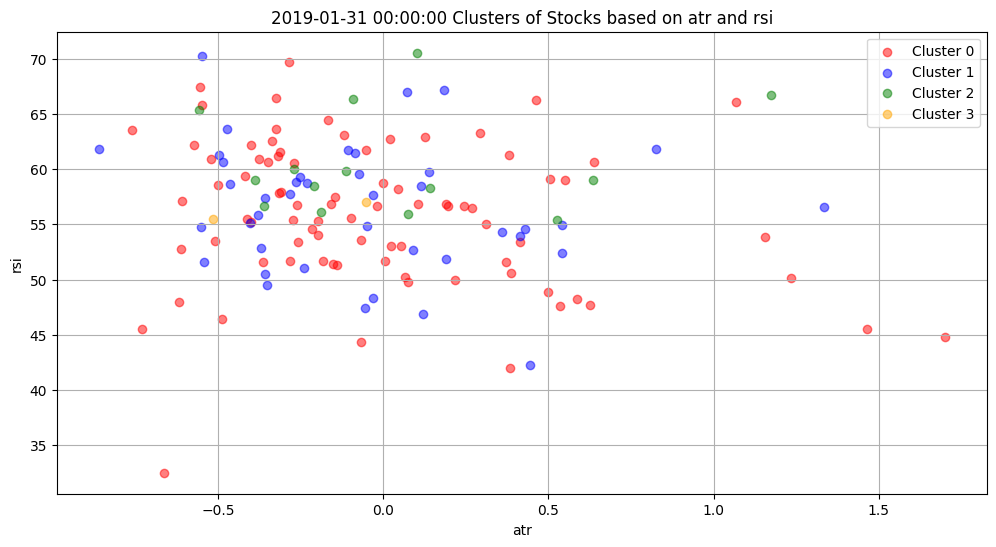

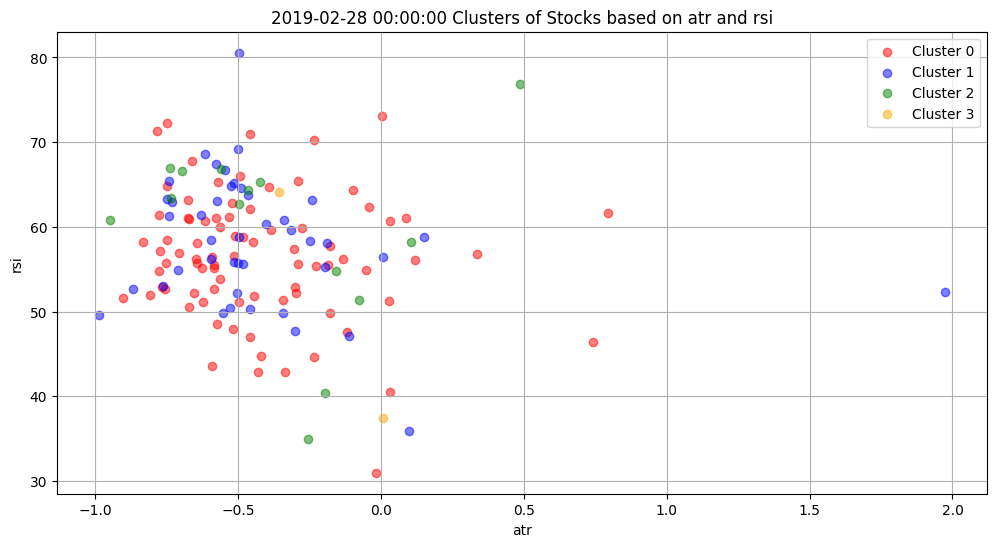

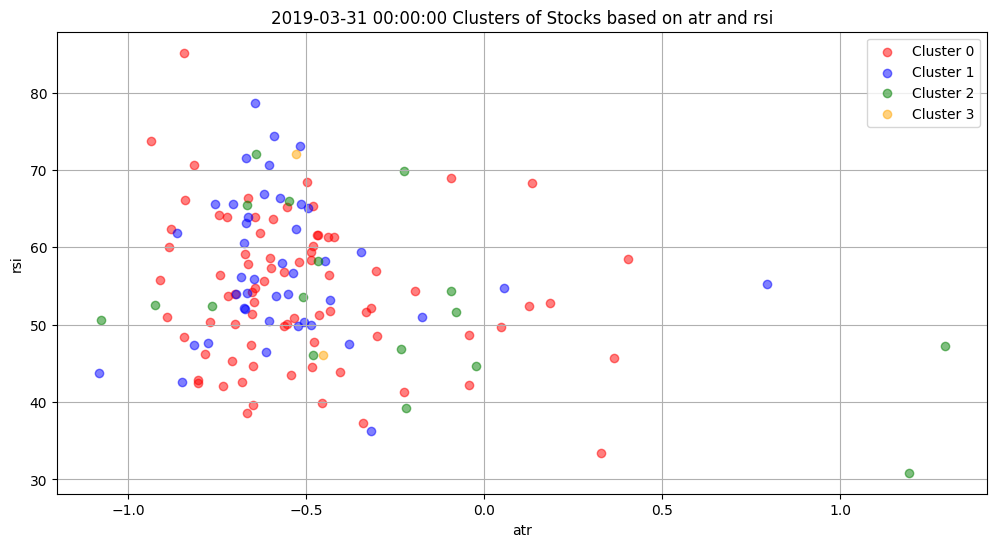

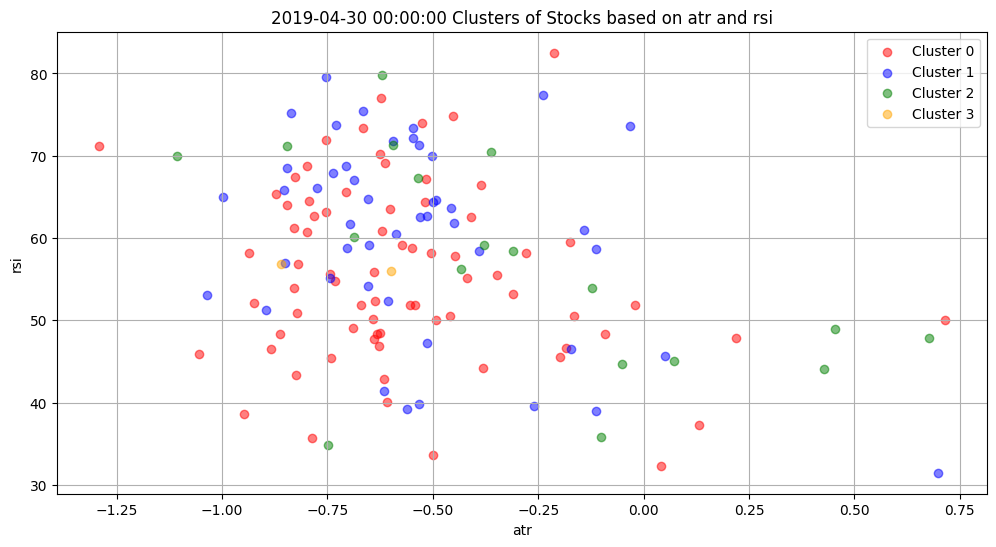

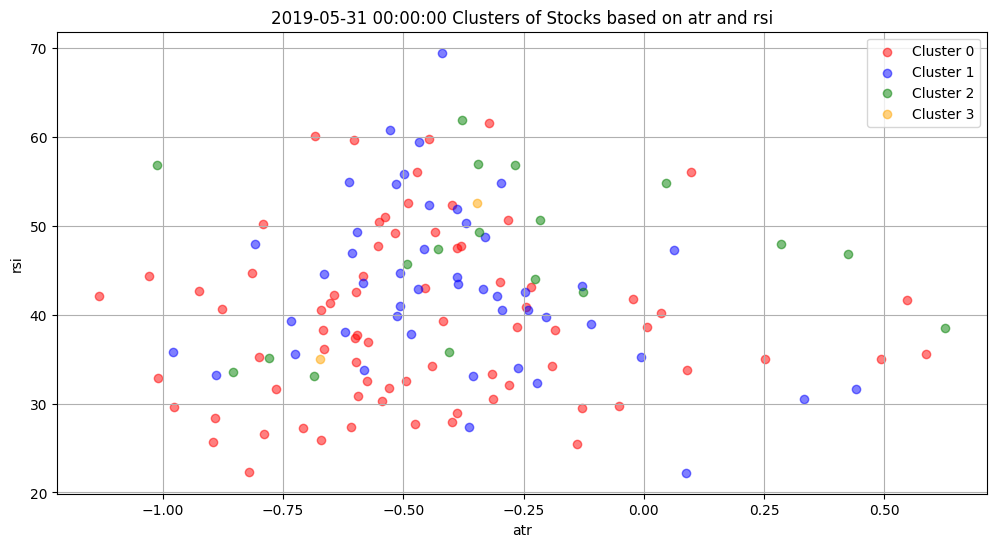

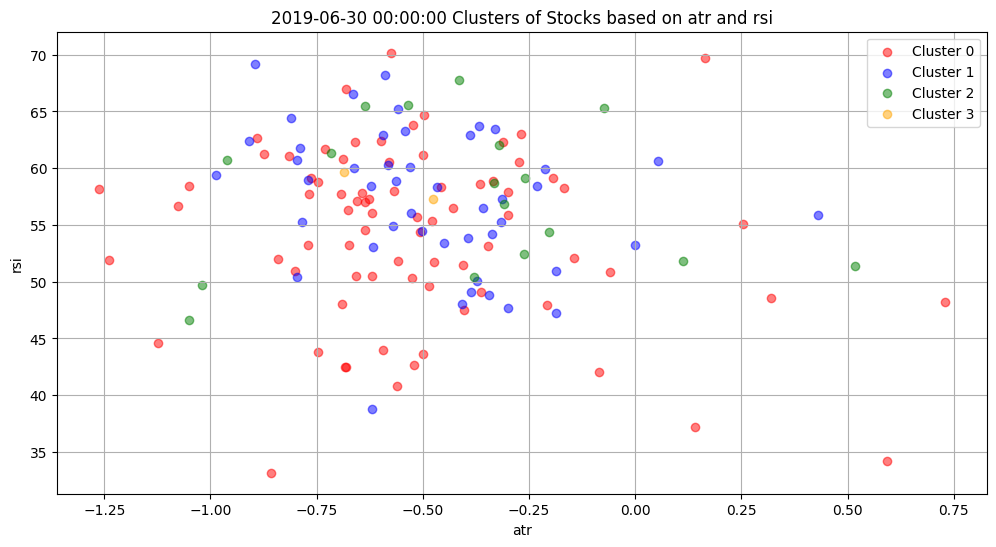

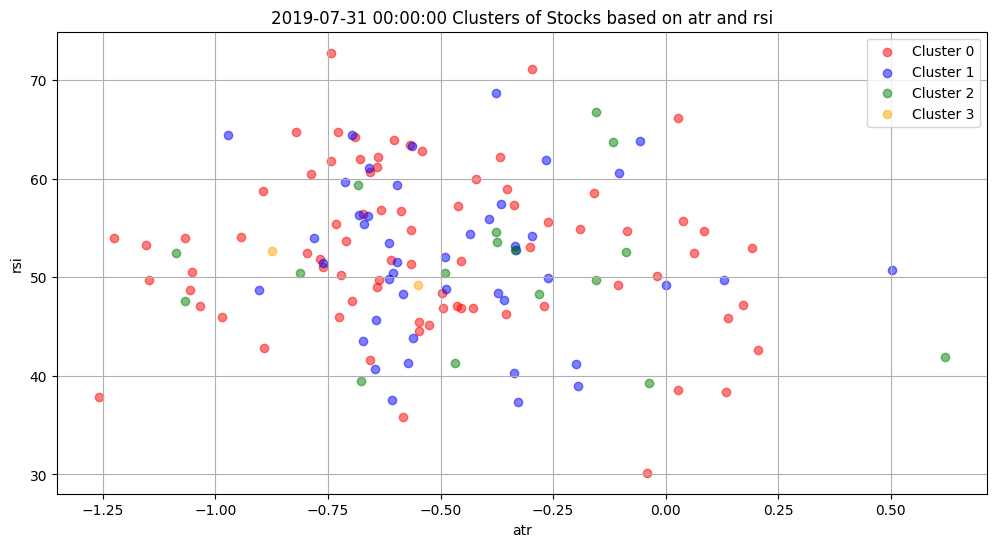

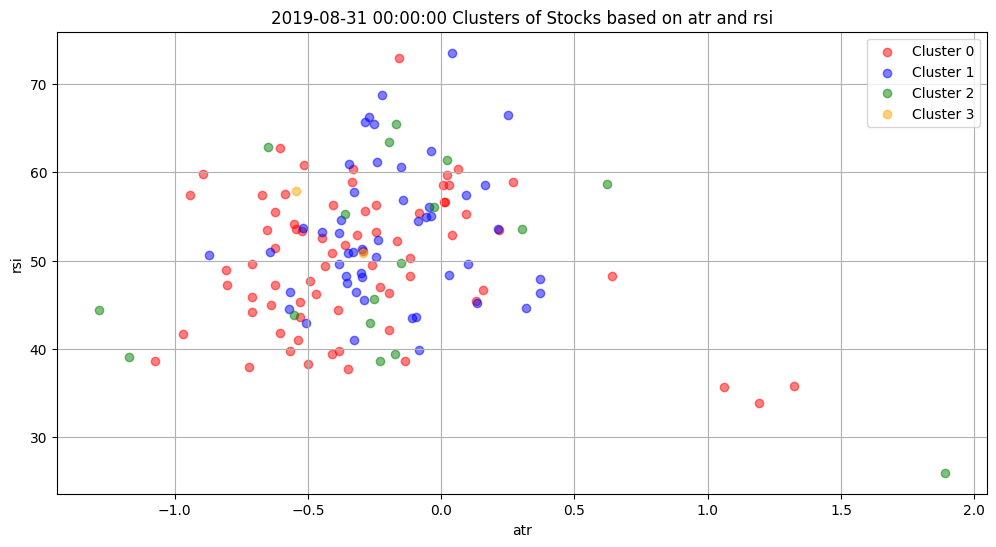

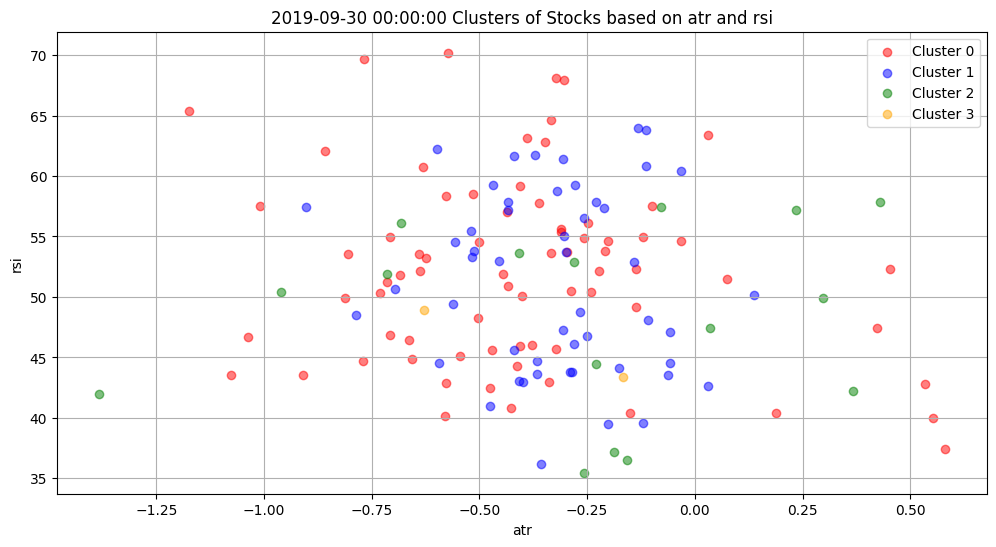

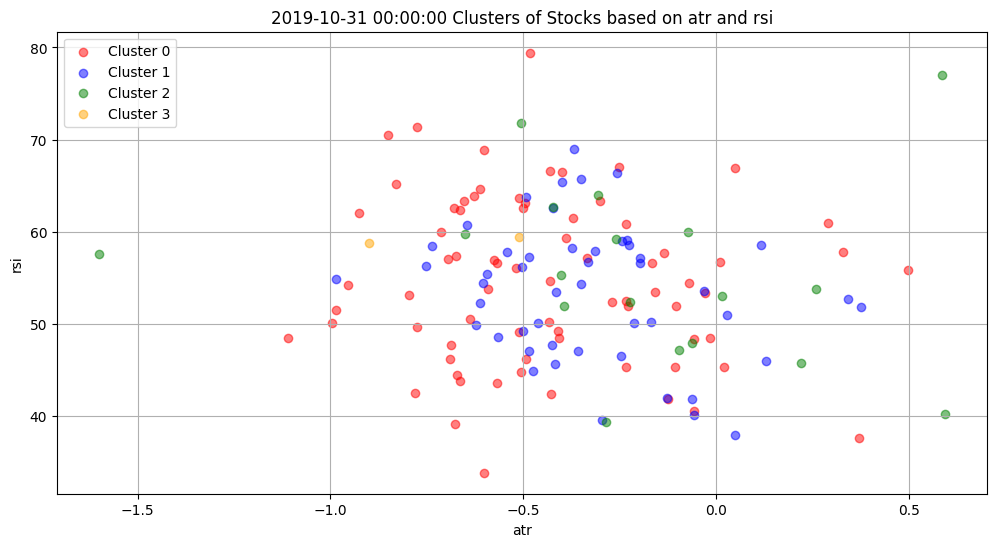

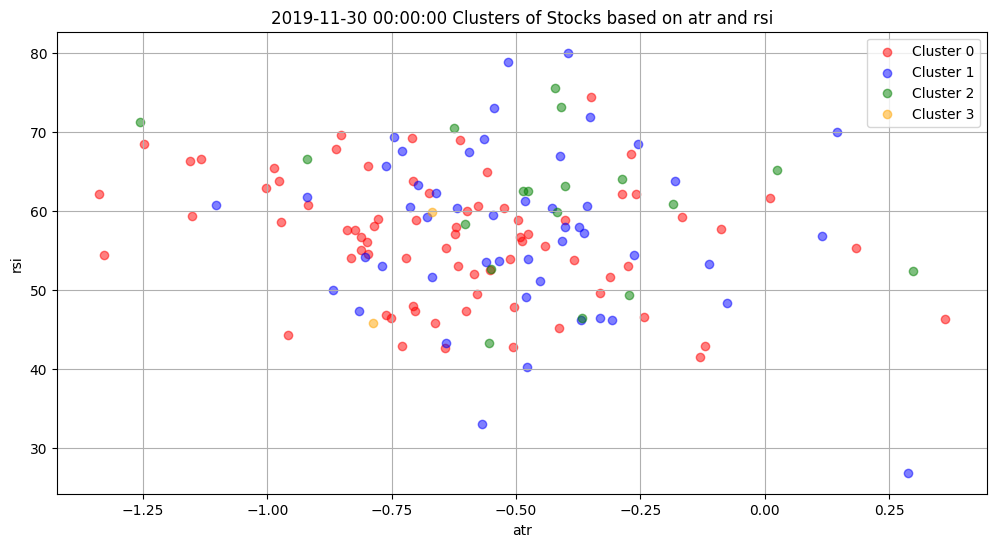

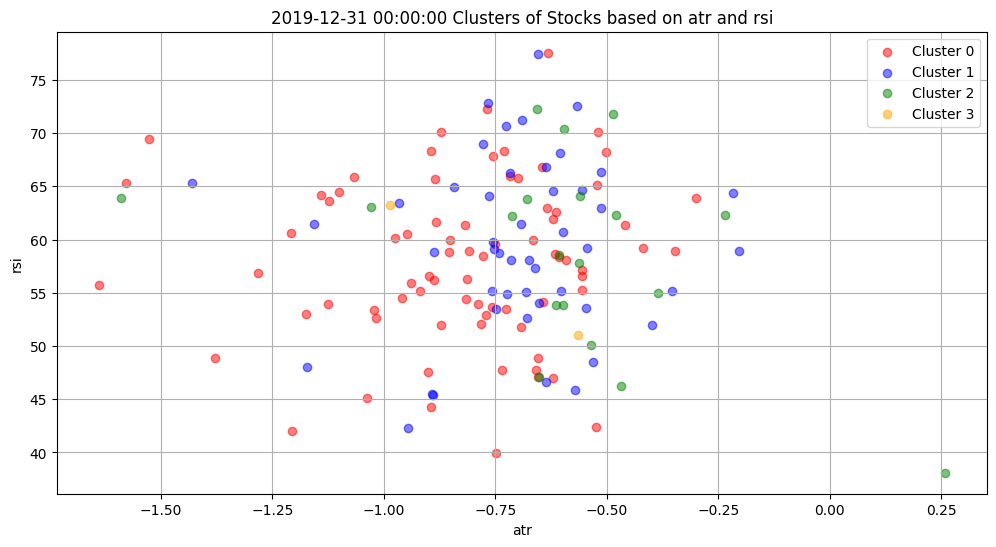

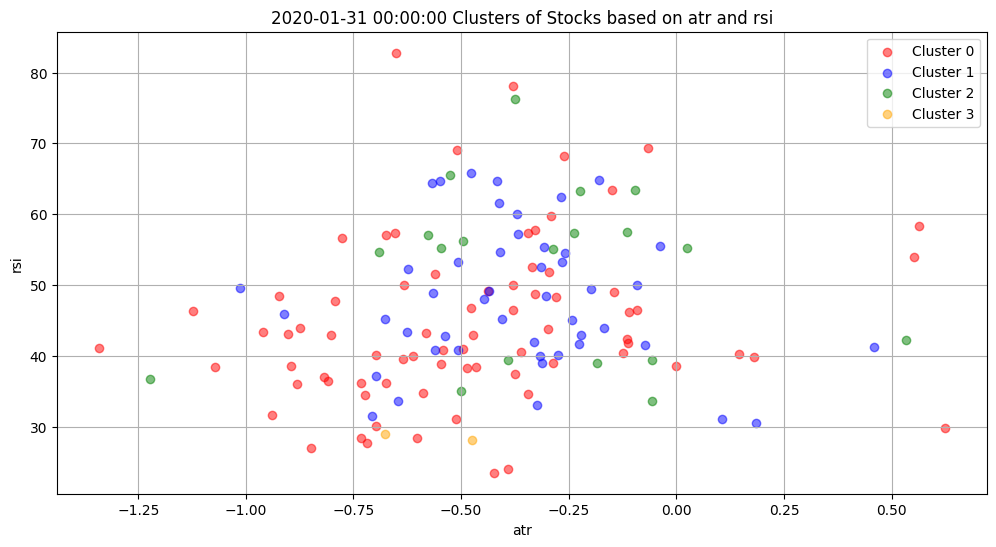

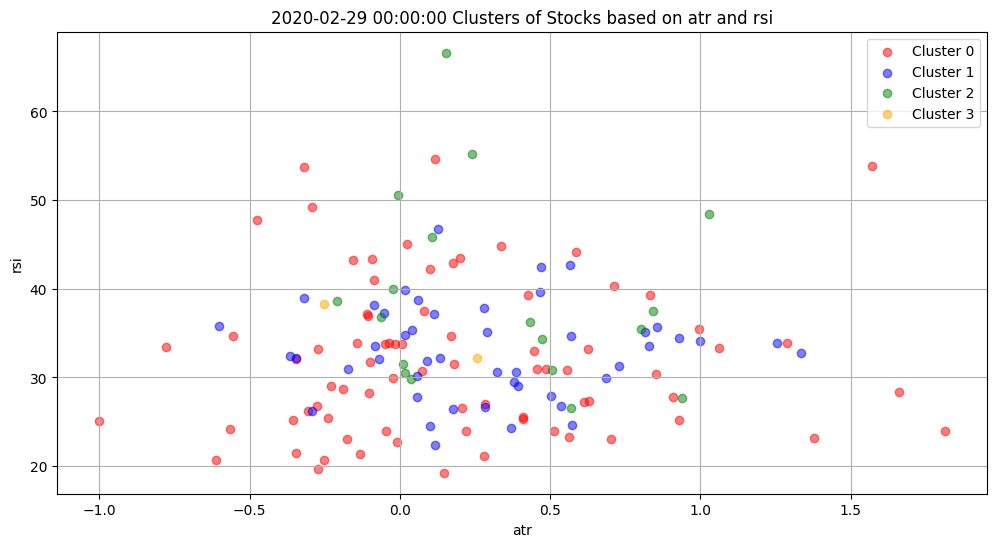

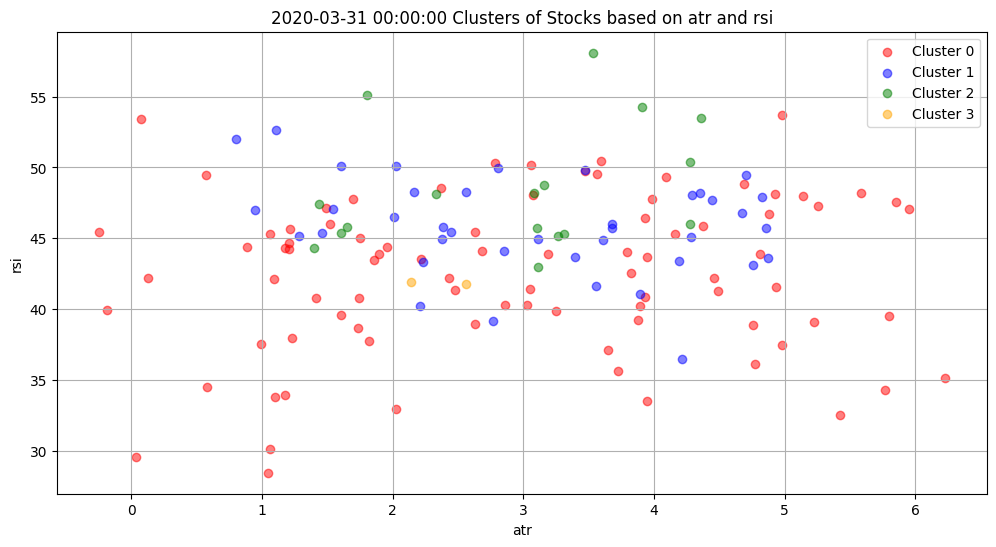

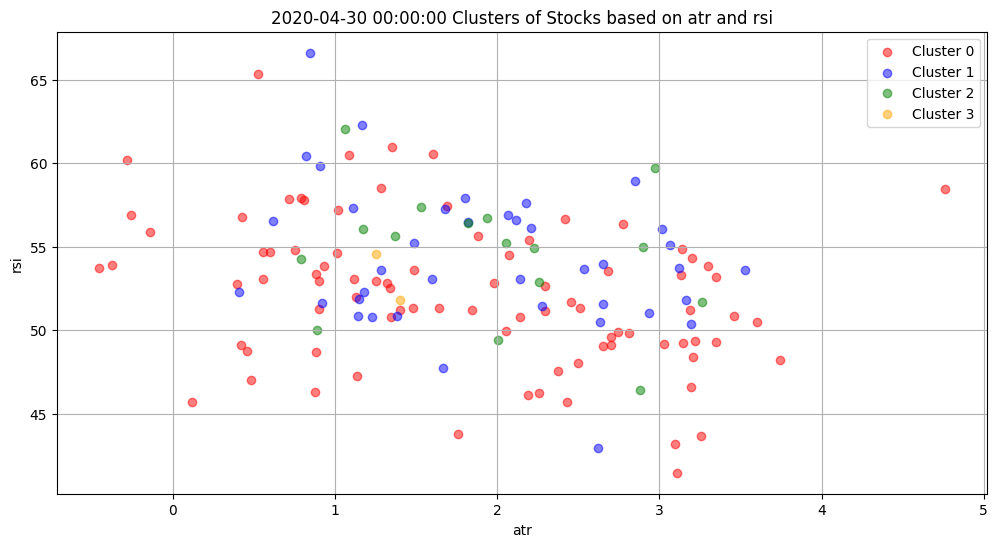

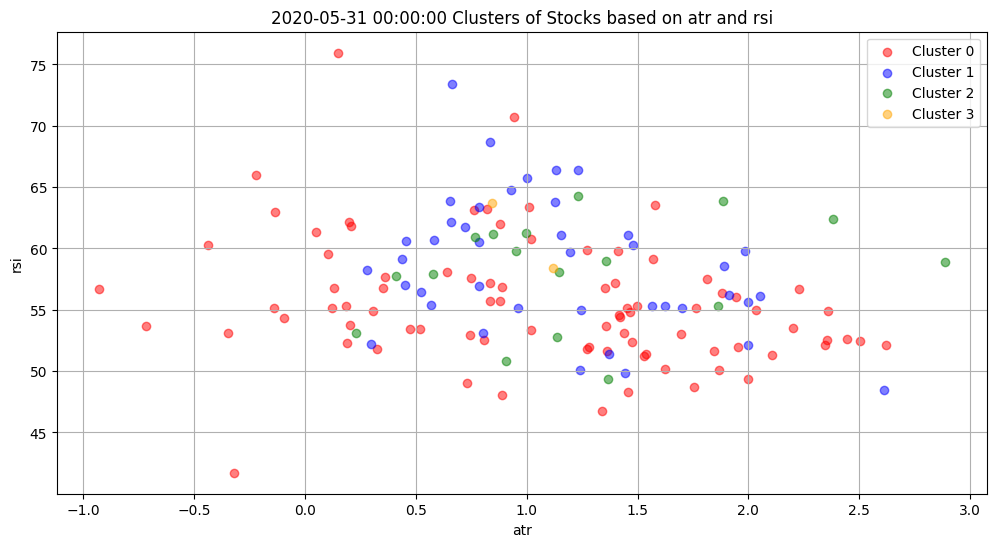

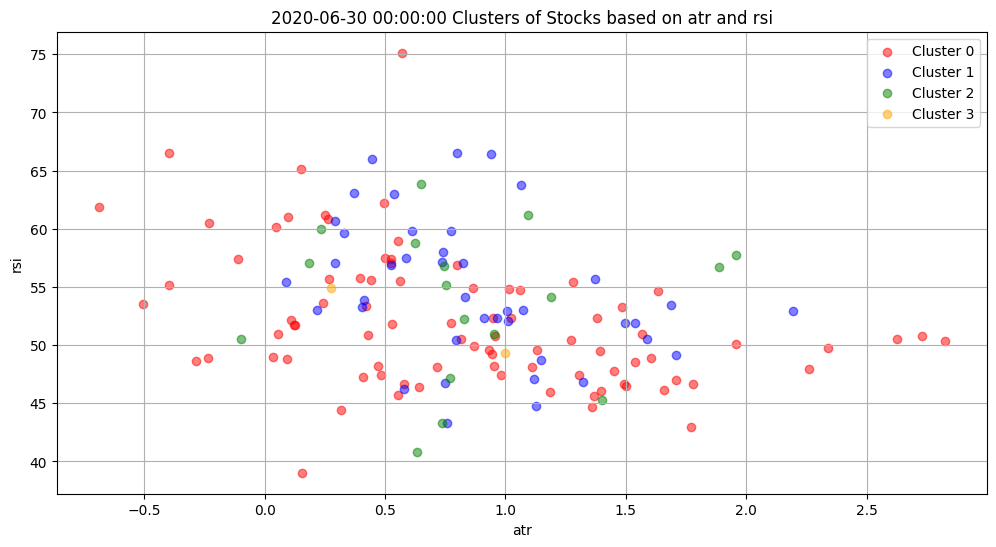

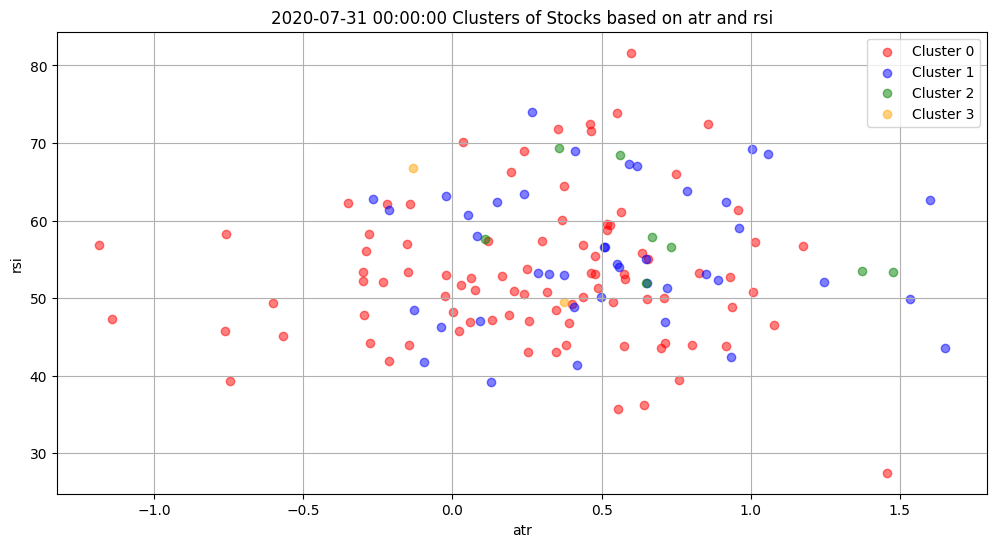

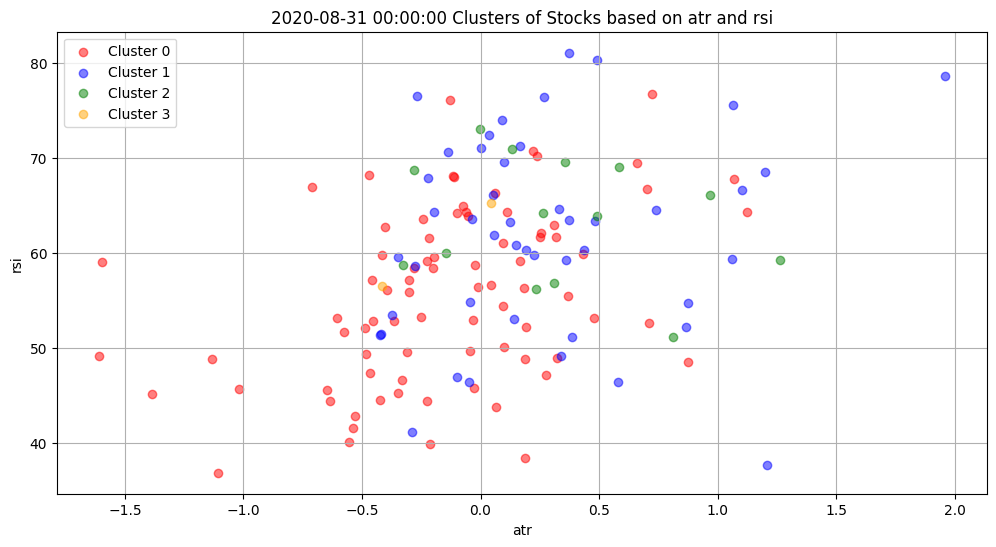

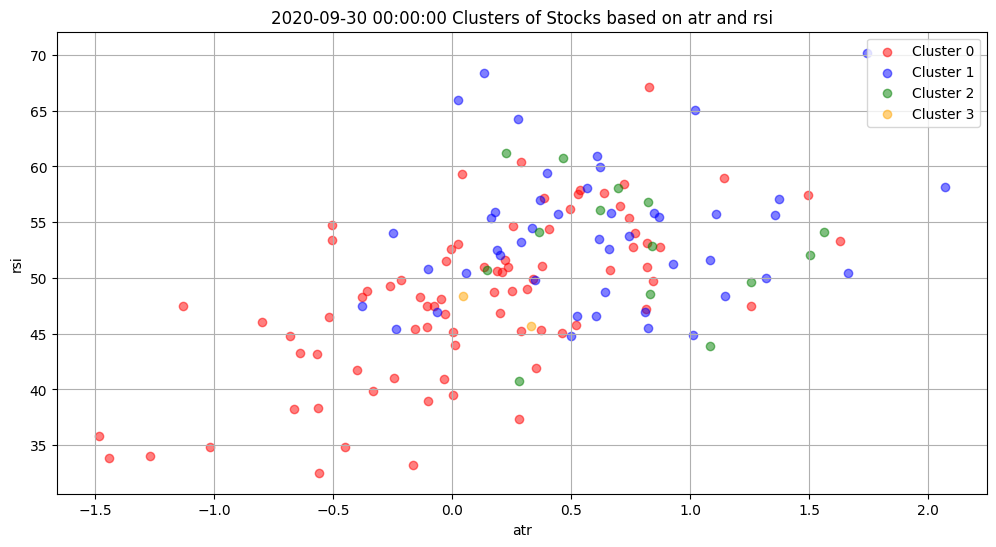

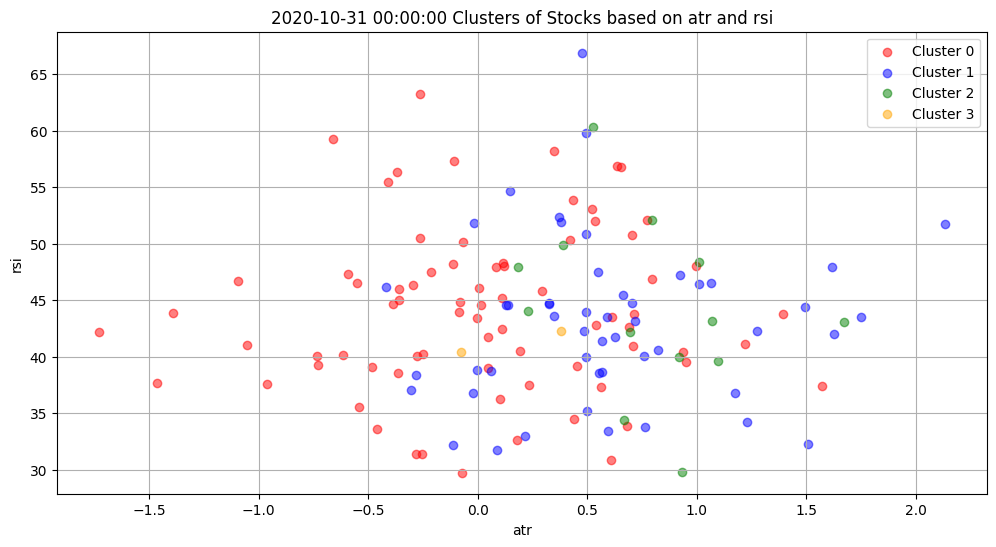

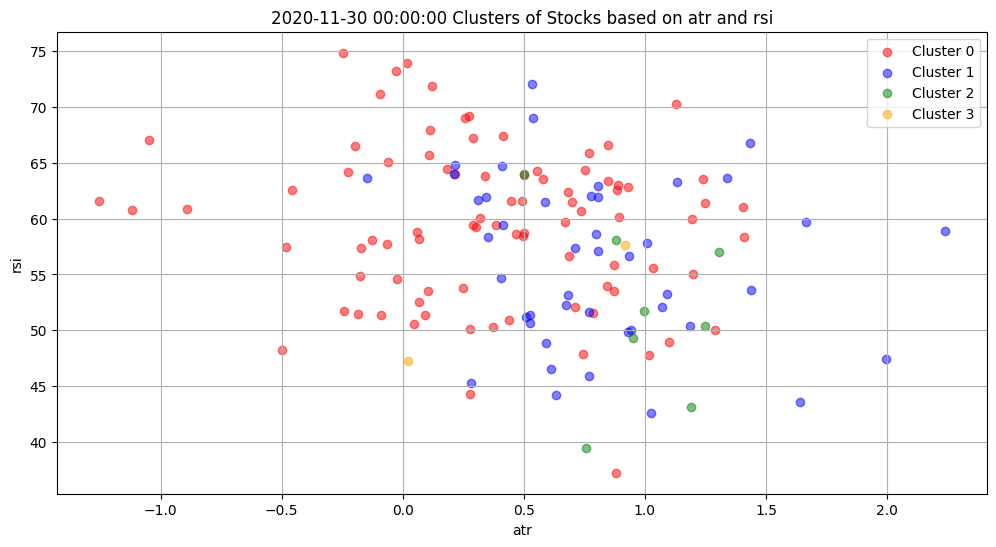

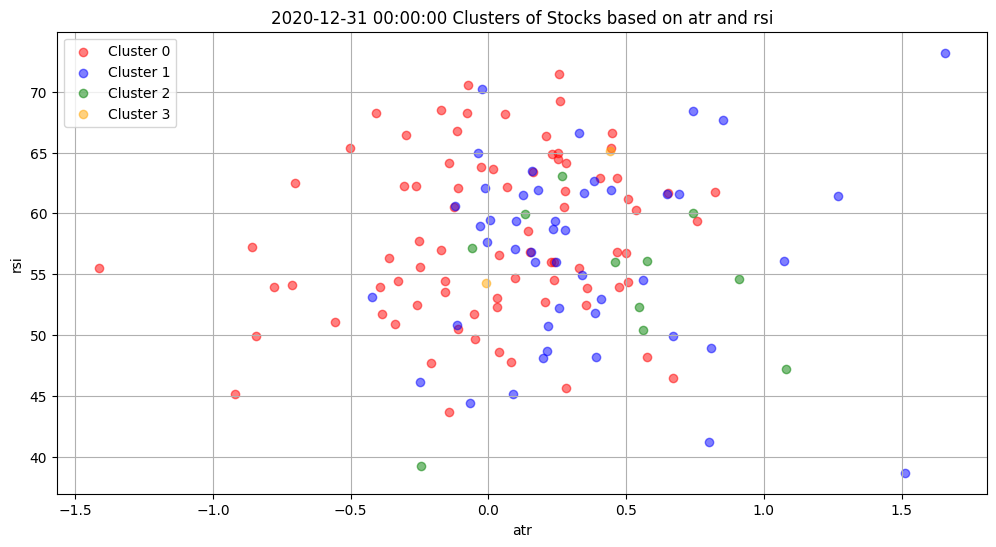

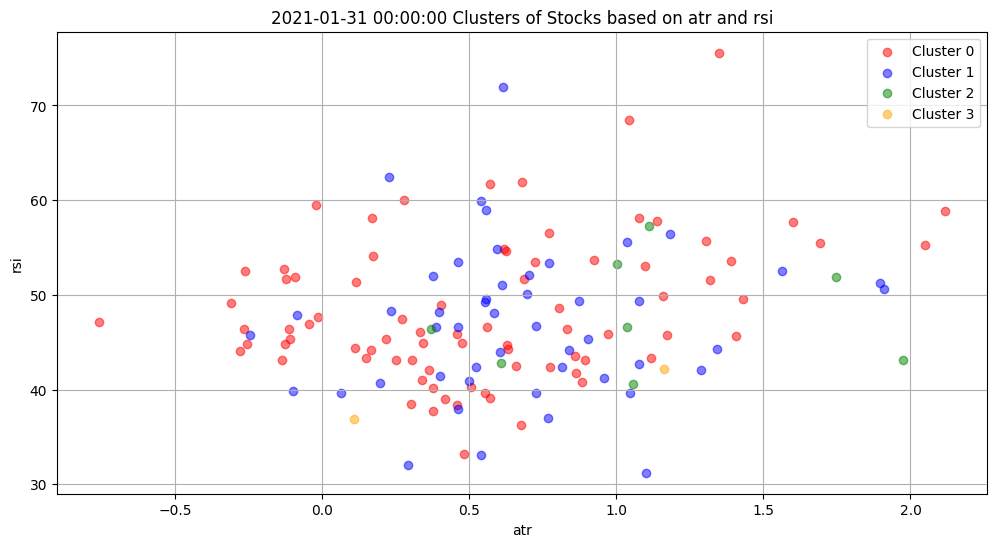

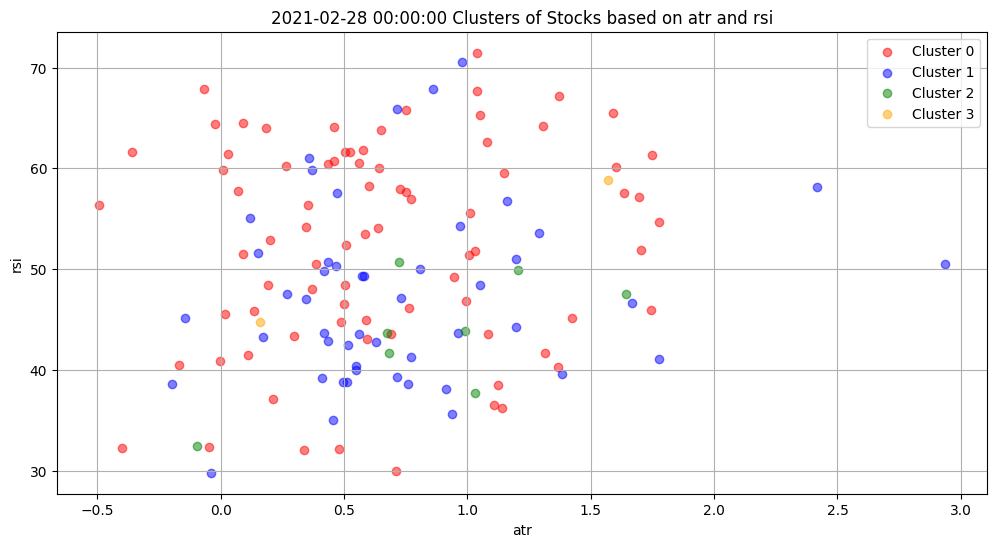

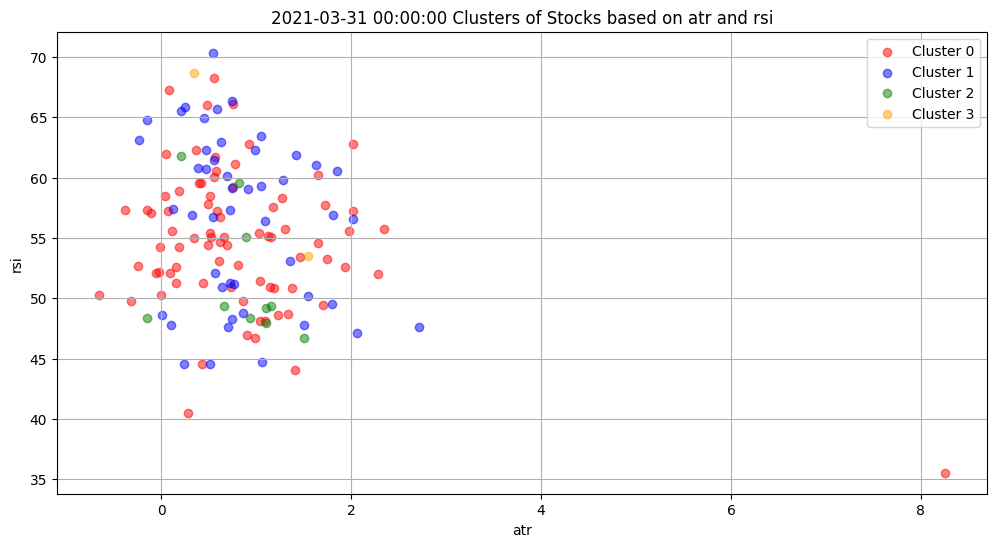

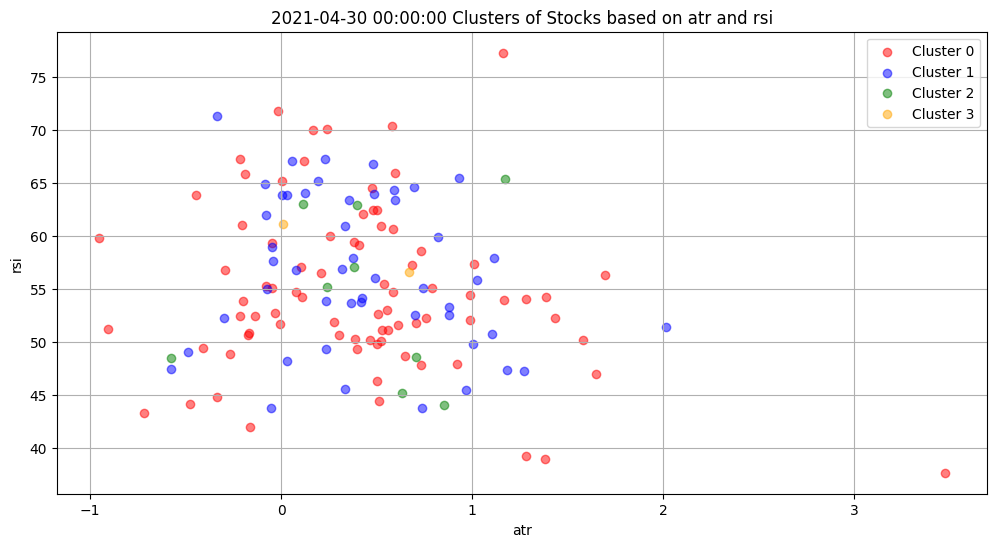

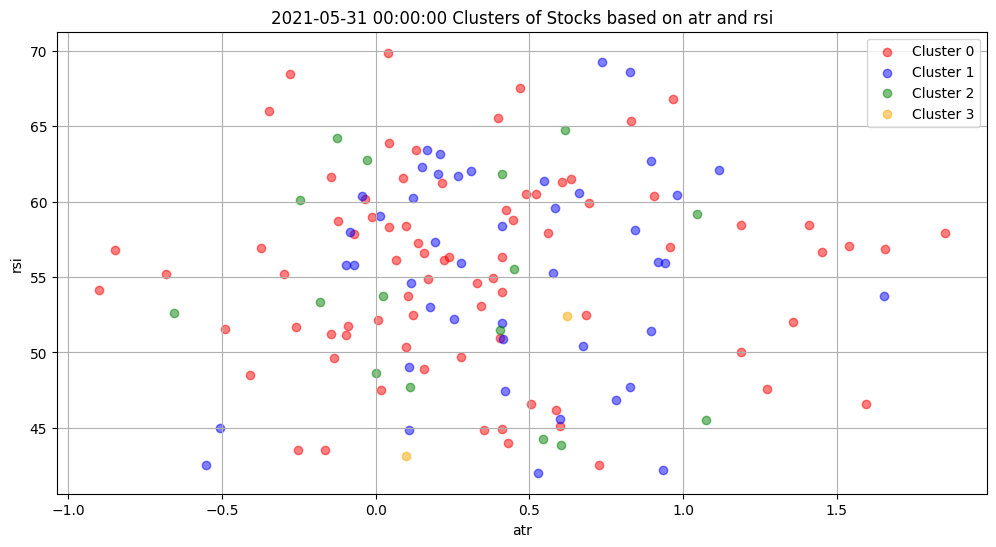

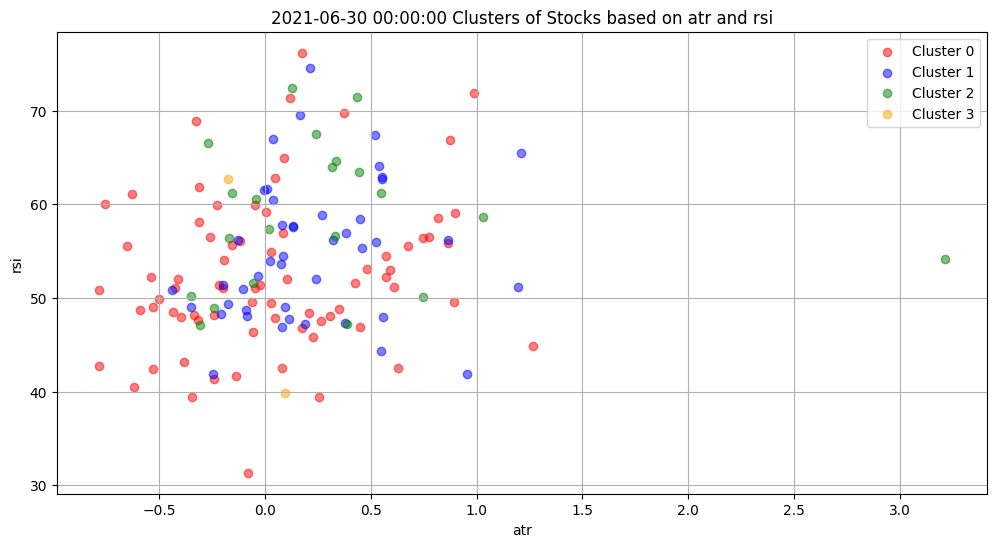

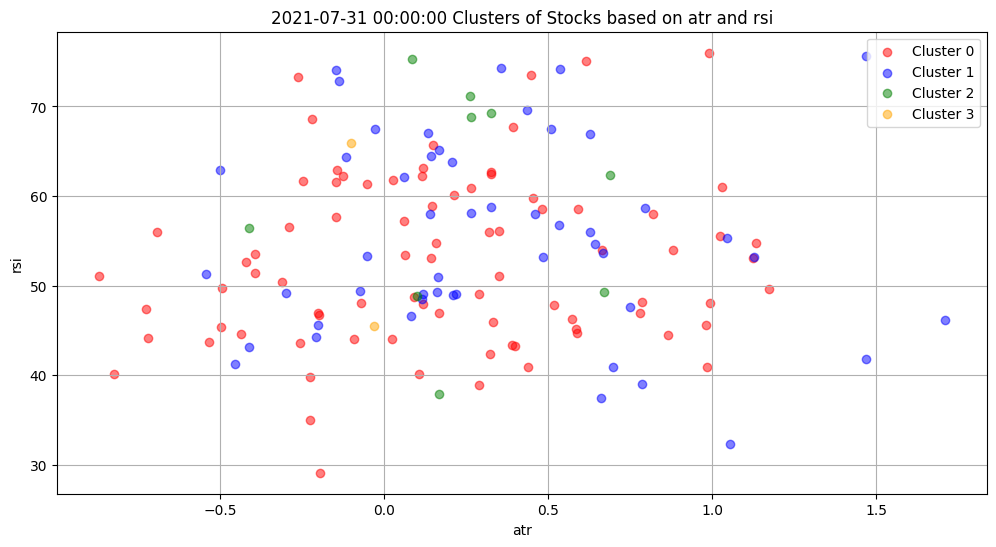

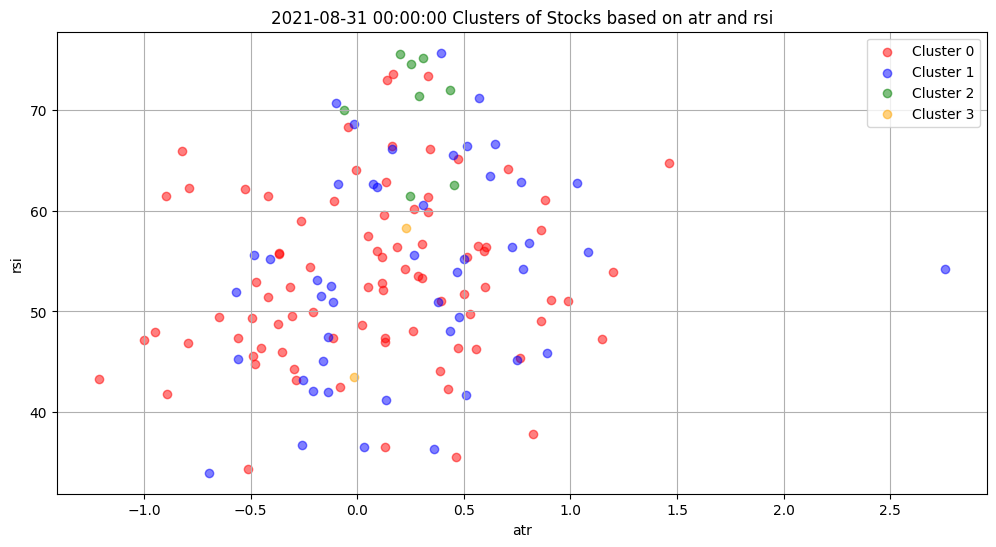

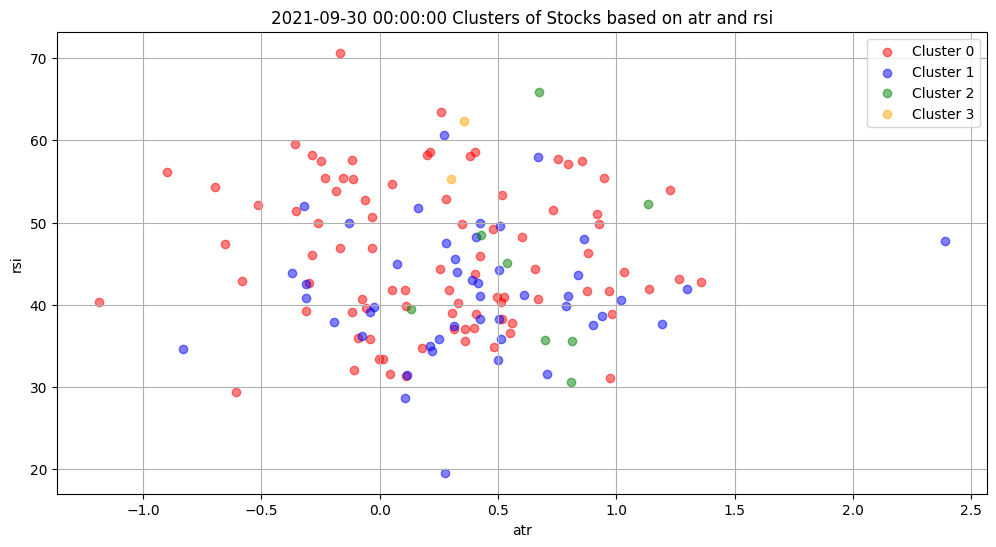

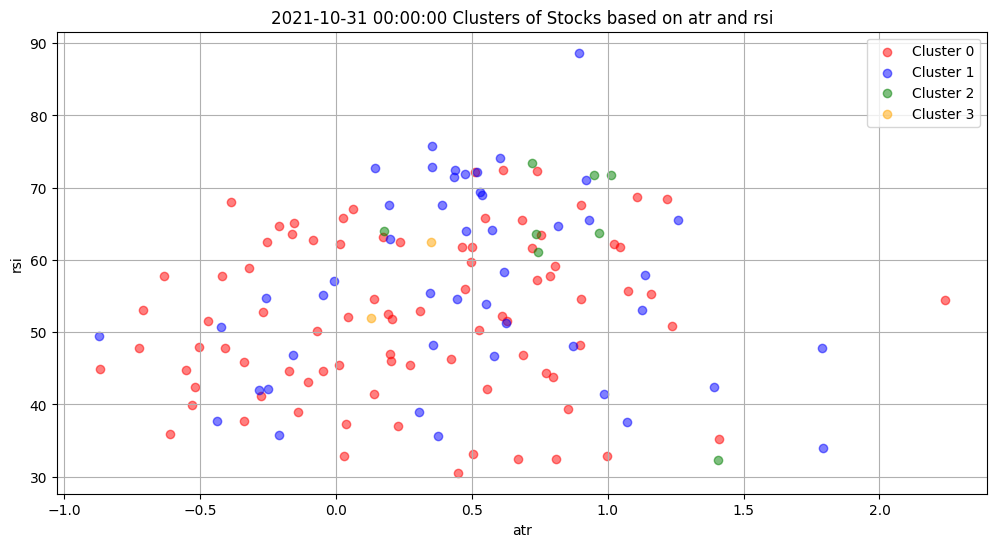

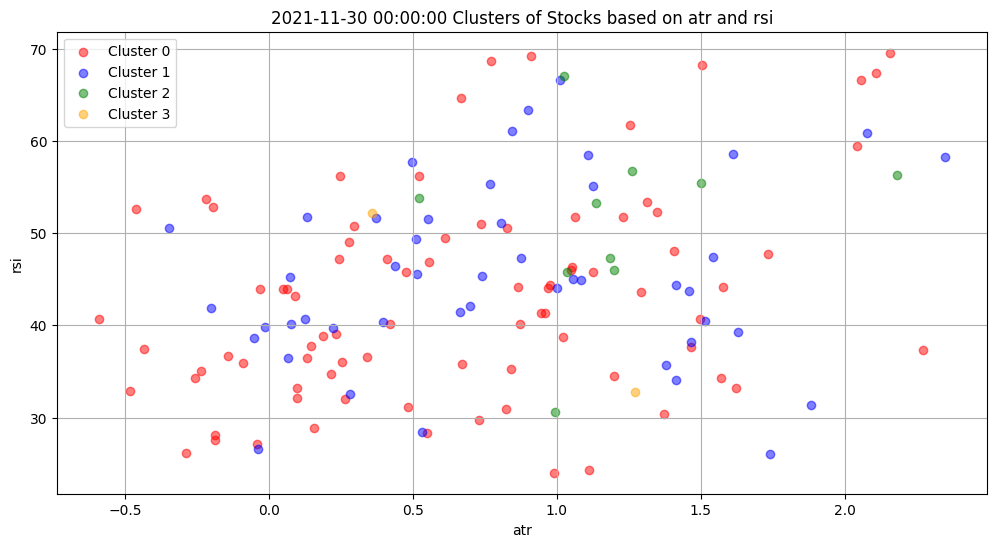

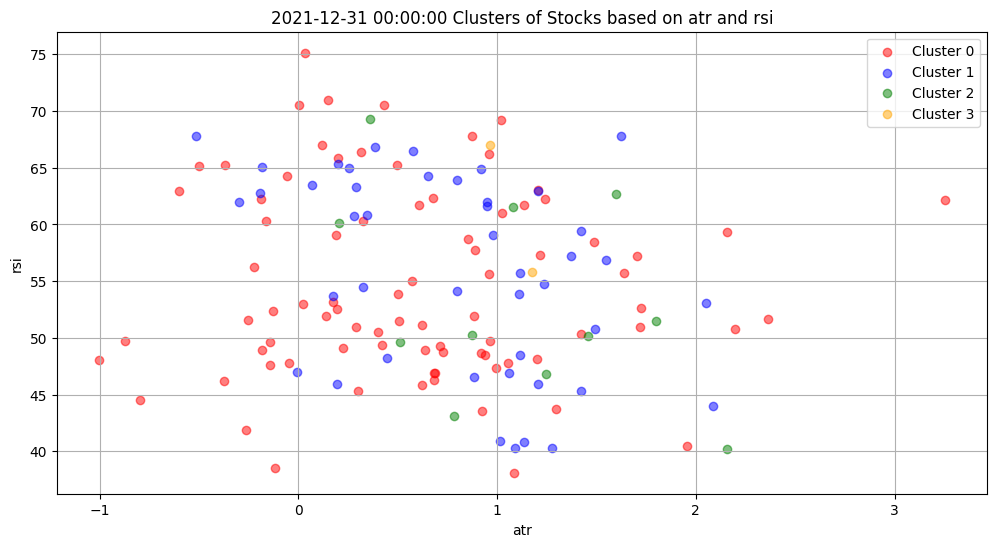

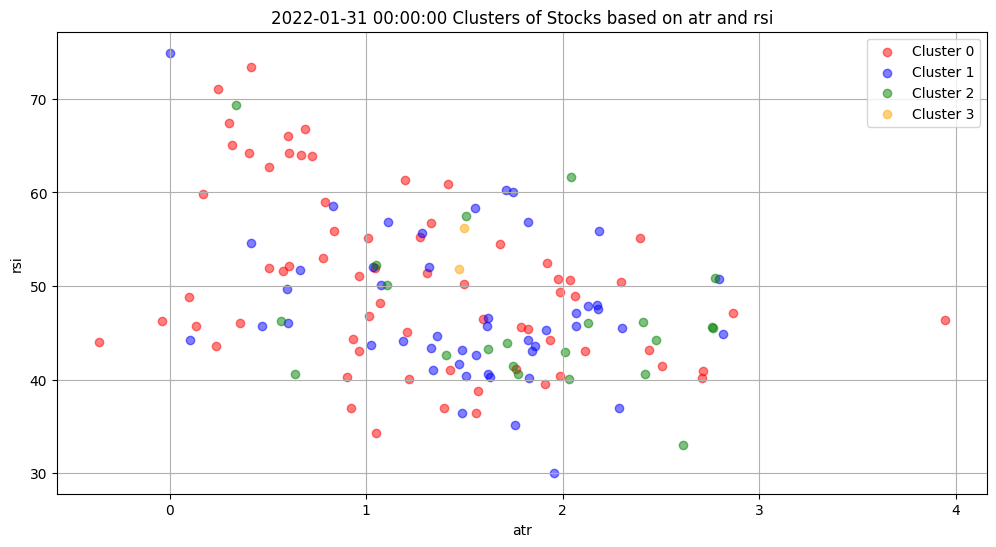

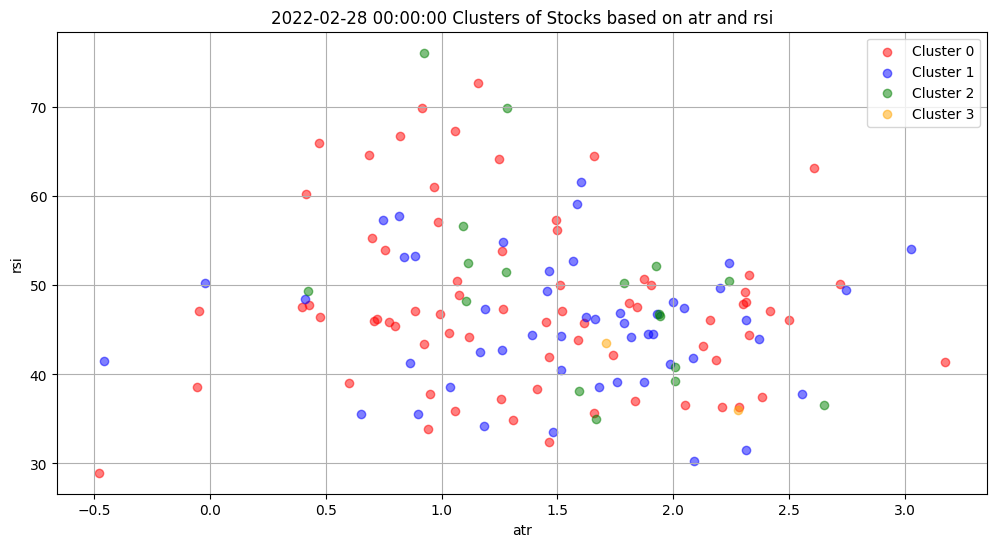

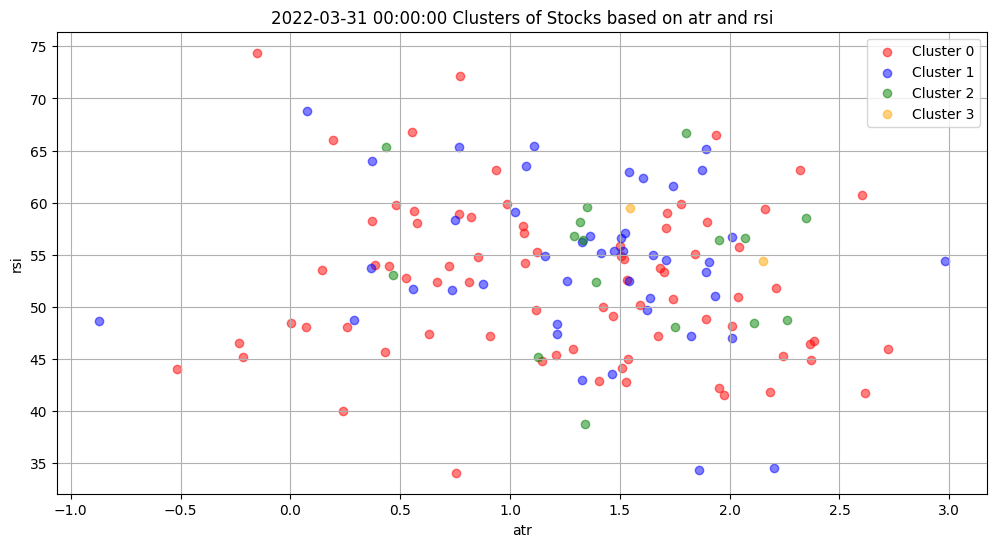

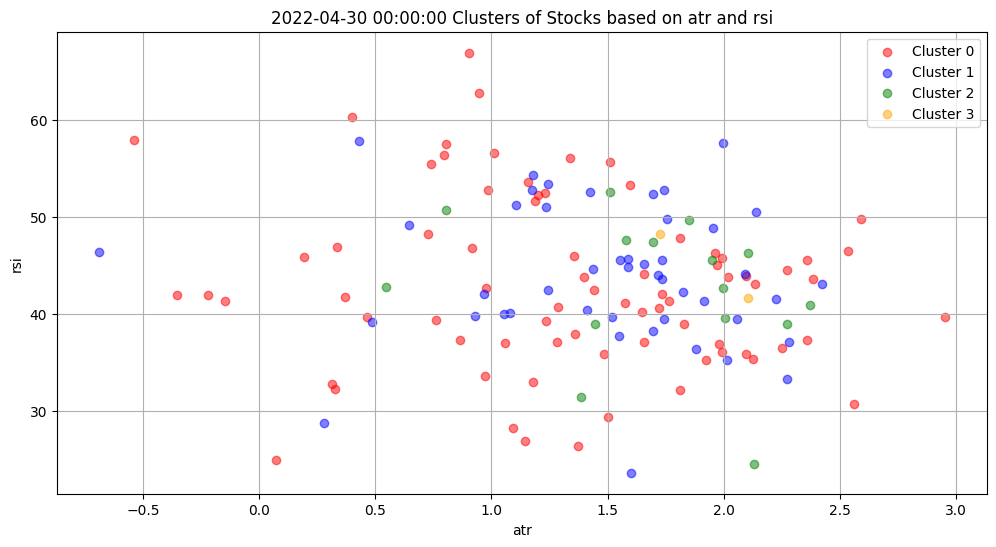

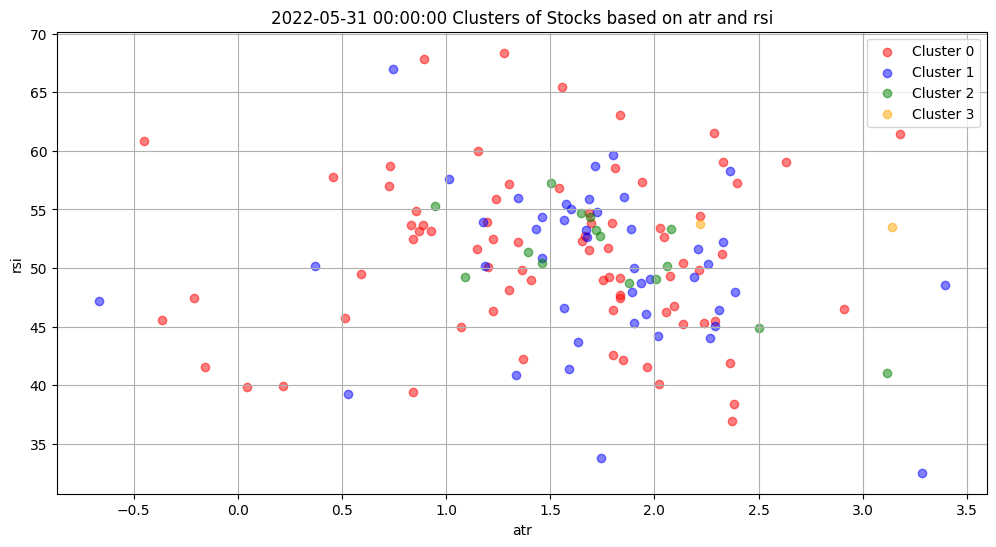

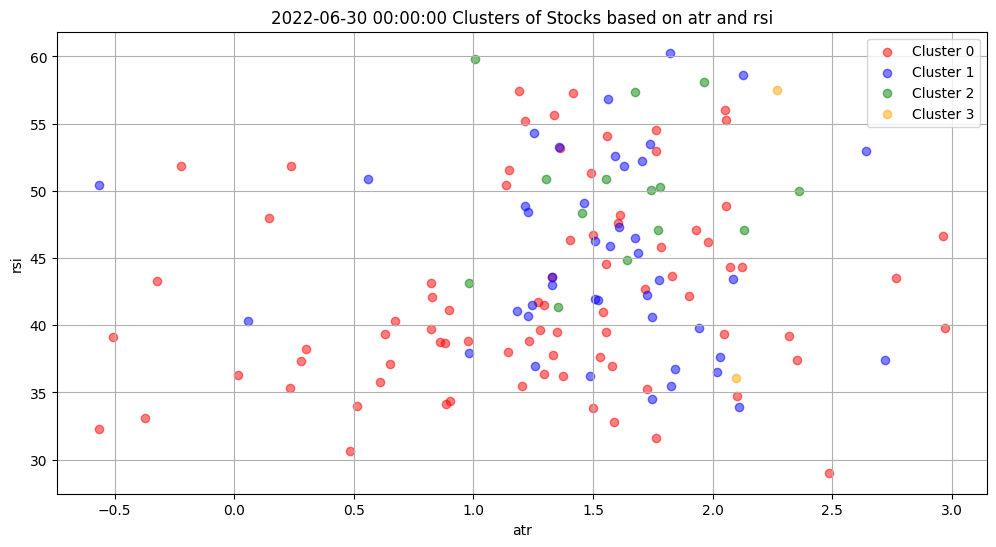

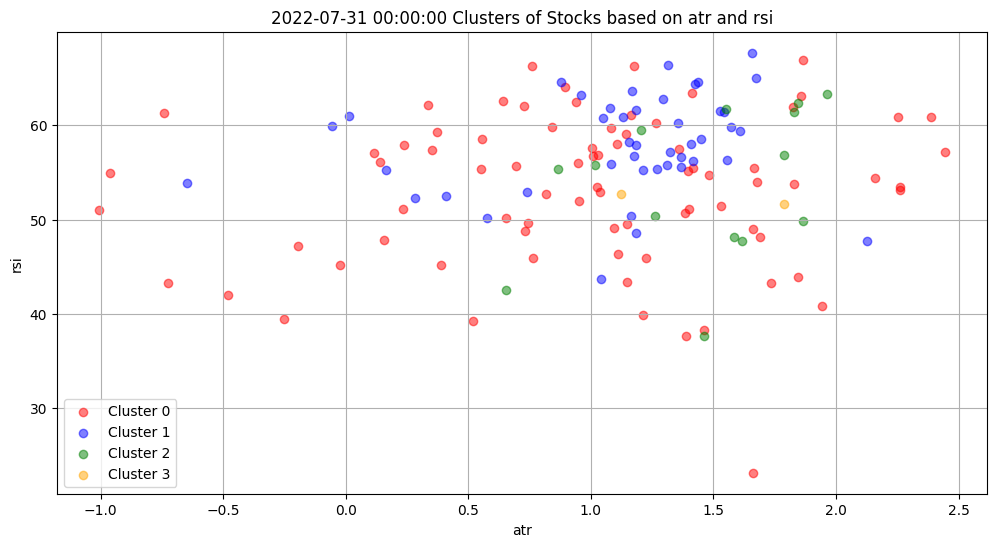

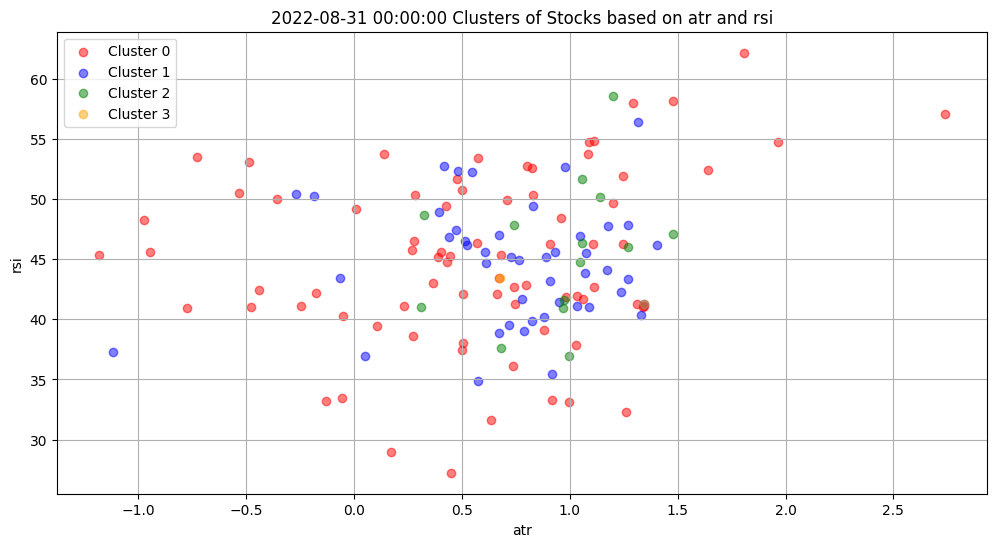

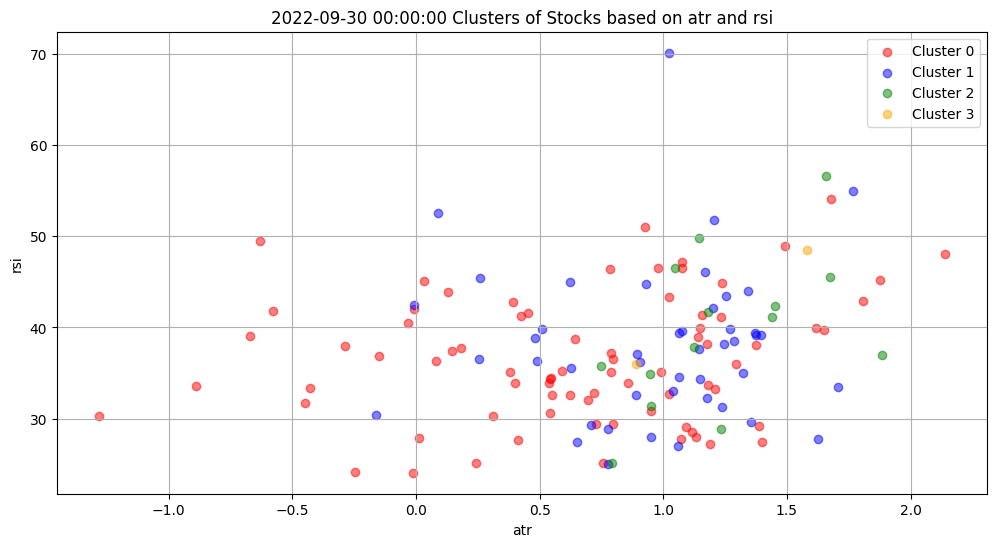

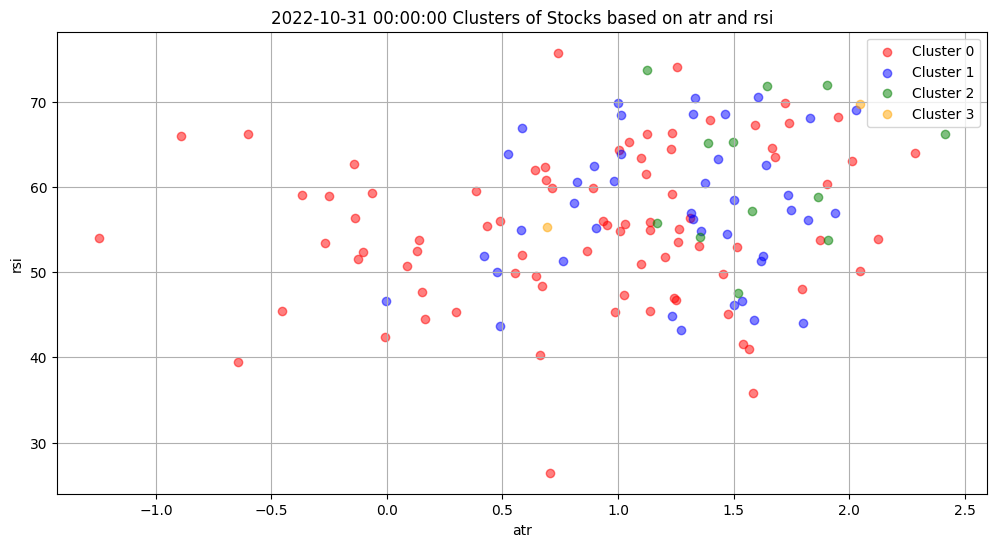

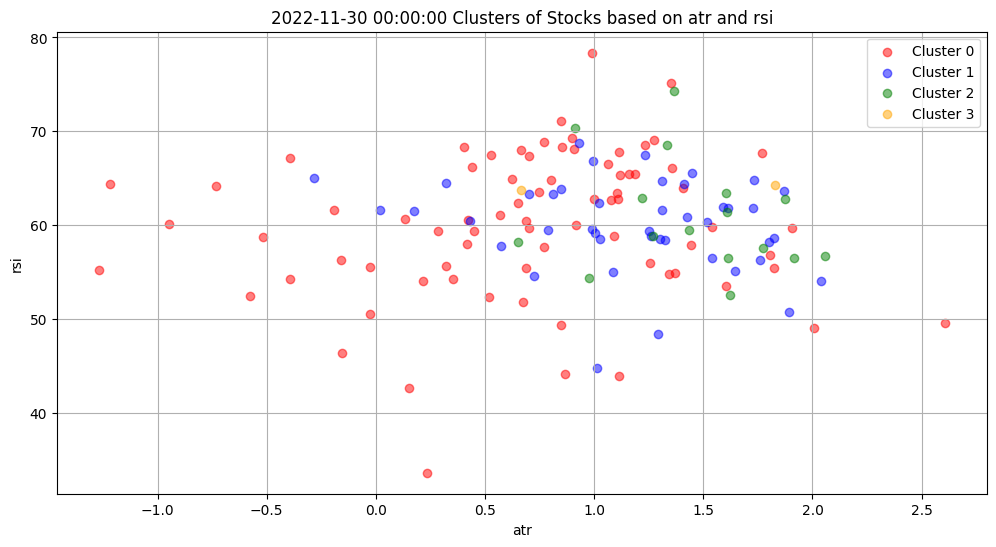

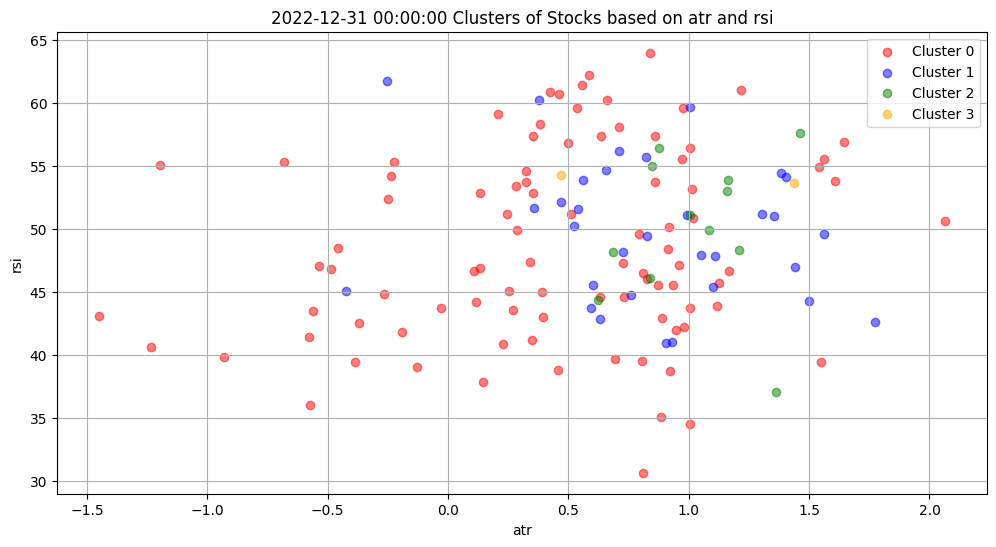

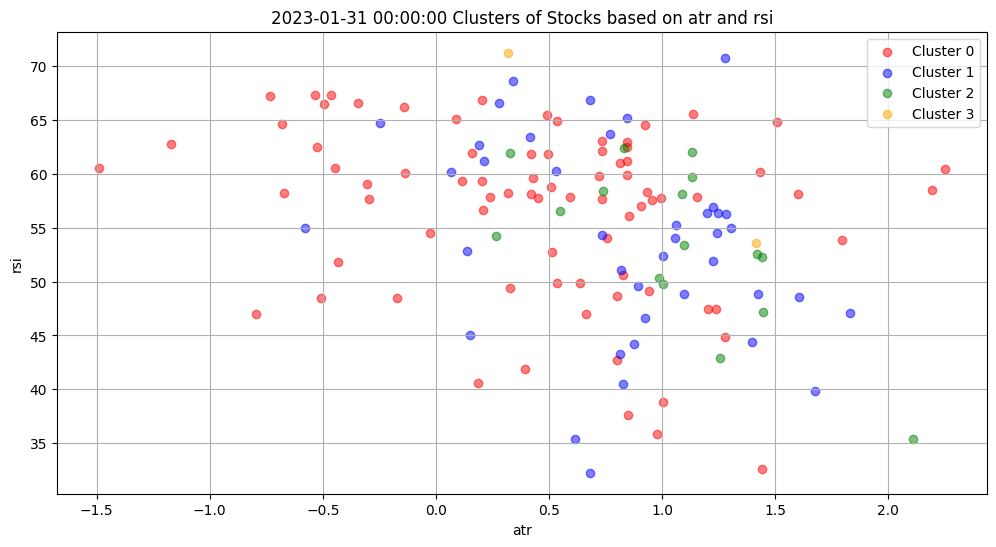

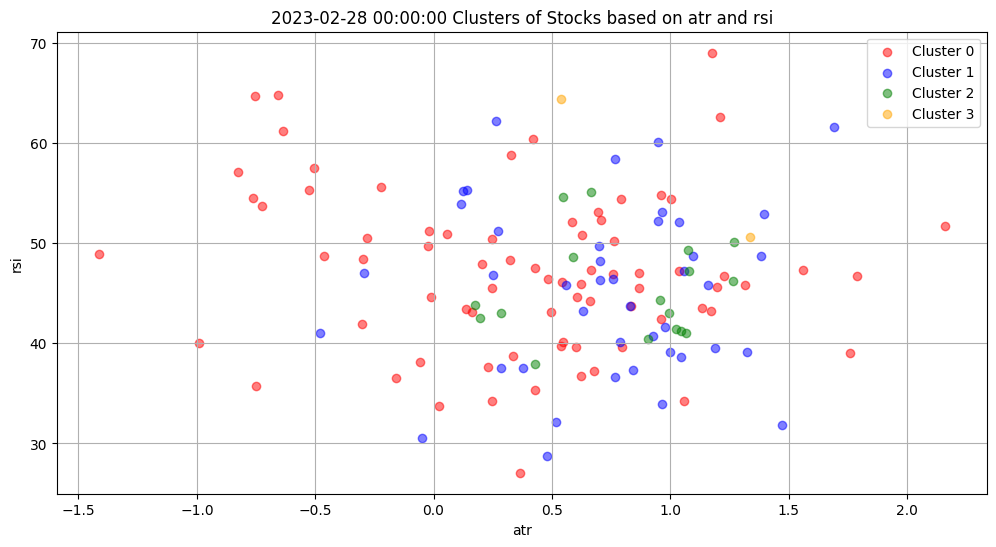

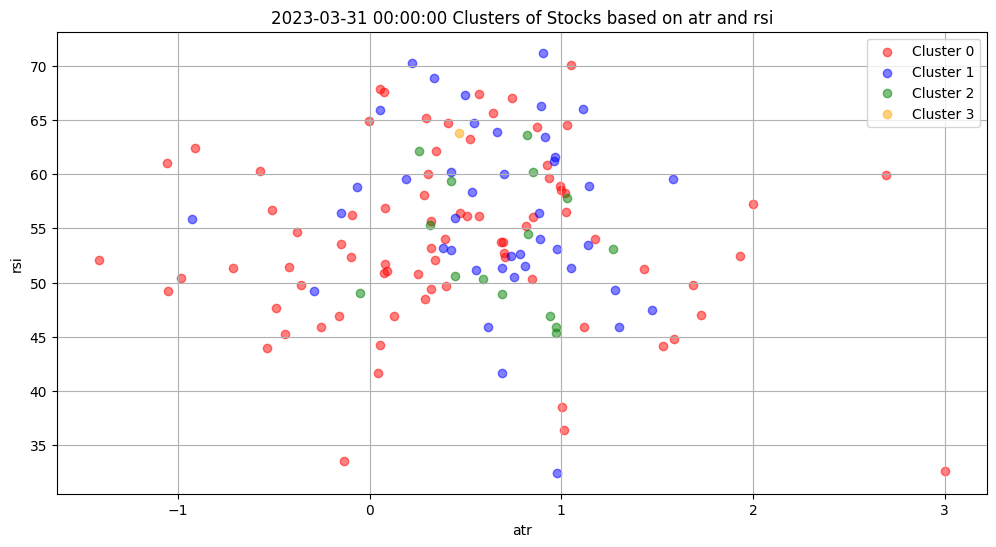

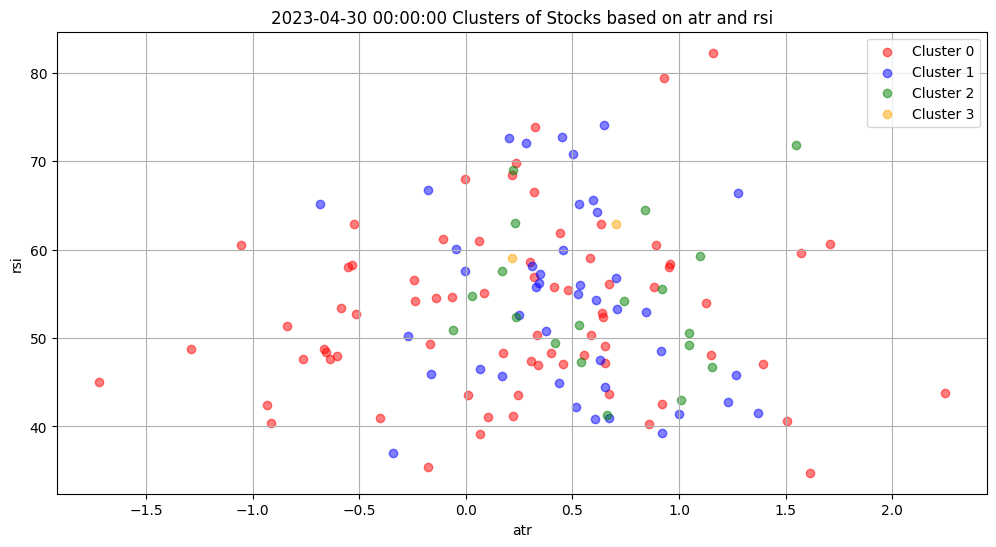

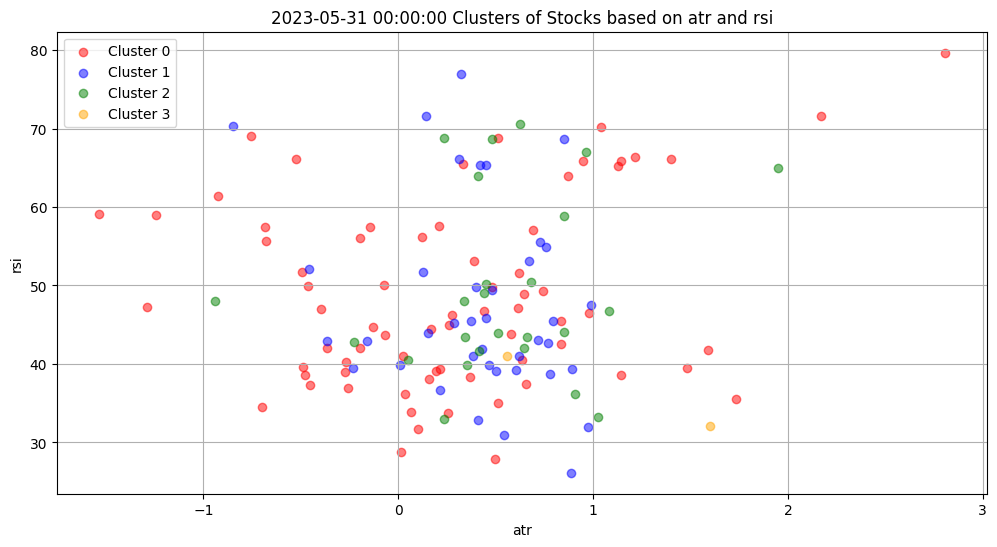

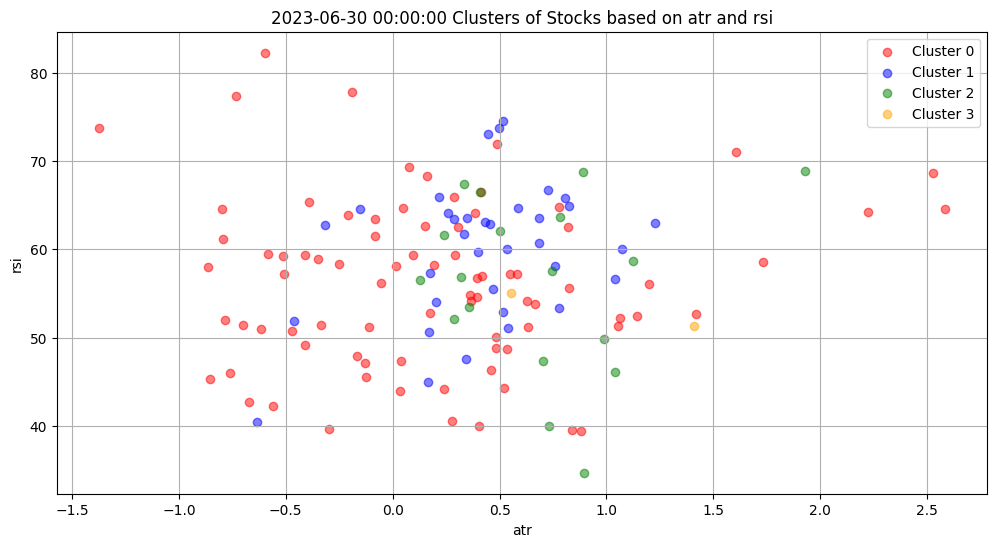

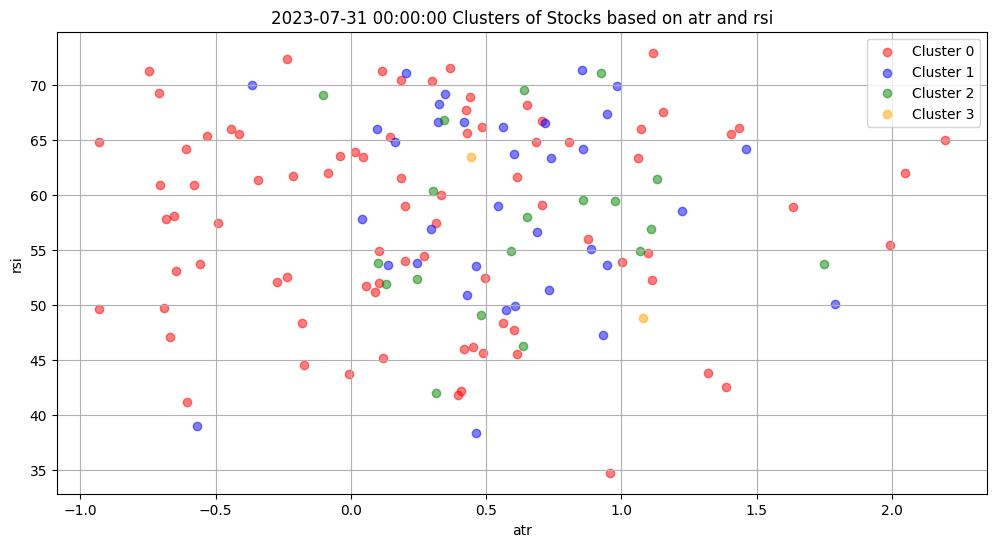

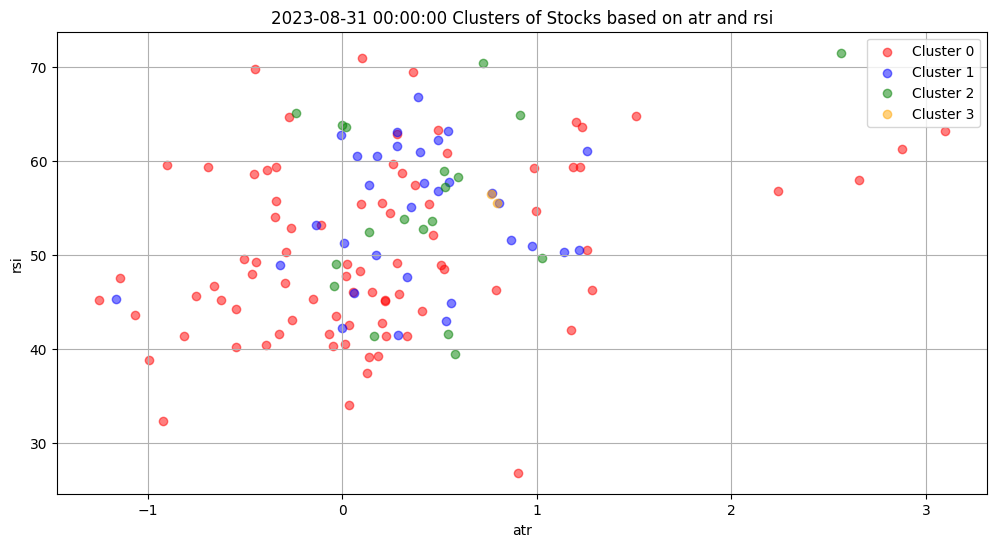

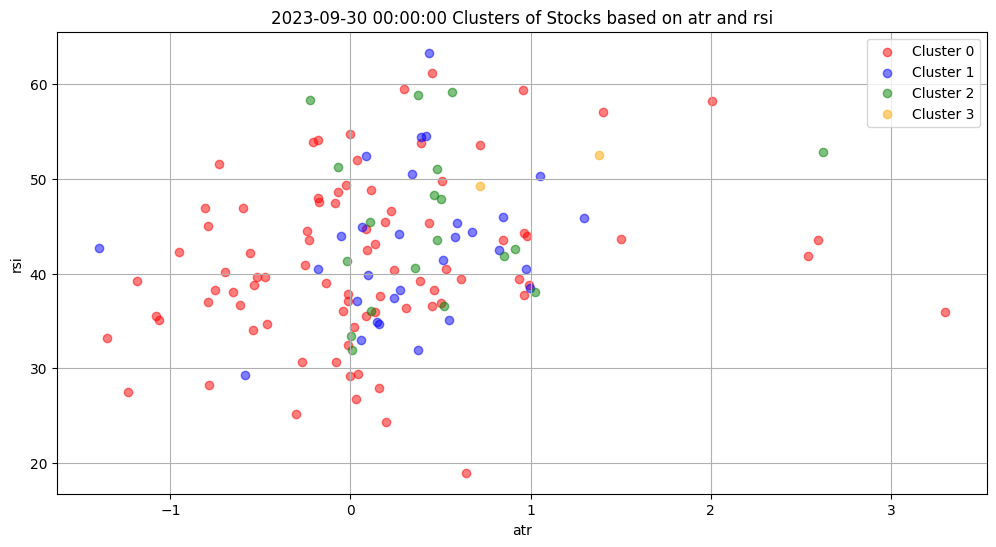

In [70]:
plot_all_clusters(df2, col1 = 'atr', col2 = 'rsi', n_clusters=4)

## Step 7: For each month select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization

- First we will filter only stocks corresponding to the cluster we choose based on our hypothesis.
- Momentum is persistent and my idea would be that stocks clustered around RSI 70 centroid should continue to outperform in the following month - thus I would select stocks corresponding to cluster 3.

In [136]:
filtered_df = df2[df2['cluster'] == 3].copy()  # Select stocks from cluster 3

# Access the df index to get tickers
filtered_df = filtered_df.reset_index(level = 1)

filtered_df.index = filtered_df.index + pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['Date', 'Ticker'])#.sort_index()

# get all dates:

dates = filtered_df.index.get_level_values('Date').unique().tolist()

fixed_dates = {}

for date in dates:
    fixed_dates[date.strftime('%Y-%m-%d')] = filtered_df.xs(date, level=0).index.tolist()

fixed_dates

{'2017-11-01': ['BKNG'],
 '2017-12-01': ['BKNG'],
 '2018-01-01': ['BKNG'],
 '2018-02-01': ['BKNG'],
 '2018-03-01': ['BKNG'],
 '2018-04-01': ['BKNG'],
 '2018-05-01': ['BKNG'],
 '2018-06-01': ['BKNG'],
 '2018-07-01': ['BKNG'],
 '2018-08-01': ['BKNG'],
 '2018-09-01': ['BKNG'],
 '2018-10-01': ['BKNG'],
 '2018-11-01': ['BKNG'],
 '2018-12-01': ['AZO', 'BKNG'],
 '2019-01-01': ['AZO', 'BKNG'],
 '2019-02-01': ['AZO', 'BKNG'],
 '2019-03-01': ['AZO', 'BKNG'],
 '2019-04-01': ['AZO', 'BKNG'],
 '2019-05-01': ['AZO', 'BKNG'],
 '2019-06-01': ['AZO', 'BKNG'],
 '2019-07-01': ['AZO', 'BKNG'],
 '2019-08-01': ['AZO', 'BKNG'],
 '2019-09-01': ['AZO', 'BKNG'],
 '2019-10-01': ['AZO', 'BKNG'],
 '2019-11-01': ['AZO', 'BKNG'],
 '2019-12-01': ['AZO', 'BKNG'],
 '2020-01-01': ['AZO', 'BKNG'],
 '2020-02-01': ['AZO', 'BKNG'],
 '2020-03-01': ['AZO', 'BKNG'],
 '2020-04-01': ['AZO', 'BKNG'],
 '2020-05-01': ['AZO', 'BKNG'],
 '2020-06-01': ['AZO', 'BKNG'],
 '2020-07-01': ['AZO', 'BKNG'],
 '2020-08-01': ['AZO', 'BKNG'],
 '2

## Step 8: Portfolio Optimization:

- Function to optimize portfolio weights
- Base analysis on the last 12 months of data
- If $n$ is the number of stocks in the portfolio, $w_i$ is the weight of stock $i$, and $P$ is the portfolio apply constraints on weights
$$\frac{1}{2}*\frac{1}{n}\leq w_i \leq 0.1*P.$$ 

In [137]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import expected_returns, risk_models

def optimize_weights(prices,weight_lower_bound=0.0):

    returns = expected_returns.mean_historical_return(prices, frequency= 252)
    cov_matrix = risk_models.sample_cov(prices, frequency=252)
    # Initialize the Efficient Frontier object
    ef = EfficientFrontier(expected_returns = returns,
                           cov_matrix=cov_matrix,
                           weight_bounds=(weight_lower_bound, 0.1),
                           solver='SCS')
    # Optimize the portfolio for maximum Sharpe ratio
    weights = ef.max_sharpe()

    return ef.clean_weights()

In [138]:
# Determine shortlisted stocks and download fresh data
# Take note of the date ranges required for the trading period

stock_list = df2.index.get_level_values('Ticker').unique().tolist()

data = yf.download(stock_list, 
                         # get earliest date and offset by one month
                         start=df2.index.get_level_values('Date').unique()[0]-pd.DateOffset(months=12),
                         # get last date
                         end=df2.index.get_level_values('Date').unique()[-1])
data

[*********************100%***********************]  156 of 156 completed


Price            Close                                                 \
Ticker            AAPL        ABBV        ABT         ACN        ADBE   
Date                                                                    
2016-10-31   26.090458   38.501827  33.469273  101.760155  107.510002   
2016-11-01   25.619385   38.964298  33.307198  101.672630  106.870003   
2016-11-02   25.642365   39.198971  33.008659  103.834961  105.889999   
2016-11-03   25.367510   38.577747  32.735733  102.381729  107.169998   
2016-11-04   25.138849   38.681286  33.341312  102.626839  106.199997   
...                ...         ...        ...         ...         ...   
2023-09-25  174.569931  143.755920  93.684280  307.845001  511.600006   
2023-09-26  170.485260  143.068069  92.492447  301.649078  506.299988   
2023-09-27  168.968384  142.343018  91.819626  305.310303  502.600006   
2023-09-28  169.226135  141.524994  94.309036  292.092957  504.670013   
2023-09-29  169.741699  138.559723  93.088364  298.250031  509.899994   

Price                                                                  ...  \
Ticker             ADP        ADSK        AIG        AMAT         AMD  ...   
Date                                                                   ...   
2016-10-31   72.332817   72.279999  49.409824   26.357306    7.230000  ...   
2016-11-01   72.216499   70.099998  48.592991   26.194151    7.090000  ...   
2016-11-02   74.758850   68.680000  48.488892   25.913177    6.760000  ...   
2016-11-03   74.218819   67.610001  46.566948   25.623142    6.700000  ...   
2016-11-04   74.011108   69.440002  45.950314   25.577822    6.560000  ...   
...                ...         ...        ...         ...         ...  ...   
2023-09-25  231.056656  205.669998  59.895287  134.547714   97.379997  ...   
2023-09-26  228.380463  201.660004  59.056576  132.075226   95.959999  ...   
2023-09-27  233.569199  202.279999  58.815567  133.040588   98.070000  ...   
2023-09-28  234.223755  207.889999  59.075855  136.153336  102.760002  ...   
2023-09-29  231.595749  206.910004  58.420315  136.379913  102.820000  ...   

Price        Volume                                                           \
Ticker          VLO     VRTX        VZ       WBA     WDAY      WDC       WFC   
Date                                                                           
2016-10-31  4969500  1928200  12459400   4662100  1147300  4449514  20115900   
2016-11-01  7816800  2458200  13229400   5130800  1091400  5055315  20020200   
2016-11-02  7317600  2580400  16488200   9783100  1127800  5578033  19566600   
2016-11-03  3855900  2371000  12605100   4586500   633300  4223810  14982700   
2016-11-04  3729900  1902100  14410200   7023900   892600  3579509  27391600   
...             ...      ...       ...       ...      ...      ...       ...   
2023-09-25  3241900   698100  17616900   6891000   894200  3553446  10624000   
2023-09-26  4936800   633600  18841600   7570500  1217300  4724565  15219400   
2023-09-27  3644000   860600  22083500  10182900  2338100  3370739  11815500   
2023-09-28  3587300   578900  18772100   7291500  9196300  4342086  12454600   
2023-09-29  4302200   896800  19787600  25663400  4066600  3323376  13124500   

Price                                    
Ticker           WMT     WYNN       XOM  
Date                                     
2016-10-31  19167000  1341600  16663800  
2016-11-01  26515800  3722300  13050600  
2016-11-02  22935900  2542400  11226100  
2016-11-03  20411700  9050400   8836500  
2016-11-04  21786300  3223800  13877100  
...              ...      ...       ...  
2023-09-25  10459500  1387800  11316000  
2023-09-26  14435700  1454000  11805400  
2023-09-27  15711000  2050000  23976200  
2023-09-28  11617200  1290400  16808100  
2023-09-29  18842400  1326800  18813600  

[1740 rows x 780 columns]

- Calculate daily returns
- retrieve stocks for each month
- if max sharpe ratio fails apply equal weights
- calculate daily portfolio return


In [139]:
returns_df = np.log(data['Close'] / data['Close'].shift(1))

portfolio_df = pd.DataFrame()

for start_date, stocks in fixed_dates.items():
    try:
        # Determin end date for the trading period
        end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
        # Find optimal weights for the stocks in the portfolio
        optimization_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        optimization_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')

        opt_df = data['Close'][stocks][optimization_start_date:optimization_end_date].copy()
        success = False
        try: 
            weights = optimize_weights(prices = opt_df,
                            weight_lower_bound=round(0.5/len(stocks),3))
            weights = pd.DataFrame(weights, index=pd.Series(0))
            weights = weights.stack().to_frame('weight').reset_index(level=0, drop=True)
            success = True
        except:
            print(f'Max Sparpe ratio failed! Date {start_date}. Equal Weight Portfolio!')
        if not success: 
            weights = pd.DataFrame([1/len(stocks) for i in range(len(stocks))],
                                index=stocks,
                                columns=pd.Series('weight'))
        temp_df = returns_df[stocks][start_date:end_date]
        temp1 = temp_df.stack().to_frame('return').reset_index(level=0)
        temp_df = temp1.merge(weights,
                    right_index=True,
                    left_index=True).reset_index().set_index(['Date', 'Ticker']).unstack().stack()        
        try:
            temp_df['weighted_return'] = temp_df['weight']*temp_df['return']
        except Exception as e:       
            print(f'Exception: start: {start_date}\t end: {end_date}')
            print(temp1)
            print('*'*50)
            print(weights)
            print('*'*50)
            print(temp_df)
            print('*'*50)
            #exit()
        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')
        portfolio_df = pd.concat([portfolio_df,temp_df], axis=0)
        portfolio_df
    except Exception as e:
        print(e)

Max Sparpe ratio failed! Date 2017-11-01. Equal Weight Portfolio!
"None of ['Ticker'] are in the columns"
Max Sparpe ratio failed! Date 2017-12-01. Equal Weight Portfolio!
"None of ['Ticker'] are in the columns"
Max Sparpe ratio failed! Date 2018-01-01. Equal Weight Portfolio!
"None of ['Ticker'] are in the columns"
Max Sparpe ratio failed! Date 2018-02-01. Equal Weight Portfolio!
"None of ['Ticker'] are in the columns"
Max Sparpe ratio failed! Date 2018-03-01. Equal Weight Portfolio!
"None of ['Ticker'] are in the columns"
Max Sparpe ratio failed! Date 2018-04-01. Equal Weight Portfolio!
"None of ['Ticker'] are in the columns"
Max Sparpe ratio failed! Date 2018-05-01. Equal Weight Portfolio!
"None of ['Ticker'] are in the columns"
Max Sparpe ratio failed! Date 2018-06-01. Equal Weight Portfolio!
"None of ['Ticker'] are in the columns"
Max Sparpe ratio failed! Date 2018-07-01. Equal Weight Portfolio!
"None of ['Ticker'] are in the columns"
Max Sparpe ratio failed! Date 2018-08-01. Equa

<Axes: xlabel='Date'>

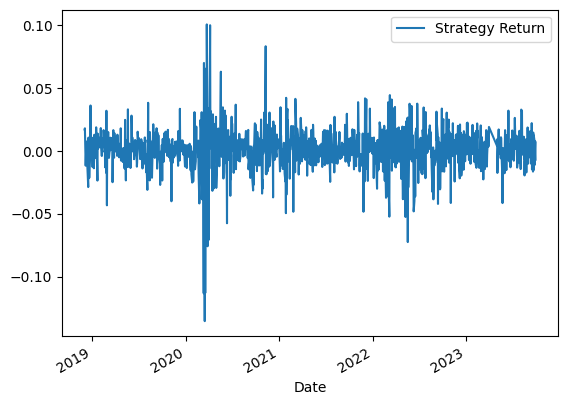

In [140]:
portfolio_df.plot()

### Compare with SnP500

In [141]:
spy = yf.download(tickers='SPY',
                  start='2015-01-01',
                  end='2023-12-31')

spy_ret = np.log(spy[["Close"]]).diff().dropna()
spy_ret.columns = spy_ret.columns.droplevel(level=1)
spy_ret.columns = ['SnP Buy&Hold']
spy_ret

[*********************100%***********************]  1 of 1 completed


SnP Buy&Hold
Date                    
2015-01-05     -0.018225
2015-01-06     -0.009464
2015-01-07      0.012384
2015-01-08      0.017589
2015-01-09     -0.008046
...                  ...
2023-12-22      0.002008
2023-12-26      0.004214
2023-12-27      0.001807
2023-12-28      0.000378
2023-12-29     -0.002899

[2263 rows x 1 columns]

In [142]:
portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)
portfolio_df

Strategy Return  SnP Buy&Hold
Date                                     
2018-12-03         0.016721      0.013155
2018-12-04         0.017684     -0.032938
2018-12-06        -0.001414     -0.001518
2018-12-07        -0.011992     -0.023510
2018-12-10         0.006624      0.001895
...                     ...           ...
2023-09-25         0.007689      0.004196
2023-09-26        -0.011307     -0.014800
2023-09-27         0.001146      0.000399
2023-09-28         0.007226      0.005781
2023-09-29        -0.007196     -0.002430

[1195 rows x 2 columns]

In [143]:
portfolio_cum_ret = np.exp(np.log1p(portfolio_df).cumsum())-1
portfolio_cum_ret

Strategy Return  SnP Buy&Hold
Date                                     
2018-12-03         0.016721      0.013155
2018-12-04         0.034700     -0.020217
2018-12-06         0.033237     -0.021705
2018-12-07         0.020847     -0.044705
2018-12-10         0.027610     -0.042894
...                     ...           ...
2023-09-25         0.821273      0.498960
2023-09-26         0.800679      0.476775
2023-09-27         0.802743      0.477365
2023-09-28         0.815770      0.485905
2023-09-29         0.802704      0.482294

[1195 rows x 2 columns]

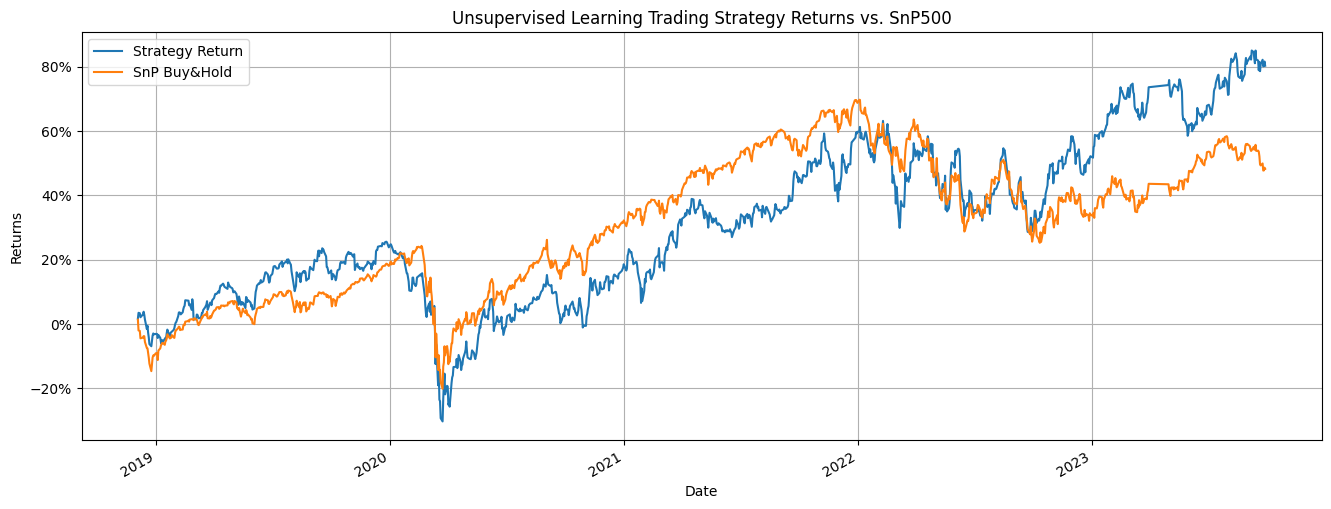

In [148]:
import matplotlib.ticker as mtick

portfolio_cum_ret[:'2023-09-29'].plot(figsize=(16,6))
plt.ylabel('Returns')
plt.title('Unsupervised Learning Trading Strategy Returns vs. SnP500')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.grid()